# **Banking Dataset / Dataset de clientes y subscripciones a préstamos bancarios**

(basado en un fichero .CSV y la información del dataset ***Bank Marketing*** en la url = "https://archive.ics.uci.edu/dataset/222/bank+marketing")
# **SPRINT 5 Exploratory Data Analysis (EDA)** 


**Objetivos:**

- Presentación y análisis claros de estadísticas descriptivas (media, mediana, moda, desviación estándar, etc.) que faciliten una comprensión inicial del dataset.
- Identificación completa de valores faltantes y uso de técnicas adecuadas para gestionarlos, con una justificación breve de las decisiones tomadas.
- Identificación de outliers en las variables relevantes, con una estrategia de tratamiento aplicada y justificación.
- Análisis de la relación entre características y variable objetivo, aplicando métodos estadísticos o visuales, y elección razonada de las más relevantes.
- Análisis de la distribución de la variable objetivo para identificar desbalance y aplicar, si es necesario, técnicas de balanceo con justificación adecuada.
- Resumen claro y conciso que aborde los hallazgos principales de la EDA y las decisiones tomadas, indicando una visión general del estado de los datos para el modelado
- La tarea se entrega en el formato Jupyter Notebook en un repositorio de GitHub: https://github.com/cristinasprogrammingadventure/Projecte-Machine-Learning/blob/main/BankingDataset_EDA.ipynb

### Importación de bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# !pip install sweetviz
import sweetviz as sv

C:\Users\Buba\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Buba\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
import sys
sys.prefix



'C:\\Users\\Buba\\anaconda3'

In [4]:
import os
print(f"Conda environment: {os.environ.get('CONDA_DEFAULT_ENV')}")


Conda environment: base


In [5]:
# Set the working directory
os.chdir("C:/Users/Buba/Documents/CURSOS-PROGRAMACION/IT-Academy/Upskilling-ML-negoci/ML_BankingDataset")

# Verify the working directory
print("Current working directory:", os.getcwd())

Current working directory: C:\Users\Buba\Documents\CURSOS-PROGRAMACION\IT-Academy\Upskilling-ML-negoci\ML_BankingDataset


### Cargar el dataset

In [6]:
# Load the dataset
data_raw = pd.read_csv('bank_dataset.CSV')

# Display basic information about the dataset
print(f"Dataset loaded: {data_raw.shape[0]} rows, {data_raw.shape[1]} columns")

Dataset loaded: 11162 rows, 17 columns


### Descripción del dataset

El conjunto contiene más de **11.162 registros y 17 columnas** con atributos como edad, ocupación, estado civil, nivel educativo, saldo y variables de contacto con el banco.  

- **age** (edad): La edad del cliente.  
- **job** (ocupación): La profesión o tipo de trabajo del cliente.  
- **marital** (estado civil): Estado civil del cliente (casado, soltero, divorciado).  
- **education** (educación): Nivel de educación del cliente (primaria, secundaria, terciaria).  
- **default** (morosidad): Si el cliente tiene deudas impagadas (sí/no).  
- **balance** (saldo): Saldo bancario del cliente.  
- **housing** (hipoteca): Si el cliente tiene un préstamo hipotecario (sí/no).  
- **loan** (préstamo): Si el cliente tiene un préstamo personal (sí/no).  
- **contact** (contacto): Método de contacto utilizado para llegar al cliente (teléfono, móvil, etc.).  
- **day** (día): Día del mes en que el cliente fue contactado.  
- **month** (mes): Mes en que el cliente fue contactado.  
- **duration** (duración): Duración de la conversación con el cliente en segundos.  
- **campaign** (campaña): Número de contactos realizados durante la campaña actual.  
- **pdays** (días desde el último contacto): Número de días desde el último contacto con el cliente.  
- **previous** (contactos previos): Número de contactos realizados en campañas anteriores.  
- **poutcome** (resultado de la campaña anterior): Resultado de la última campaña (éxito, fracaso, etc.).  
- **deposit** (depósito): Variable objetivo, si el cliente ha suscrito un depósito a término (sí/no).  

Desde la fuente del conjunto de datos, se indica que la variable **duration** afecta directamente el resultado (deposit). Sin embargo, como no se conoce antes de realizar la llamada, su inclusión en el modelo haría que las predicciones no sean realistas. Por tanto, debe descartarse del conjunto de variables predictoras y usarse solo con fines de evaluación comparativa. 
url = "https://archive.ics.uci.edu/dataset/222/bank+marketing"

### Información general del dataset

In [7]:
# Informació general del dataset
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        11152 non-null  float64
 1   job        11162 non-null  object 
 2   marital    11157 non-null  object 
 3   education  11155 non-null  object 
 4   default    11162 non-null  object 
 5   balance    11162 non-null  int64  
 6   housing    11162 non-null  object 
 7   loan       11162 non-null  object 
 8   contact    11162 non-null  object 
 9   day        11162 non-null  int64  
 10  month      11162 non-null  object 
 11  duration   11162 non-null  int64  
 12  campaign   11162 non-null  int64  
 13  pdays      11162 non-null  int64  
 14  previous   11162 non-null  int64  
 15  poutcome   11162 non-null  object 
 16  deposit    11162 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 1.4+ MB


En la descripción general del dataset se observan dos tipos principales de variables: numéricas y categóricas. Los tipos de datos parecen lógicamente correctos en general. Por ejemplo, variables como age, balance, y duration están correctamente clasificadas como numéricas (float64 o int64), mientras que variables como job, marital, education, y deposit están definidas como categóricas (object). Sin embargo, hay algunas observaciones:

La variable deposit es la variable objetivo y debería transformarse a un formato binario (por ejemplo, 0 y 1) para facilitar su uso en algoritmos de clasificación.
Las variables pdays y previous tienen valores que requieren interpretación adicional, ya que su significado no es intuitivo y podrían necesitar preprocesamiento.
La columna month, aunque categórica, representa meses del año y podría beneficiarse de un tratamiento ordinal (por ejemplo, asignar valores numéricos en orden cronológico).
Estas observaciones sugieren que se realizarán algunas transformaciones para preparar los datos para el modelado

### Mostrar las primeras y últimas filas del dataset

In [8]:
data_raw

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59.0,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56.0,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41.0,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55.0,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54.0,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33.0,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39.0,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32.0,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43.0,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


Al observar las primeras y últimas filas del dataset, los datos parecen razonables en términos de coherencia. Sin embargo, se identifican posibles áreas que requieren ingeniería de características, limpieza adicional y transformaciones específicas para garantizar que sean utilizables en un modelo predictivo.

**Columnas con valores repetitivos o poco informativos:**

- **contact**: Contiene valores como 'unknown' que podrían ser categorizados como valores faltantes.

- **poutcome**: Incluye mayoritariamente 'unknown', lo cual podría limitar su valor predictivo y requerir una estrategia específica.
Columnas categóricas:

- **job**, **marital**, y **education** tienen múltiples categorías que podrían necesitar codificación en variables dummies o agrupación para evitar que el modelo tenga demasiadas dimensiones.
- **month** debería transformarse a un formato numérico que respete su orden temporal (ordinal).

**Outliers y valores extremos:**

- En las filas finales, valores como **pdays** = -1 y **balance** = 0 aparecen con frecuencia y podrían necesitar un tratamiento específico para determinar si son valores válidos o errores en los datos.

**Variables relacionadas con duración de llamadas:**

- **duration** muestra valores altos que posiblemente afecten la distribución. Esta variable, aunque correlacionada con la variable objetivo, possiblemente no se debería incluir en la fase de entrenamiento ya que depende de la interacción directa de un agente con el cliente; también podría introducir sesgos en la predicción.



### Valores faltantes | valores nulos por columna

In [9]:
# Check for missing values
missing_values = data_raw.isnull().sum() | data_raw.isna().sum()

In [10]:
# Display the percentage of missing values in each column
missing_percentage = (missing_values / len(data_raw)) * 100
missing_data = pd.DataFrame({'missing_values': missing_values, 'percentage': missing_percentage})

# Only display columns with missing values
missing_data = missing_data[missing_data['missing_values'] > 0]

missing_data

,missing_values,percentage
age,10,0.089590
marital,5,0.044795
education,7,0.062713


La tabla muestra las columnas con valores faltantes, el número total de valores perdidos y su porcentaje respecto al total de observaciones. 

Lavariable **'age'** tiene 10 valores faltantes (0.09%), mientras que **'education'** tiene 7 valores faltantes (0.06%) y **'martial'**, 5 sobre los más de once mil onservaciones totales. Estos porcentajes son bajos y podrían gestionarse utilizando técnicas como imputación con la media, mediana o modas, dependiendo de la distribución de la variable.

### Descripción estadística del dataset

In [11]:
# Descripció estadística del dataset
data_raw.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11152.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.235384,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.914934,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


### Descripción estadística simplificada para variables numéricas 

Esta tabla muestra las estadísticas descriptivas de las variables numéricas, incluyendo la media, mediana, moda, desviación estándar, y los percentiles. 

La edad promedio de los clientes es de 41.24 años con una mediana de 39 años. La variable 'balance' muestra una alta variabilidad con una desviación estándar de 3225.41, lo que indica una distribución dispersa de los valores. Esto podría implicar que existen clientes con balances significativamente más altos o más bajos que el promedio, lo que puede a su vez generar outliers, lo que verificaremos más adelante. 

In [12]:
# Select numerical columns
numerical_columns = data_raw.select_dtypes(include=[np.number])

# Descriptive statistics for numerical columns
numerical_stats = numerical_columns.describe().transpose()

# Calculate mode for numerical columns
numerical_mode = numerical_columns.mode().iloc[0]

# Add mode to descriptive stats
numerical_stats['mode'] = numerical_mode
numerical_stats['median'] = numerical_columns.median()

# Display the descriptive statistics for numerical variables
numerical_stats[['mean', 'median', 'mode', 'std']].round(2)


,mean,median,mode,std
age,41.24,39.0,31.0,11.91
balance,1528.54,550.0,0.0,3225.41
day,15.66,15.0,20.0,8.42
duration,371.99,255.0,97.0,347.13
campaign,2.51,2.0,1.0,2.72
pdays,51.33,-1.0,-1.0,108.76
previous,0.83,0.0,0.0,2.29


**Observaciones sobre las variables numéricas**

A partir de las estadísticas descriptivas (media, mediana, moda, y desviación estándar) de las variables numéricas, podemos extraer las siguientes observaciones:

**age (edad):** 
Media: 41.24 años, Mediana: 39 años, Moda: 31 años. 

La media y la mediana están cercanas, lo que indica una distribución relativamente simétrica. Sin embargo, la moda de 31 años destaca como un grupo específico de clientes jóvenes que podrían ser representativos de una estrategia de segmentación específica. La desviación estándar (11.91) refleja una variabilidad moderada en las edades, con clientes distribuidos en un rango amplio. Esto podría confirmarse con un histograma.

**balance (saldo):** Media: 1528.54, Mediana: 550, Moda: 0.

La alta desviación estándar (3225.41) indica que los valores están muy dispersos.
Observación: La moda de 0 sugiere que muchos clientes tienen un saldo bancario igual a cero. Esto podría tratarse como una característica relevante para segmentar clientes. Los valores extremos (outliers) probablemente afectan la media y deben manejarse cuidadosamente.

**day (día del mes):** Media: 15.66, Mediana: 15, Moda: 20.

La baja desviación estándar (8.42) indica que los valores están distribuidos de manera uniforme dentro del rango permitido (1-31 días). Esto es esperable dado que los días corresponden a un calendario. Aunque útil para contextualizar la campaña, la variable podría no tener un impacto directo en el comportamiento del cliente y puede servir más como dato informativo que predictivo.

**duration (duración de la llamada):** Media: 371.99 segundos, Mediana: 255 segundos, Moda: 97 segundos.

La alta desviación estándar (347.13) muestra que la duración varía mucho.
Observación: Aunque esta variable es altamente correlacionada con el resultado (suscripción de depósitos), debe excluirse del modelado predictivo ya que está directamente influenciada por el éxito de la llamada.

**campaign (número de contactos en la campaña actual):** Media: 2.51, Mediana: 2, Moda: 1.

Observación: La moda indica que la mayoría de los clientes fueron contactados solo una vez, pero hay valores significativamente más altos que incrementan la media. Esto podría requerir transformación (por ejemplo, logarítmica).

**pdays (días desde el último contacto):** Media: 51.33, Mediana: -1, Moda: -1.

Observación importante: Un valor de -1 indica que no hubo contacto previo. Este valor debería manejarse como una categoría separada, ya que tiene un significado especial y no es un número real.

**previous (contactos previos):** Media: 0.83, Mediana: 0, Moda: 0.

Observación: La mayoría de los clientes no fueron contactados en campañas previas (moda = 0). Esta variable podría ser transformada en una categoría binaria (0 contactos vs. más de 0 contactos).


### EDA automático con Sweetviz

In [14]:
# EDA automàtic amb Sweetviz
report = sv.analyze(data_raw)
report.show_html('EDA_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report EDA_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Un EDA automático nos puede dar pistas para ver de antemano qué son los gráficos importantes y las variables a destacar.

In [ ]:
Correlaciones según corr con el heatmap:
    
Correlaciones con 'deposit':

duration    0.451919
pdays       0.151593
previous    0.139867
balance     0.081129
age         0.034664
day        -0.056326
campaign   -0.128081

In [ ]:
Correlaciones y asociaciones según EDA automático con Sweetviz:
    
CATEGORICAL ASSOCIATIONS
(UNCERTAINTY COEFFICIENT, 0 to 1)

deposit
PROVIDES INFORMATION ON...

poutcome0.06
contact0.05
housing0.03
month0.02
loan0.02
default0.01
job0.01
marital0.01
education0.00

THESE FEATURES
GIVE INFORMATION

ON deposit:
    
poutcome0.07
month0.07
contact0.05
housing0.03
job0.02
loan0.01
education0.01
marital0.01
default0.00

NUMERICAL ASSOCIATIONS
(CORRELATION RATIO, 0 to 1)

deposit CORRELATION RATIO WITH...

duration0.45
pdays0.15
previous0.14
campaign0.13
balance0.08
day0.06
age0.04

### Distribuciones de las variables numéricas

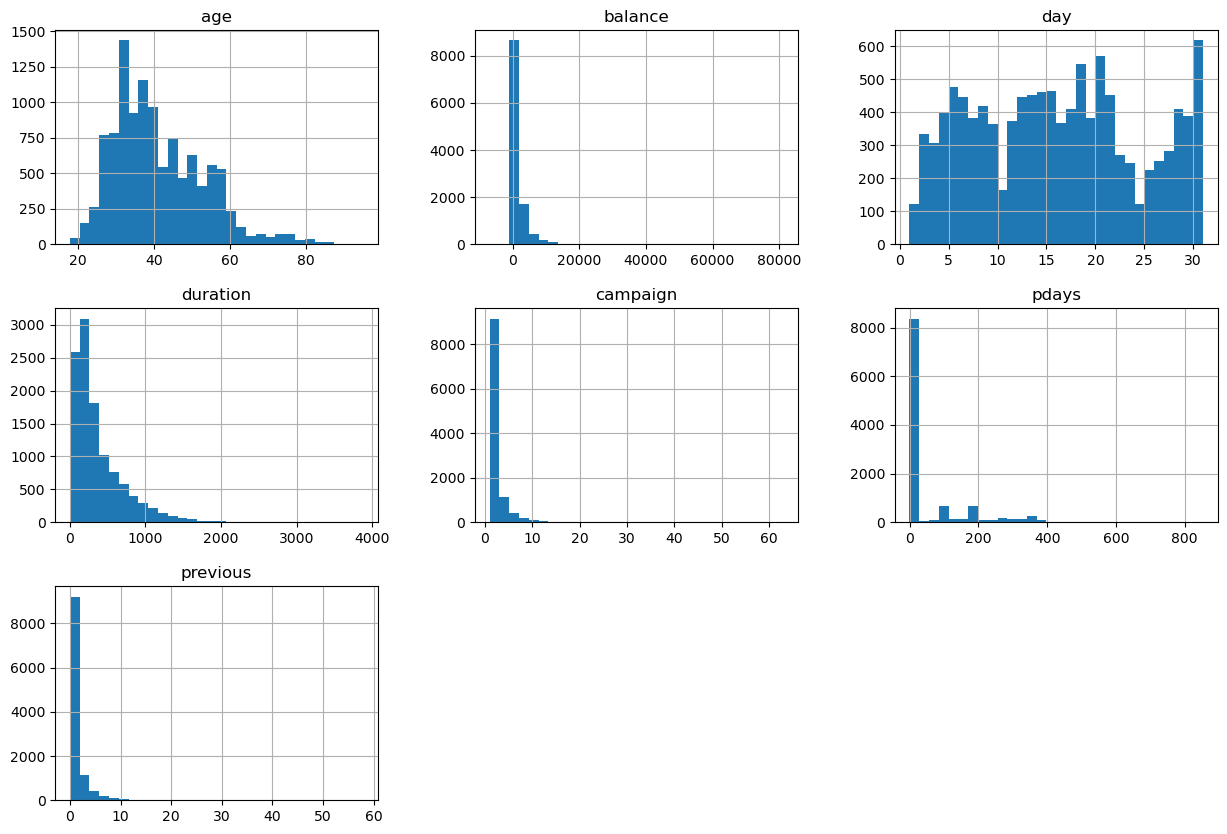

In [13]:
# Histograma de cada variable numèrica
data_raw.hist(bins=30, figsize=(15, 10))
plt.show()

- **Age**: las edades están distribuidas de manera que la mayoría de los clientes tienen entre 20 y 60 años, y de ellos, el mayor número entre los 30 y 40 años de edad, coincidiendo posiblemente con la fase de la vida en la que se independizan, compran una casa, tienen hijos y crecen sus necesidades, así como normalmente aumentan sus ingresos (a la vez que los gastos, por las razones mencionadas). 

- **Balance** muestra los saldos el día en que se cargaron los datos para hacer este dataset, saldo que normalmente es variable a lo largo del mes o del año. Por lo general no son demasiado altos, hablamos de entre 0 y unos cientos de euros, o como mucho, unos miles. Esto se puede explicar por varios factores, uno de ellos siendo los ingresos, los gastos, o que tengan más cuentas bancarias y en múltiples entidades. Es decir, que es posible que éste no sea su principal banco y este conjunto no nos da mayor información al respecto. 

- **duration**: vemos que unas 8000 llamadas de las 11 mil han durado poco y las demás duraron entre 500 y 2000 segundos (entre 8 y 33 minutos)
- **campaign**: la gran mayoría fueron contactados de 1 a 3 o 3 veces durante esta campaña de márketing, pero también a algunos pocos se les contactó de 5 a 10 veces. 
- **pdays**: se comentó antes que la mayoría de clientes nunca habían sido contactados, como lo indican la moda y la media y esto es lo que también refleja el histograma. Los demás fueron contactados principalmente con 100, 200 días antes, o incluso 1 año, lo que explica de Media de 51 días. 
- **previous**: Como en las estadísticas anteriores, vemos que la gran mayoría de los clientes no fueron contactados en campañas previas, menos unos pocos

- Se observa que ninguna de variable tiene una distribución normal

Se verificarán los días de contacto de la semnana, porque visualmente parece haber una discrepancia entre el cálculo y el histograma. 

In [14]:
# Frequency count for the 'day' variable
day_counts = data_raw['day'].value_counts()
print(day_counts.sort_index())


day
1     122
2     334
3     306
4     402
5     477
6     447
7     382
8     419
9     364
10    163
11    373
12    445
13    453
14    463
15    466
16    369
17    411
18    548
19    384
20    570
21    452
22    269
23    245
24    122
25    224
26    252
27    284
28    410
29    388
30    478
31    140
Name: count, dtype: int64


- Vemos que los **días 20 y 18 del mes** son los más frecuentes para este tipo de contacto, y que la discrepancia pasa dado que el histograma tiene 30 barras y hay meses que tienen 28, 29, 30 o 31 días, por lo que la distribución de las barras realmente no ilustra cada día del mes. Otros días importantes son el 5 y el 30.

In [15]:
# Group 'day' into early, mid, and late ranges
data_raw['day_group'] = pd.cut(
    data_raw['day'], 
    bins=[0, 10, 20, 31], 
    labels=['Early Month', 'Mid Month', 'Late Month']
)

# Count frequencies in each group
day_group_counts = data_raw['day_group'].value_counts()
print(day_group_counts)


day_group
Mid Month      4482
Early Month    3416
Late Month     3264
Name: count, dtype: int64


In [16]:
data_raw = data_raw.drop('day_group', axis=1)


In [17]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        11152 non-null  float64
 1   job        11162 non-null  object 
 2   marital    11157 non-null  object 
 3   education  11155 non-null  object 
 4   default    11162 non-null  object 
 5   balance    11162 non-null  int64  
 6   housing    11162 non-null  object 
 7   loan       11162 non-null  object 
 8   contact    11162 non-null  object 
 9   day        11162 non-null  int64  
 10  month      11162 non-null  object 
 11  duration   11162 non-null  int64  
 12  campaign   11162 non-null  int64  
 13  pdays      11162 non-null  int64  
 14  previous   11162 non-null  int64  
 15  poutcome   11162 non-null  object 
 16  deposit    11162 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 1.4+ MB


- verificamos que es efectivamente el la mitad del mes que más se contacta a los clientes 

### Descripción estadística para variables categoricas 

In [18]:
# Definimos las columnas de variables categóricas

data_raw.select_dtypes(include=['object']).columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')

**Mostrar el valor "moda", o más frecuente de cada variable**

In [19]:
# Select categorical columns
categorical_columns = data_raw.select_dtypes(include=['object'])

# Mode and count for categorical variables
categorical_mode = categorical_columns.mode().iloc[0]
categorical_count = categorical_columns.apply(pd.Series.value_counts)

# Display the mode and value counts for categorical variables
categorical_mode


job          management
marital         married
education     secondary
default              no
housing              no
loan                 no
contact        cellular
month               may
poutcome        unknown
deposit              no
Name: 0, dtype: object

In [20]:
categorical_count

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
admin.,1334.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
apr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,923.0,NaN,NaN
aug,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1519.0,NaN,NaN
blue-collar,1944.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cellular,NaN,NaN,NaN,NaN,NaN,NaN,8042.0,NaN,NaN,NaN
dec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110.0,NaN,NaN
divorced,NaN,1291.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
entrepreneur,328.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
failure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1228.0,NaN
feb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,776.0,NaN,NaN


**Observaciones sobre las variables categóricas**. A partir de las modas de las variables categóricas, se pueden extraer las siguientes observaciones:

- **job (ocupación):** La moda es ***management***. Esto indica que la mayoría de los clientes trabaja en roles administrativos o de gestión.

- **marital (estado civil):** La moda es ***married***. Esto sugiere que la mayoría de los clientes están casados, lo cual podría ser una característica relevante para el análisis.

- **education (nivel educativo):** La moda es ***secondary***, lo que refleja que la mayoría de los clientes tiene un nivel educativo secundario.

- **default (morosidad):** La moda es ***no***, lo que implica que la mayoría de los clientes no tiene deudas pendientes.

- **housing (hipoteca):** La moda es ***no***, indicando que muchos clientes no tienen hipoteca.

- **loan (préstamo):** La moda es ***no***, lo que muestra que la mayoría de los clientes no tiene préstamos personales.

- **contact (tipo de contacto):** La moda es ***cellular***. Esto sugiere que el método principal de contacto es por teléfono móvil.

- **month (mes):** La moda es ***may***. Indica que mayo es el mes más común en el que se contacta a los clientes.

- **poutcome (resultado de campañas anteriores):** La moda es ***unknown***, lo que muestra que no hay información sobre la mayoría de los clientes en esta variable, lo cual podría limitar su relevancia para el modelo.

- **deposit (suscripción):** La moda es ***no***. Esto indica que la mayoría de los clientes no suscribió un depósito a término.


### *Class Imbalance* en la Variable Objetivo

In [21]:
# Check the distribution of the target variable
deposit_distribution = data_raw['deposit'].value_counts(normalize=True)

deposit_distribution


deposit
no     0.52616
yes    0.47384
Name: proportion, dtype: float64

Los dos valores categóricos de la variable target son bastante equilibradas. Las clases están relativamente equilibradas, ya que la **diferencia entre ambas es pequeña (aproximadamente un 5%)**. Este nivel de balance es positivo para el modelado, ya que no requiere técnicas avanzadas de balanceo como sobremuestreo o submuestreo.

La variable objetivo deposit presenta un balance aceptable entre las clases **yes (47.38%) y no (52.62%)**. Aunque la clase no es ligeramente mayoritaria, esta diferencia no es lo suficientemente significativa como para justificar técnicas de balanceo. Por tanto, los modelos predictivos deberían manejar adecuadamente este nivel de balance, sin riesgo importante de sesgo hacia una clase específica. No obstante, se monitorearán métricas como el F1-score y la matriz de confusión para garantizar un rendimiento equilibrado entre las clases.

### Calcular los valores de cada variable categórica

Calcularemos los valores de cada variable y después los mostraremos graficamente.

In [22]:
# Store frequency counts for each categorical column in a dictionary
frequency_counts = {}
for column in categorical_columns:
    frequency_counts[column] = categorical_columns[column].value_counts()

# Display the counts with formatted column names
for column, counts in frequency_counts.items():
    print(f"Frequency counts for (\033[1m{column}\033[0m):")
    print(counts)
    print("\n")

Frequency counts for (job):
job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64


Frequency counts for (marital):
marital
married     6349
single      3517
divorced    1291
Name: count, dtype: int64


Frequency counts for (education):
education
secondary    5474
tertiary     3685
primary      1500
unknown       496
Name: count, dtype: int64


Frequency counts for (default):
default
no     10994
yes      168
Name: count, dtype: int64


Frequency counts for (housing):
housing
no     5881
yes    5281
Name: count, dtype: int64


Frequency counts for (loan):
loan
no     9702
yes    1460
Name: count, dtype: int64


Frequency counts for (contact):
contact
cellular     8042
unknown      2346
telephone     774
Name: count, dtype: int64


Frequency counts fo

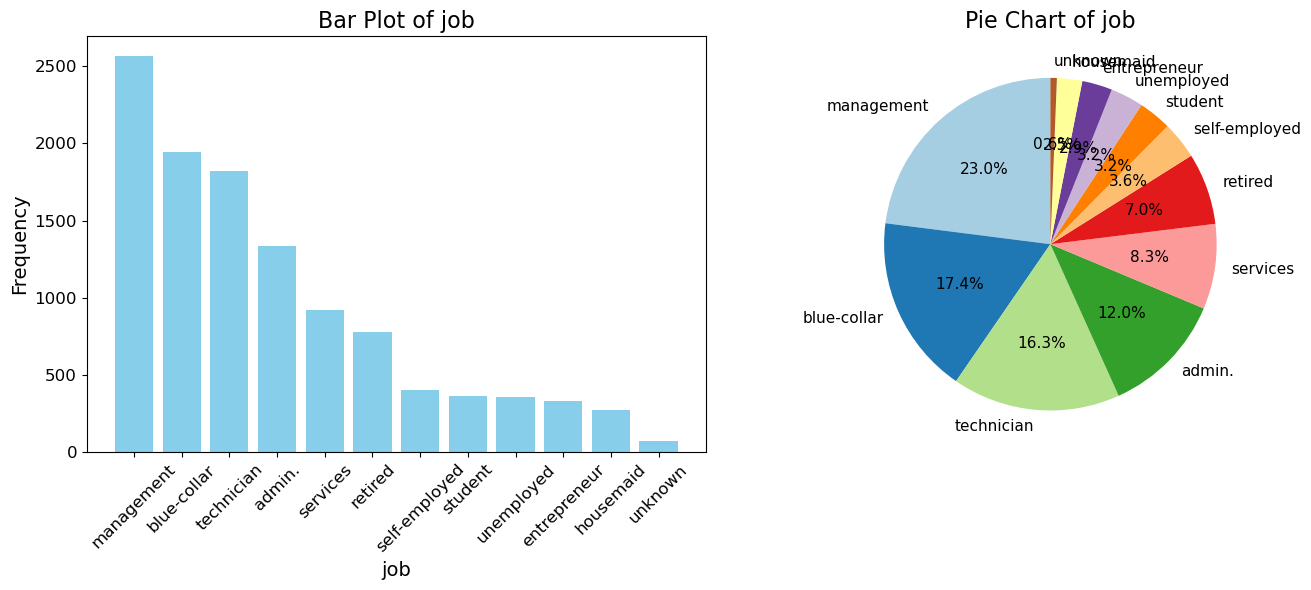

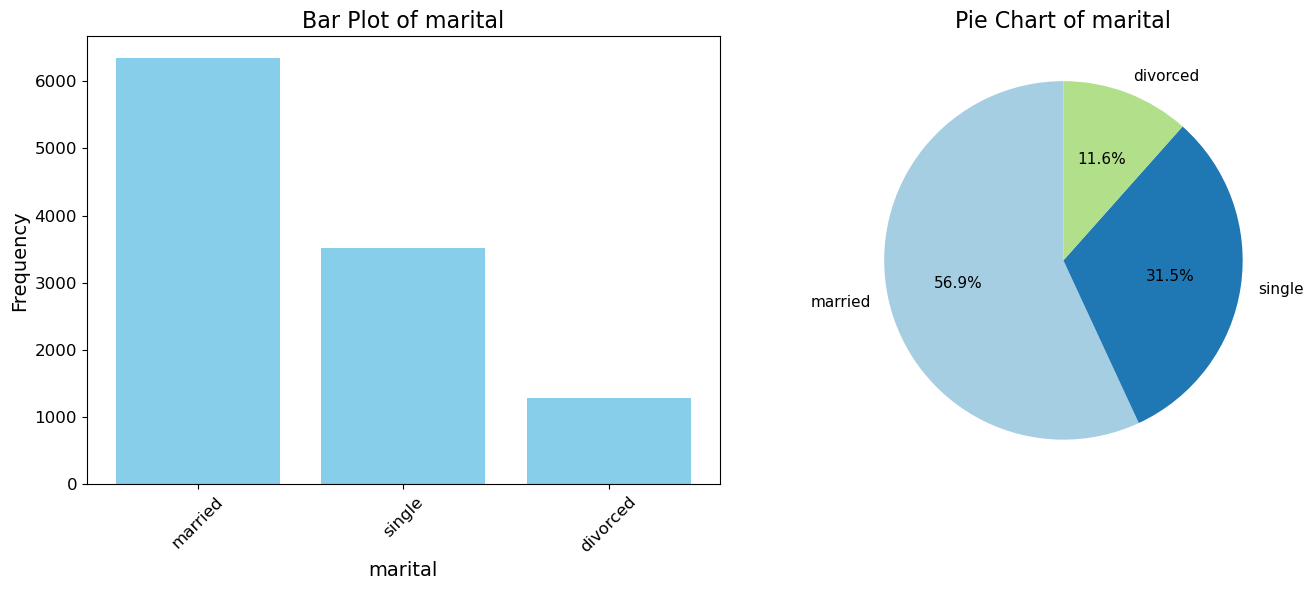

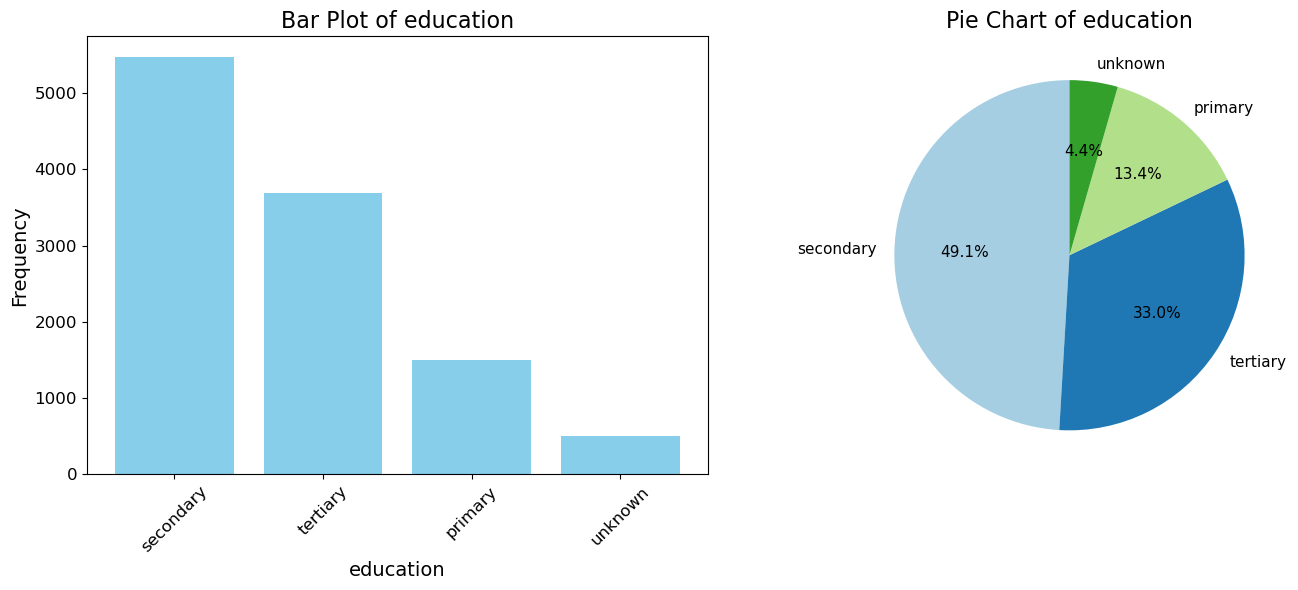

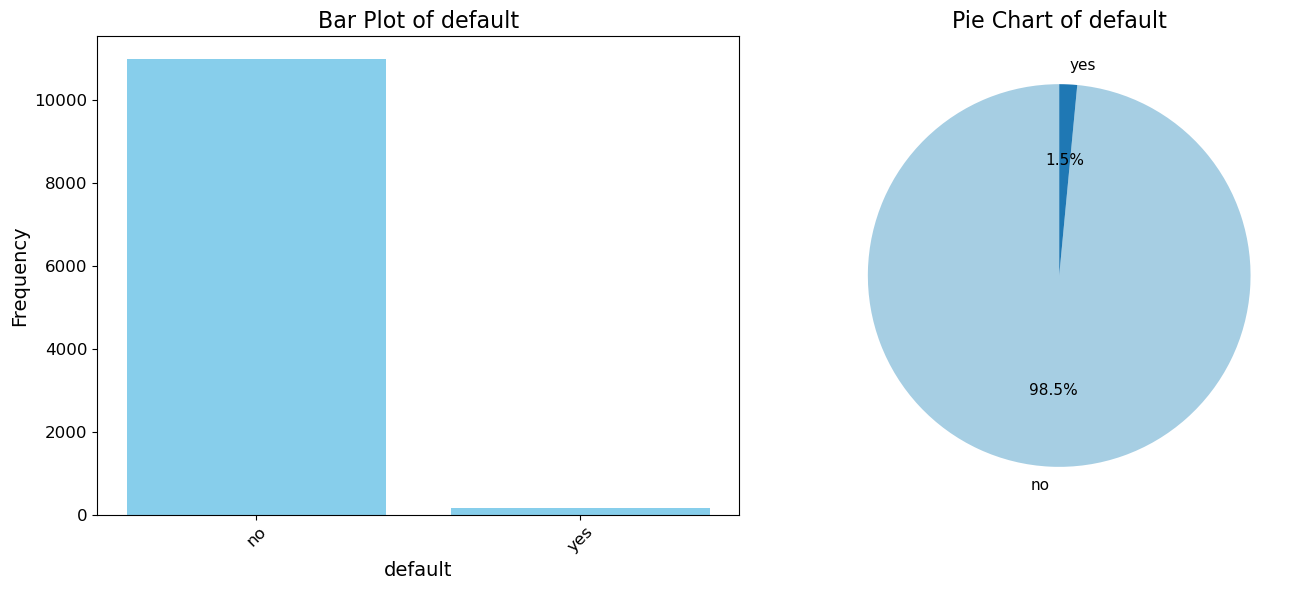

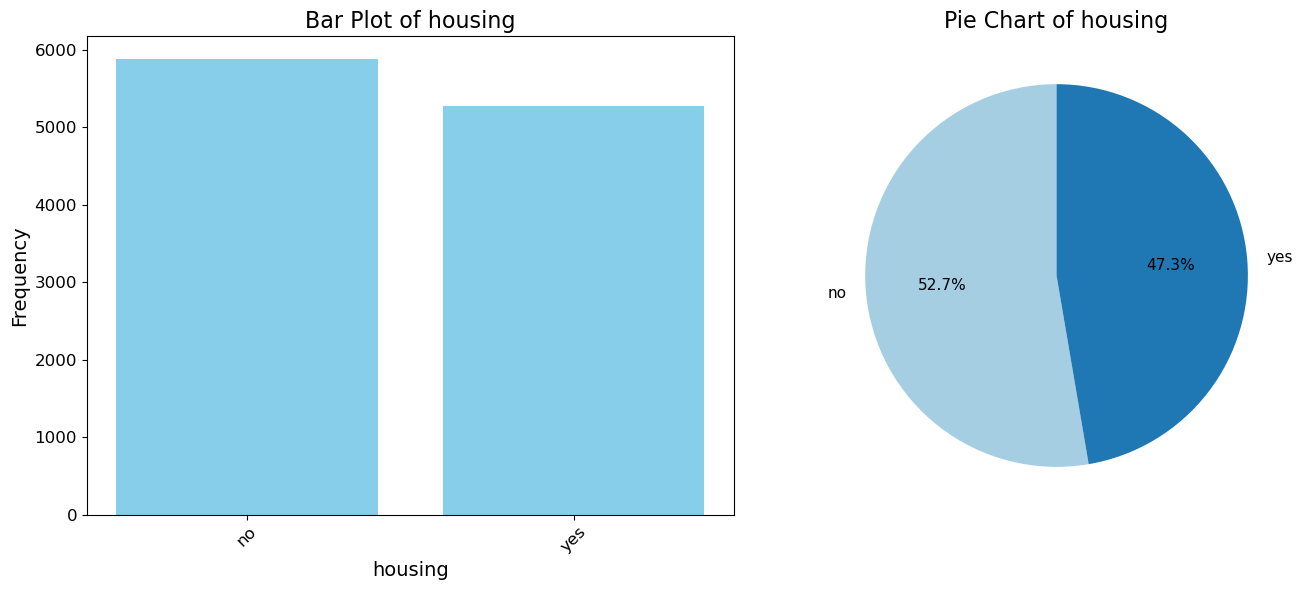

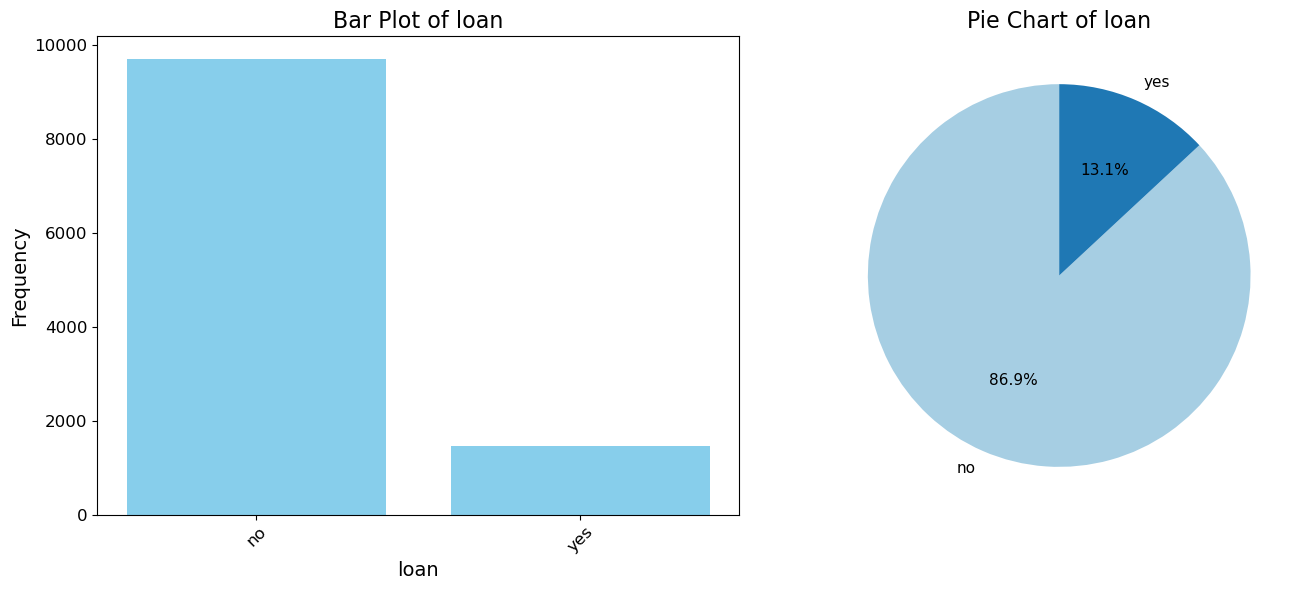

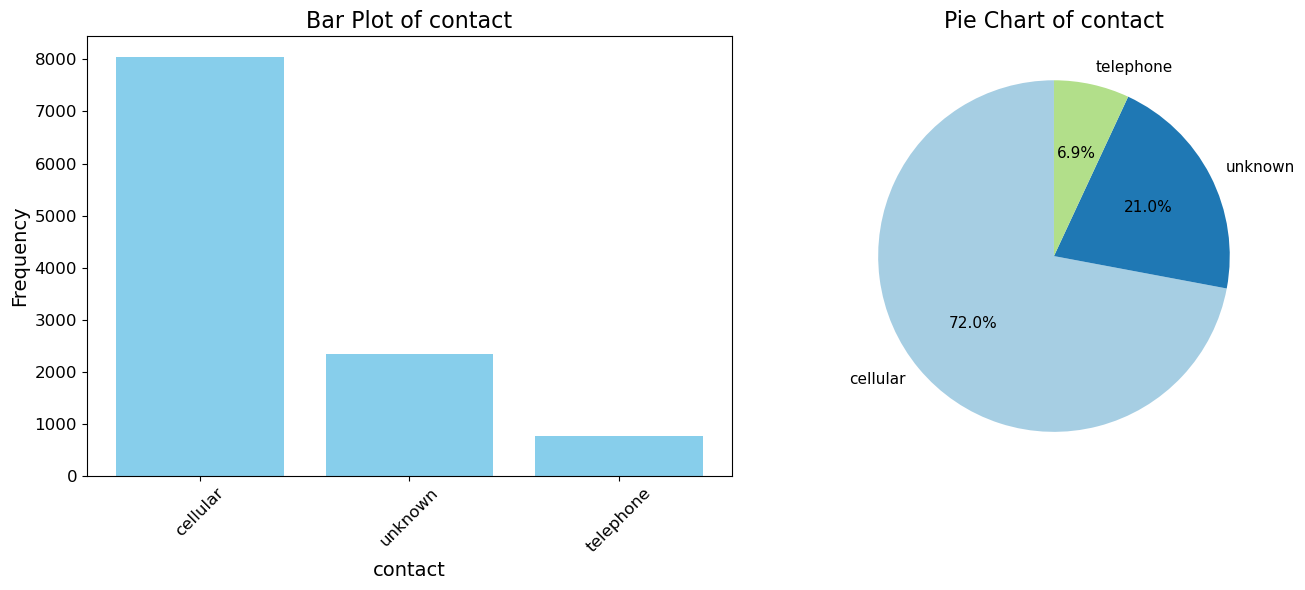

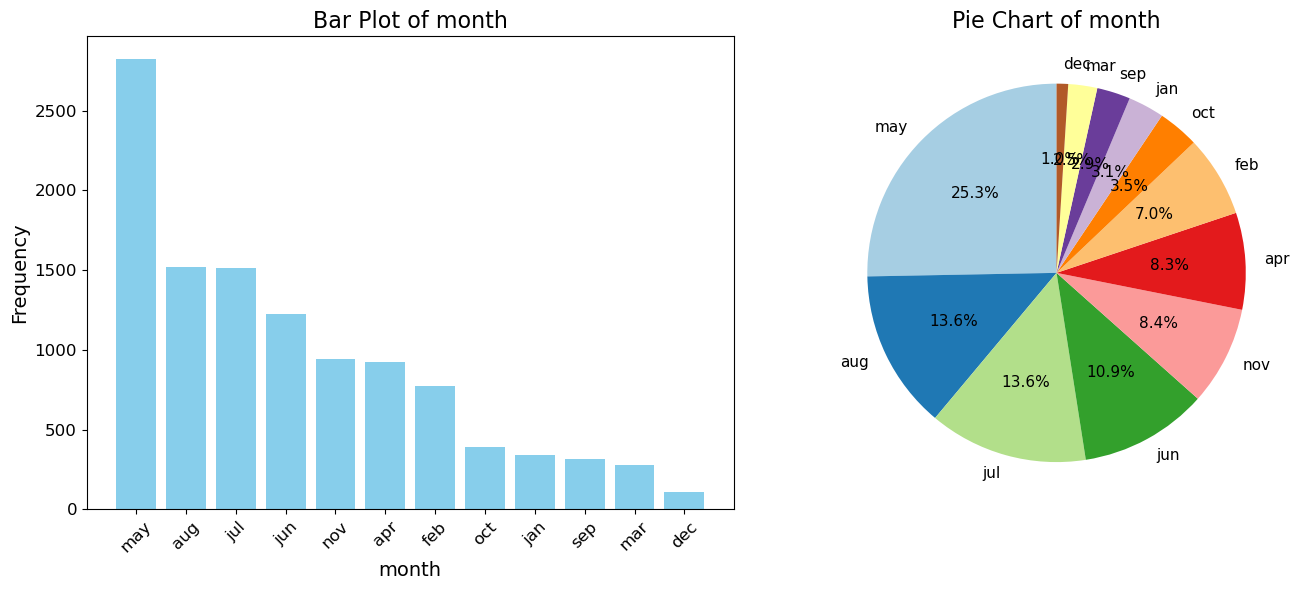

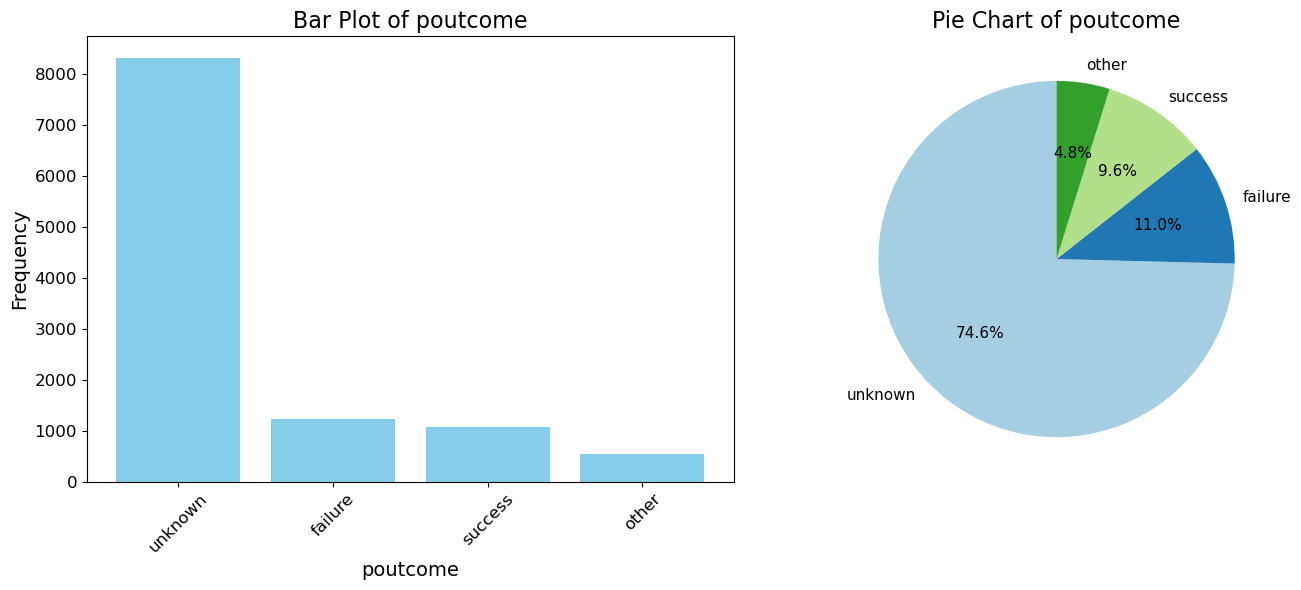

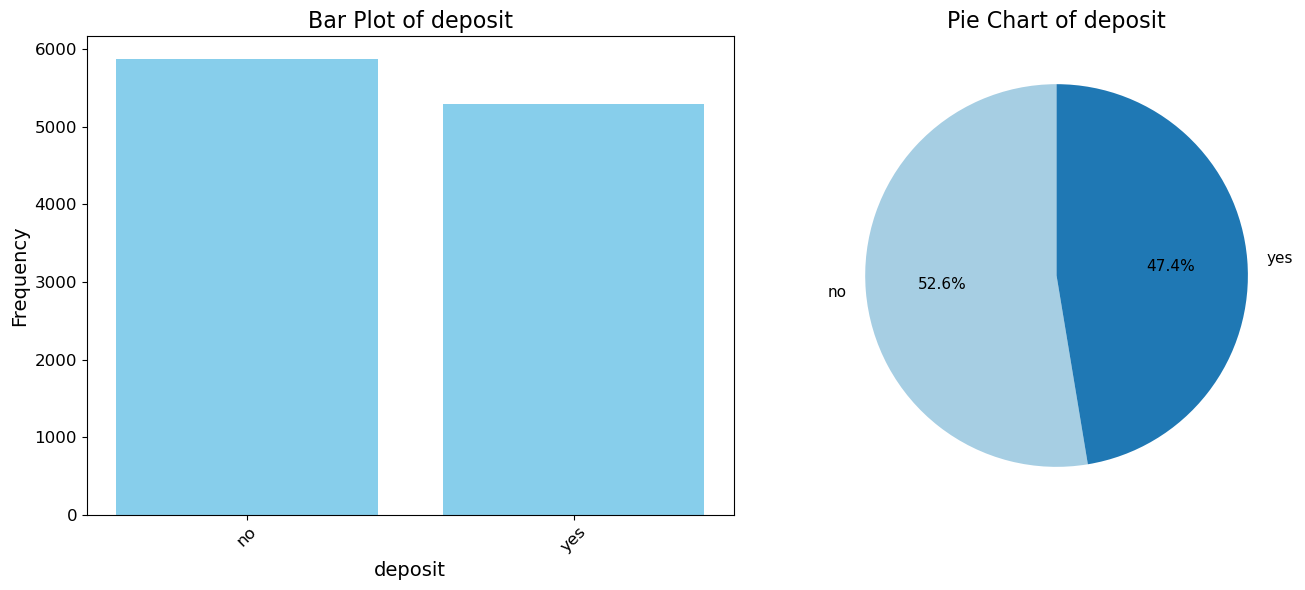

In [23]:
import matplotlib.pyplot as plt

# Loop through each categorical column to create bar and pie charts
for column, counts in frequency_counts.items():
    
    # Create a figure with two subplots (bar plot and pie chart)
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Bar plot
    axes[0].bar(counts.index, counts.values, color='skyblue')
    axes[0].set_title(f'Bar Plot of {column}', fontsize=16)  # Increase title font size
    axes[0].set_xlabel(column, fontsize=14)  # Increase x-axis label font size
    axes[0].set_ylabel('Frequency', fontsize=14)  # Increase y-axis label font size
    axes[0].tick_params(axis='x', rotation=45, labelsize=12)  # Increase x-axis tick labels size
    axes[0].tick_params(axis='y', labelsize=12)  # Increase y-axis tick labels size

    # Pie chart
    axes[1].pie(counts.values, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
    axes[1].set_title(f'Pie Chart of {column}', fontsize=16)  # Increase title font size
    plt.setp(axes[1].texts, fontsize=11)  # Increase font size of pie chart labels

    # Display the plots
    plt.tight_layout()
    plt.show()


**Bar Plots - Pie Charts**

Estas fuguras ayudan a identificar valores frecuentes o irrelevantes, crucial para la selección de características y la simplificación del dataset antes del modelado. Los gráficos de barras y de tarta proporcionan una visión clara de la distribución de las categorías en cada variable y cumplen una función importante en las decisiones sobre datos (basadas en los gráficos).

**Variables dominantes:** Se observa que la mayoría de los clientes pertenecen a categorías como management en job, married en marital, y no en housing.

**Valores desequilibrados:** Algunas categorías como unknown en poutcome o contact pueden no aportar información valiosa para el modelo debido a su falta de detalle o frecuencia alta pero poco significativa.

También vemos que la gran mayoría de clientes contactados no tienen deudas pendientes y que más o menos la mitad son propietarios dee una casa para la que tienen una hipoteca. 

El mes de contacto (month) puede ser que sea decisión de los bancos más que de los clientes y no ser útil para las predicciones, aunque se podría verficar con filtrados específicos.


### Aclaración sobre valores "desconocidos" y en variables numéricas


Para ver la idoneidad de algunas columnas con datos dispares, desconocidos, otros, o peculiares, y su impacto, vamos a verificar los **resultados 'deposit' de los clientes nunca contactados antes** mediante **filtrado** de las variables **poutcome** (indigando valores como 'unknown' y 'other'), **pdays** (resaltando valor -1) y calcular sus coincidencias con los valores **'deposit'** a ver si se pueden sacar conclusiones.

Filtrar los clientes por las siguientes categorías de contacto, en días:

    Menos de 30 días
    Entre 30 y 90 días
    Entre 90 y 180 días
    Más de 365 días
    Nunca contactados


In [24]:
# Filtrar los clientes que cumplen ambas condiciones (AND)
no_contacted_clients_and = data_raw[
    (data_raw['poutcome'].isin(['unknown', 'other'])) & 
    (data_raw['pdays'] == -1)
]

# Ver la cantidad de clientes no contactados y la distribución de 'deposit' entre ellos
deposit_distribution_and = no_contacted_clients_and['deposit'].value_counts(normalize=True)

# Mostrar las proporciones de 'deposit' para los clientes nunca contactados (AND)
print("Proporciones de 'deposit' para los clientes nunca contactados (AND):")
print(deposit_distribution_and)


Proporciones de 'deposit' para los clientes nunca contactados (AND):
deposit
no     0.593465
yes    0.406535
Name: proportion, dtype: float64


In [25]:
# Filtrar los clientes que cumplen al menos una de las condiciones (OR)
no_contacted_clients_or = data_raw[
    (data_raw['poutcome'].isin(['unknown', 'other'])) | 
    (data_raw['pdays'] == -1)
]

# Ver la cantidad de clientes no contactados y la distribución de 'deposit' entre ellos
deposit_distribution_or = no_contacted_clients_or['deposit'].value_counts(normalize=True)

# Mostrar las proporciones de 'deposit' para los clientes nunca contactados (OR)
print("Proporciones de 'deposit' para los clientes nunca contactados (OR):")
print(deposit_distribution_or)


Proporciones de 'deposit' para los clientes nunca contactados (OR):
deposit
no     0.583324
yes    0.416676
Name: proportion, dtype: float64


**¿Qué podemos Observar?**

- En ambos casos, la proporción de **clientes sin suscripción (deposit = 0)** es ligeramente mayor que la de **clientes con suscripción (deposit = 1)**, pero la diferencia no es grande ni estre estos dos filtros, ni con el conjunto de observaciones de dataset entero.
- A pesar de que los clientes nunca contactados tienen un estado "desconocido" o no tienen contacto previo, **una parte significativa de ellos aún se suscribe al depósito por otros medios**, quizás por necesidad, se hayan dirigido ellos al banco.
- Esto podría indicar que los **clientes recientes**, o que no han sido contactados anteriormente (ni tienen un resultado claro como 'failure' o 'success' en poutcome) aún **tienen un comportamiento similar al de los clientes que sí han sido contactados**. No parece haber una gran diferencia en las proporciones de suscripción, lo que podría sugerir que **no solo los clientes contactados son los que tienen más probabilidades de suscribirse al depósito**, si no que puede ser que la campaña de márketing haya sido divulgaa también por otros medios, como la tele, la radio, por anuncios en las sucursales bancarias y en soportes físicos y que la campaña por teléfono sea solo uno de los canales de visibilidad.


In [26]:
# Filtrar los clientes que han sido contactados
contacted_clients = data_raw[data_raw['contact'] != 'unknown']

# Verificar las proporciones de 'deposit' en estos clientes
deposit_proportions_contacted = contacted_clients['deposit'].value_counts(normalize=True)

# Mostrar las proporciones
print("Proporciones de 'deposit' para los clientes contactados (por cualquiera de los canales):")
print(deposit_proportions_contacted)


Proporciones de 'deposit' para los clientes contactados (por cualquiera de los canales):
deposit
yes    0.539814
no     0.460186
Name: proportion, dtype: float64


**Filtramos con  mayor nivel de precisión:**

In [28]:
# Filtrar clientes que han sido contactados anteriormente (pdays != -1)
contacted_clients = data_raw[data_raw['pdays'] != -1]

# Filtrar clientes según el rango de días y calcular las proporciones de 'deposit'
deposit_proportions = {}

# Rango de días para los filtros: 0-30 días, 30-90 días, 90-180 días, 180-365 días
ranges = [(0, 30), (30, 90), (90, 180), (180, 365)]
for start, end in ranges:
    # Filtrar los clientes que han sido contactados en el rango de días correspondiente
    group = contacted_clients[(contacted_clients['pdays'] >= start) & (contacted_clients['pdays'] < end)]
    
    # Calcular las proporciones de 'deposit' para este grupo
    deposit_proportions[f"{start}_to_{end}_days"] = group['deposit'].value_counts(normalize=True)

# Mostrar los resultados de manera sencilla
for range_label, proportions in deposit_proportions.items():
    print(f"\nProporciones de 'deposit' para los clientes contactados entre {range_label.replace('_', ' y ')} días:")
    print(proportions)



Proporciones de 'deposit' para los clientes contactados entre 0 y to y 30 y days días:
deposit
yes    0.5
no     0.5
Name: proportion, dtype: float64

Proporciones de 'deposit' para los clientes contactados entre 30 y to y 90 y days días:
deposit
yes    0.79668
no     0.20332
Name: proportion, dtype: float64

Proporciones de 'deposit' para los clientes contactados entre 90 y to y 180 y days días:
deposit
yes    0.720665
no     0.279335
Name: proportion, dtype: float64

Proporciones de 'deposit' para los clientes contactados entre 180 y to y 365 y days días:
deposit
yes    0.608828
no     0.391172
Name: proportion, dtype: float64


**Observaciones más precisas**

- Clientes contactados más recientemente (< 30 días): Este grupo tiene un equilibrio entre quienes contratan el depósito (50%) y quienes no (50%).
- Clientes contactados entre **30 y 90 días, o entre 90 y 180 días**: En estos rangos, **entre el 70% y el 80% han contratado el depósito**, lo que sugiere un mayor **tiempo de maduración** para decidir. Esto podría implicar que estos clientes ya tenían una relación previa con el banco, como un préstamo anterior.
- Esto coincide con los datos de la **variable 'month'** , donde más de la mitad de las observaciones se concentran entre mayo y agosto (unos 4 meses).
- Los altos porcentajes de éxito (deposit = 1) en los rangos iniciales (30-90 días y 90-180 días) pueden indicar que las estrategias de marketing están bien dirigidas.
- Los datos muestran resultados positivos para el banco. Los **clientes parecen responder bien a la campaña de marketing**, ya sea porque está **bien dirigida** o porque el **producto ofrecido es atractivo**. Sin embargo, se observan indecisos; vemos que **muchos clientes necesitan varias semanas para decidirse** (o para ser **evaluados y aceptados por el banco**).

- Deterioro con el tiempo: Aunque las tasas de éxito siguen siendo relativamente buenas, disminuyen para los rangos más amplios (180-365 días). Esto puede deberse a que los clientes pierden interés, consideran alternativas, o simplemente ya no encuentran relevante la oferta.


## **Detección de outliers, o valores atípicos**

C:\Users\Buba\AppData\Local\Temp\ipykernel_9532\2256314259.py:66: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentage = sorted_outlier_percentages[idx]
C:\Users\Buba\AppData\Local\Temp\ipykernel_9532\2256314259.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


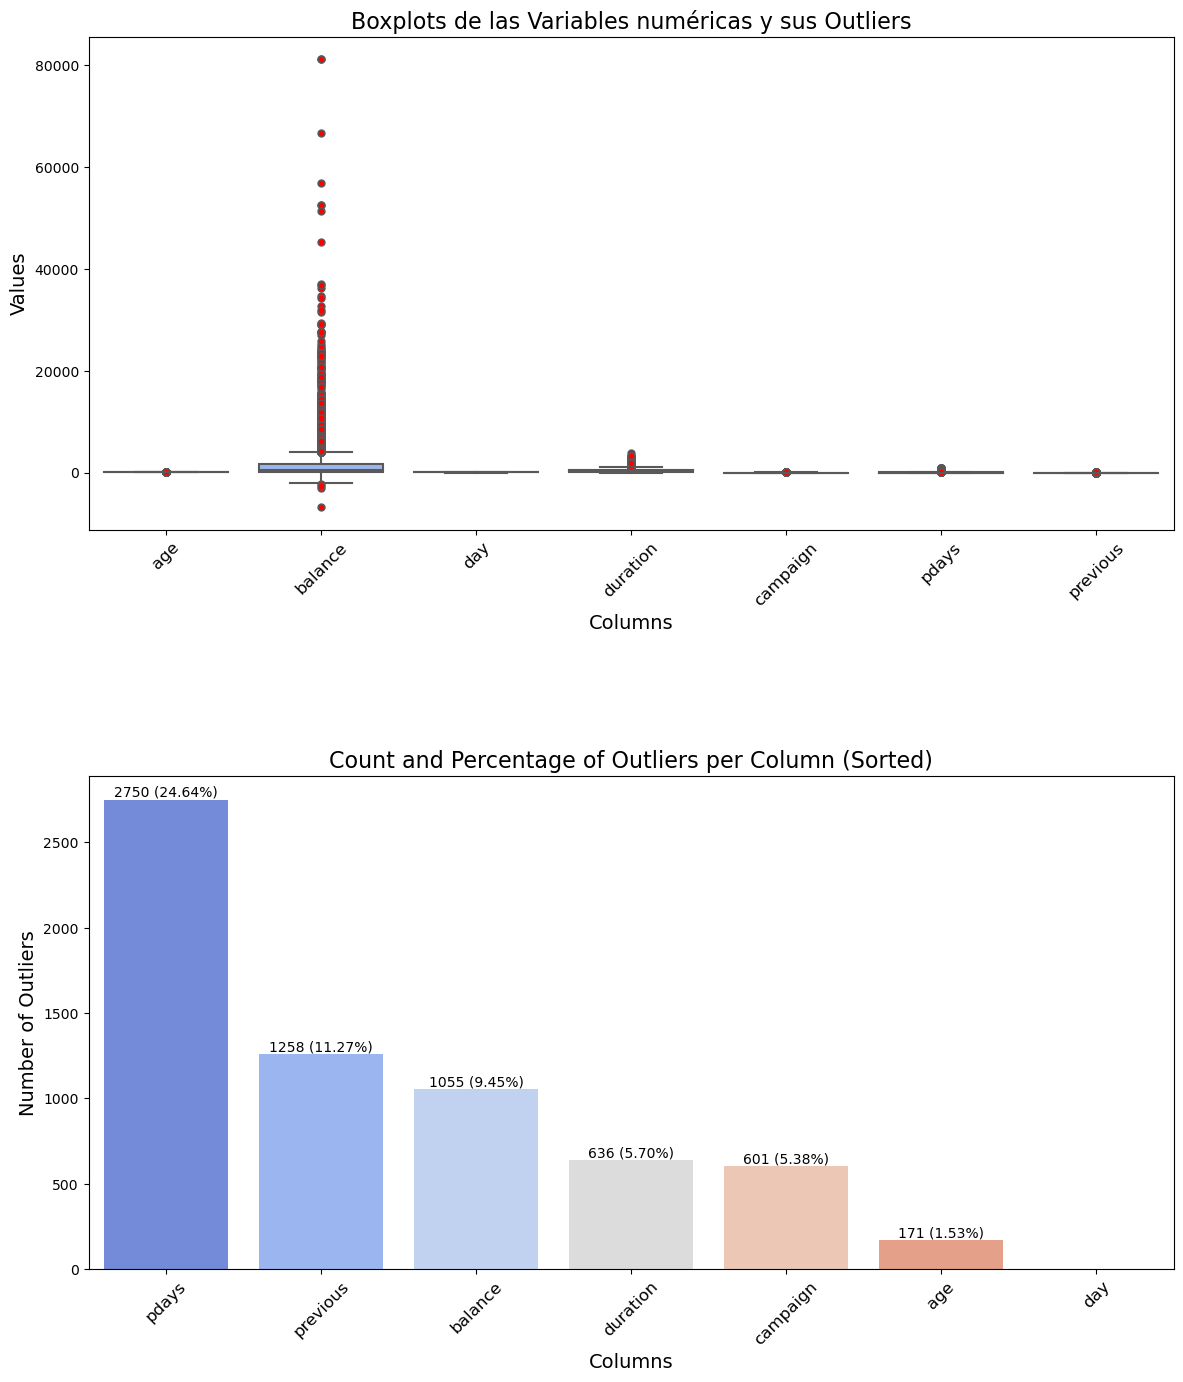

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Define figure with two subplots
fig, axes = plt.subplots(2, 1, figsize=(14, 16), gridspec_kw={'hspace': 0.5})

# --- First Subplot: Boxplots ---
numeric_data = data_raw.select_dtypes(include=[np.number])
melted_data = numeric_data.reset_index().melt(id_vars=["index"], var_name="Variable", value_name="Value")

sns.boxplot(
    x="Variable",  # Variables (column names) on x-axis
    y="Value",     # Values on y-axis
    data=melted_data,
    palette="coolwarm",
    flierprops={"marker": "o", "markerfacecolor": "red", "markersize": 5},
    orient="v",  # Vertical orientation
    ax=axes[0]
)

# Adding aesthetics for the first subplot
axes[0].set_title("Boxplots de las Variables numéricas y sus Outliers", fontsize=16)
axes[0].set_xlabel("Columns", fontsize=14)
axes[0].set_ylabel("Values", fontsize=14)
axes[0].tick_params(axis='x', rotation=45, labelsize=12)

# --- Second Subplot: Outlier Counts and Percentages ---
# Detect outliers using the IQR method
def detect_outliers_iqr(data):
    outliers = {}
    for col in data.select_dtypes(include=[np.number]):  # Only numeric columns
        Q1 = np.percentile(data[col].dropna(), 25)  # First quartile
        Q3 = np.percentile(data[col].dropna(), 75)  # Third quartile
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Detect outliers
        outlier_mask = (data[col] < lower_bound) | (data[col] > upper_bound)
        outliers[col] = outlier_mask.sum()  # Count outliers
    return outliers

# Detect outliers and calculate percentages
outliers_dict = detect_outliers_iqr(data_raw)
outliers_series = pd.Series(outliers_dict)
total_observations = len(data_raw)
outlier_percentages = (outliers_series / total_observations) * 100

# Sort outliers and percentages by the number of outliers
sorted_outliers_series = outliers_series.sort_values(ascending=False)
sorted_outlier_percentages = outlier_percentages[sorted_outliers_series.index]

# Barplot for sorted outlier counts and percentages
sns.barplot(
    x=sorted_outliers_series.index,
    y=sorted_outliers_series.values,
    palette="coolwarm",
    ax=axes[1]
)

# Annotate bars with counts and percentages
for idx, value in enumerate(sorted_outliers_series):
    if value > 0:
        percentage = sorted_outlier_percentages[idx]
        axes[1].text(
            x=idx,
            y=value + 0.1,
            s=f"{value} ({percentage:.2f}%)",
            ha="center", 
            va="bottom",
            fontsize=10,
            color="black"
        )

# Adding aesthetics for the second subplot
axes[1].set_title("Count and Percentage of Outliers per Column (Sorted)", fontsize=16)
axes[1].set_ylabel("Number of Outliers", fontsize=14)
axes[1].set_xlabel("Columns", fontsize=14)
axes[1].tick_params(axis='x', rotation=45, labelsize=12)

# Final layout adjustments and show
plt.tight_layout()
plt.show()


Los boxplots revelan la presencia de valores atípicos significativos en columnas como **balance** y **duration**. Estos valores podrían influir negativamente en los modelos predictivos y pueden requerir técnicas de manejo como la imputación o el recorte de valores extremos (preferiblemente imputar o escalar la variable entera y no recortar los datos).

La **gráfica** identifica el número y porcentaje de outliers por variable numérica según el método IQR. Las variables con más outliers son **'pdays' (24.6%)** y **'previous' (11.27%)**. Esto indica que ciertos valores en estas columnas están muy alejados de los cuartiles centrales. 

Los outliers pueden influir en el modelo predictivo, por lo que deberemos decidir si tratarlos o conservarlos dependiendo de su relevancia para el objetivo del análisis.

## **Dummificar la variable target ***deposit***:**

Para dummificar la variable objetivo deposit, que contiene valores categóricos (yes/no), la convertiremos en una columna binaria con 1 para yes y 0 para no.

In [31]:
# Convertir la variable objetivo 'deposit' en una binaria (1 para 'yes', 0 para 'no')
data_raw['deposit'] = data_raw['deposit'].map({'yes': 1, 'no': 0})

# Confirmar el cambio
print(data_raw['deposit'].value_counts())


deposit
0    5873
1    5289
Name: count, dtype: int64


In [32]:
data_raw

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59.0,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,1
1,56.0,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,1
2,41.0,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,1
3,55.0,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,1
4,54.0,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33.0,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,0
11158,39.0,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,0
11159,32.0,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,0
11160,43.0,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,0


## **Correlaciones**

Hay que verificar las correlaciones entre todas las variables y el **Target dummificado**


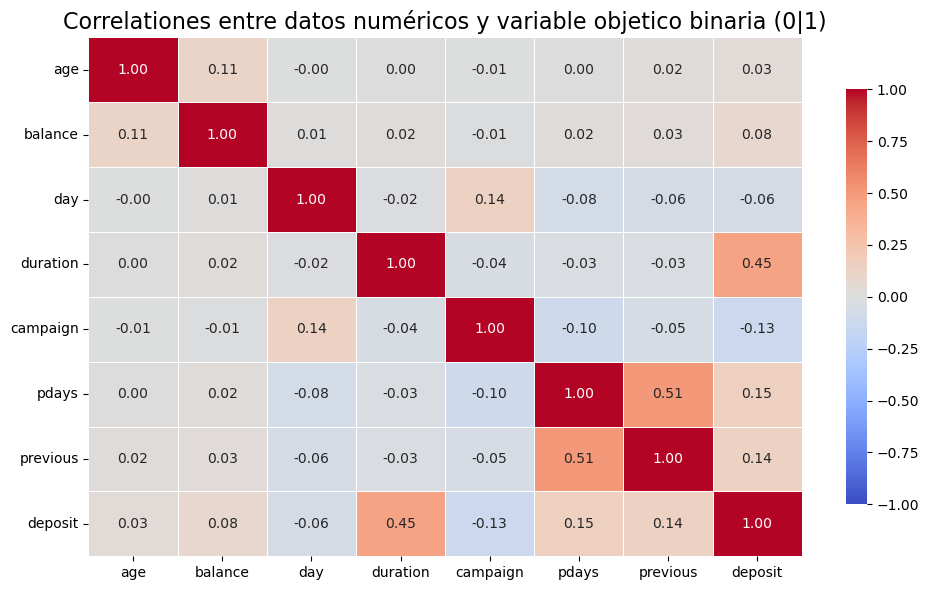

Correlaciones con 'deposit':
deposit     1.000000
duration    0.451919
pdays       0.151593
previous    0.139867
balance     0.081129
age         0.034664
day        -0.056326
campaign   -0.128081
Name: deposit, dtype: float64


In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_data = data_raw.select_dtypes(include=['number'])

# Calculate correlation matrix for numeric data
correlation_matrix = numeric_data.corr()

# Plot correlation heatmap with coolwarm palette
plt.figure(figsize=(10, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',  # Apply the coolwarm palette
    fmt='.2f',
    linewidths=0.5,
    cbar_kws={'shrink': 0.8},  # Adjust colorbar size
    vmin=-1, vmax=1  # Ensure the color scale spans from -1 to +1
)
plt.title("Correlationes entre datos numéricos y variable objetico binaria (0|1)", fontsize=16)
plt.tight_layout()
plt.show()

# Numeric target column
if 'deposit' in numeric_data.columns:
    correlation_with_target = correlation_matrix['deposit'].sort_values(ascending=False)
    print("Correlaciones con 'deposit':")
    print(correlation_with_target)
else:
    print("La correlación no incluye la columna categórica 'deposit'")


**Análisis de correlaciones con *deposit* más relevantes**:

**duration (0.4519):** Es la variable con mayor correlación positiva con deposit. Esto confirma que llamadas más largas tienden a estar asociadas con la suscripción de depósitos (que posiblemente también incluye el tiempo de los trámites para darse de alta entre el cliente y el comercial). Sin embargo, como se explicó antes, no debe usarse para predicción ya que este dato solo se conoce después de realizar la llamada.

**pdays (0.1516)**: Esta variable muestra una correlación positiva moderada. Los clientes contactados recientemente parecen tener mayor probabilidad de contratar un depósito, lo que indica que la proximidad temporal al último contacto es un factor relevante.

**previous (0.1399):** Los clientes con más interacciones previas en campañas tienen una leve correlación positiva con la suscripción de depósitos. Este historial podría ser útil para segmentar clientes con mayor predisposición.

**balance (0.0811):** Aunque la correlación es débil, un saldo bancario más alto parece estar asociado con una mayor probabilidad de suscripción. Esto podría estar relacionado con la capacidad financiera de los clientes.

**campaign (-0.1281):** Existe una correlación negativa, lo que sugiere que demasiados intentos de contacto pueden ser contraproducentes. Esto podría reflejar una mala percepción del cliente hacia campañas demasiado insistentes.

**day (-0.0563):** La correlación negativa y débil con deposit indica que el día del mes tiene poca relevancia para predecir la suscripción.

In [34]:
# Flatten the correlation matrix and sort by absolute value
correlation_pairs = correlation_matrix.unstack()  # Flatten the matrix into a Series
correlation_pairs = correlation_pairs[correlation_pairs.index.get_level_values(0) != correlation_pairs.index.get_level_values(1)]  # Remove self-correlations
sorted_correlations = correlation_pairs.sort_values(ascending=False)  # Sort by correlation value

# Convert to DataFrame for better readability
correlation_table = sorted_correlations.reset_index()
correlation_table.columns = ['Variable 1', 'Variable 2', 'Correlation']

# Display the sorted correlation table
print(correlation_table)


   Variable 1 Variable 2  Correlation
0    previous      pdays     0.507272
1       pdays   previous     0.507272
2     deposit   duration     0.451919
3    duration    deposit     0.451919
4     deposit      pdays     0.151593
5       pdays    deposit     0.151593
6     deposit   previous     0.139867
7    previous    deposit     0.139867
8         day   campaign     0.137007
9    campaign        day     0.137007
10        age    balance     0.112217
11    balance        age     0.112217
12    balance    deposit     0.081129
13    deposit    balance     0.081129
14        age    deposit     0.034664
15    deposit        age     0.034664
16   previous    balance     0.030805
17    balance   previous     0.030805
18   duration    balance     0.022436
19    balance   duration     0.022436
20        age   previous     0.020060
21   previous        age     0.020060
22      pdays    balance     0.017411
23    balance      pdays     0.017411
24        day    balance     0.010467
25    balanc

**Datos del EDA y correlaciones con Sweetviz**:

In [ ]:
deposit CORRELATION RATIO WITH...

duration 0.45
pdays 0.15
previous 0.14
campaign 0.13
balance 0.08
day 0.06
age 0.04

poutcome CORRELATION RATIO WITH...

pdays 0.84
previous 0.63
campaign 0.14
day 0.09
age 0.06
balance 0.06
duration 0.05

**Análisis de las principales correlaciones entre variables:**

**previous y pdays (0.5073):** Existe una correlación moderada entre el número de contactos previos y los días desde el último contacto. Esto refleja que clientes con un historial de interacción más largo tienden a ser contactados con mayor regularidad.

**day y campaign (0.1370):** Aunque la correlación es débil, puede sugerir que en ciertos días del mes se concentran más intentos de contacto. Esto podría deberse a estrategias específicas de la campaña.

**age y balance (0.1122):** La relación entre la edad y el saldo bancario indica que clientes mayores suelen tener balances más altos. Esto podría asociarse con estabilidad financiera o mayor capacidad de ahorro.

**pdays y balance (0.0174):** Aunque la correlación es prácticamente insignificante, podría ser interesante explorar si existe alguna relación indirecta entre el tiempo desde el último contacto y la situación financiera de los clientes.

**campaign y previous (-0.0497):** La correlación débil y negativa indica que clientes con más intentos en campañas actuales tienden a tener menos interacciones previas, lo que podría reflejar estrategias específicas hacia clientes menos recurrentes.

### Selección de variables 

Las variables descartadas (duration, month, day, poutcome) fueron eliminadas debido a su falta de relevancia o aplicabilidad en un contexto de predicción realista. Esto garantiza que el modelo se enfoque en las características con mayor poder explicativo, reduciendo el ruido y mejorando su desempeño.

**Variables a descartar:**

    - duration (duración de la llamada): Como se menciona en la descripción oficial del dataset, esta variable tiene un impacto directo en el resultado (deposit). Sin embargo, no es una variable que pueda conocerse antes de realizar la llamada, lo que hace que su inclusión en un modelo predictivo no sea realista. Puede usarse únicamente para evaluaciones comparativas, pero debe descartarse para modelado realista.

    - month (mes del contacto):Aunque el mes del contacto puede influir en el comportamiento del cliente (por ejemplo, las decisiones financieras podrían cambiar dependiendo del ciclo económico), esta variable tiene poca relevancia predictiva directa y su efecto puede ser capturado por otras variables como campaign o pdays. Además, el modelo podría aprender patrones estacionales irrelevantes si no se aplica correctamente.

    - day (día del mes):El día del mes parece tener una distribución relativamente uniforme. No hay evidencia clara de que este dato tenga una relación significativa con la probabilidad de que un cliente contrate un depósito. Por lo tanto, agregarlo al modelo podría introducir ruido sin aportar valor predictivo.

    - poutcome (resultado de campañas previas): La categoría predominante es unknown, lo que indica una falta de información relevante para la mayoría de los clientes. Esto limita su capacidad de aportar insights significativos al modelo. Además, las campañas previas ya están parcialmente representadas por variables como previous y pdays, que son más completas y directamente interpretables.


**Variables a conservar y su utilidad:** Se conservan 12 variables de las 17 iniciales

    age: Factor demográfico clave.
    job: Indicativo de estabilidad e ingresos.
    marital: Podría influir en prioridades financieras.
    education: Nivel educativo como proxy de conocimientos financieros.
    default: Capacidad de pago relevante para inversiones.
    balance: Capacidad financiera directa.
    housing: Relación entre hipoteca y liquidez.
    loan: Relación entre préstamos y decisiones financieras.
    contact: Eficiencia del canal de comunicación.
    campaign: Indicador de persistencia en la campaña.
    pdays: Historial de contacto detallado en términos de proximidad del contacto reciente
    previous: Información acumulativa directa para entender el historial del cliente con el banco
    
**pdays** y **previous:** Se decidió mantener ambas variables durante la etapa inicial para evaluar su impacto en la predicción. Sin embargo, en caso de redundancia, se priorizará pdays, ya que su contexto temporal puede ser más relevante para modelar la probabilidad de suscripción. Son diferentes en que la primera no refleja cuándo ocurrieron esos contactos, perdiendo contexto temporal; las segunda aporta un contexto temporal sobre cuánto tiempo ha pasado desde el último contacto, lo cual puede influir en la decisión del cliente, pero tiene un valor especial -1 que indica "sin contacto previo", lo que puede requerir tratamiento especial o conversión a una categoría binaria. Por sí sola, no indica la cantidad total de contactos previos
   

### **Transformaciones necesarias**

- ***Variables categóricas a dummificar:*** job, marital, education, contact, poutcome.

- **Variables categóricas binarias a transformar:** default, housing, loan, deposit (convertir a 0 y 1).

- **Escalado de variables numéricas:** age, balance, campaign, pdays, previous (para mejorar la efectividad en modelos como regresión logística).

## **Conclusión y Resumen de la EDA**

Tras la exploración de los datos, se identificaron los principales patrones y características relevantes:

- **Estado general de los datos:** El dataset está mayoritariamente limpio, con pocas ausencias (<0.1%) y valores bien estructurados.
Algunas variables, como balance y duration, mostraron alta variabilidad, mientras que variables categóricas como job y marital presentan distribuciones dominadas por ciertas categorías (management, married).

- **Valores atípicos y desequilibrio:** Variables como balance y campaign contienen outliers significativos, que deberán manejarse según su impacto en el modelo.
La variable objetivo deposit está relativamente equilibrada (52.6% no, 47.4% yes), lo cual es favorable para el modelado sin necesidad de técnicas de balanceo.

- **Variables descartadas:** Se eliminaron columnas como duration (impacta directamente el resultado), month y day (baja relevancia predictiva) y poutcome (dominio de la categoría unknown), para evitar ruido en el modelo.

- **Transformaciones necesarias:** Variables numéricas como age, balance, campaign y pdays requieren escalado ; variables categóricas como job, marital, education, contact, y otras necesitan ser dummificadas.

- **Visión general:** El dataset está listo para el preprocesamiento y selección de características finales. Las decisiones tomadas durante la EDA aseguran que el modelo se enfoque en las variables con mayor relevancia y evite el sesgo o el ruido, maximizando la probabilidad de un buen desempeño predictivo.

**Priorización de clientes:**

- Respecto a la duración de la campaña, los datos de la variable **'month'** muestran que más de la mitad de las **observaciones se concentran entre mayo y agosto**, lo que podría corresponder a los meses más intensos de la campaña. Esto sugiere que la **campaña pudo haber comenzado en mayo y extendido hasta el otoño o invierno**. 

- No está claro si todas las llamadas fueron realizadas por el banco, por los clientes o por ambos, lo cual sería un dato interesante para analizar en caso de campañas muy extensas.

El banco debería enfocar sus esfuerzos en clientes con balances positivos elevados, buen historial de contacto y características demográficas estables como edad mediana y educación superior. Además, priorizar contactos recientes y canales móviles podría aumentar la efectividad de las campañas. Este enfoque optimiza los recursos y maximiza las probabilidades de conversión.

- Clientes con **historial positivo**: aquellos que interactuaron recientemente (pdays bajos) o con experiencias exitosas en campañas previas (poutcome).

- Segmentos con mayor **capacidad económica**: clientes con saldos elevados (balance) y sin deudas pendientes (default).

- Segmentos **demográficos** específicos: Personas de mediana edad, casadas y con educación secundaria o terciaria.

- Optimización del **canal**: priorizar contactos por móvil (contact = cellular) en lugar de teléfono fijo.

- Persistencia eficiente (**historial de contacto)** con los clientes: centrarse en clientes con menos intentos de contacto previos ('campaign' bajo) que puedan responder mejor si se perciben como una prioridad individual. Ello evita desgastar recursos en clientes menos receptivos, pero la decisión de priorizar a los clientes más o menos contactados anteriormente depende de cómo interpretar los datos y la estrategia del banco. Un historial positivo de interacción aumenta la probabilidad de éxito, pero si no respondieron favorablemente en varias interacciones previas, su probabilidad de conversión podría ser baja. 

- **Refuerzos tempranos**: implementar seguimientos más personalizados dentro de los **primeros 30 días**.
- Adaptar el enfoque y el mensaje para los clientes contactados en diferentes rangos temporales.
- **Refuerzo a largo** del interés en periodos largos: diseñar campañas que mantengan el interés a largo plazo (180-365 días).

**Eficiencia del marketing en el tiempo**: 
- Los altos porcentajes de éxito (deposit = 1) en los rangos de contacto iniciales (30-90 días y 90-180 días) pueden indicar que las estrategias de marketing están bien dirigidas. La campaña logra captar la atención de los clientes y motivarlos a actuar en un período razonable. 

- Oportunidad de mejora: Los clientes contactados dentro de los primeros 30 días muestran un balance igualado entre deposit = 1 y deposit = 0, lo que podría indicar que algunos necesitan más tiempo para decidir. Optimizar las estrategias de seguimiento temprano podría ser clave para mejorar estas tasas.

- Refuerzos tempranos: Implementar seguimientos más personalizados dentro de los primeros 30 días.
- Refuerzo del interés en periodos largos: Diseñar campañas que mantengan el interés a largo plazo (180-365 días).

------------------------


------------------------


# **SPRINT 6 : Data preprocess | Transformations | Train-Test**

**Recapitulación:**


**Variables a descartar:**

    - duration (duración de la llamada): Como se menciona en la descripción oficial del dataset, esta variable tiene un impacto directo en el resultado (deposit). Sin embargo, no es una variable que pueda conocerse antes de realizar la llamada, lo que hace que su inclusión en un modelo predictivo no sea realista. Puede usarse únicamente para evaluaciones comparativas, pero debe descartarse para modelado realista.

    - month (mes del contacto):Aunque el mes del contacto puede influir en el comportamiento del cliente (por ejemplo, las decisiones financieras podrían cambiar dependiendo del ciclo económico), esta variable tiene poca relevancia predictiva directa y su efecto puede ser capturado por otras variables como campaign o pdays. Además, el modelo podría aprender patrones estacionales irrelevantes si no se aplica correctamente.

    - day (día del mes):El día del mes parece tener una distribución relativamente uniforme. No hay evidencia clara de que este dato tenga una relación significativa con la probabilidad de que un cliente contrate un depósito. Por lo tanto, agregarlo al modelo podría introducir ruido sin aportar valor predictivo.
    
    - previous (contactos anteriores): redundancia, se priorizará pdays, ya que su contexto temporal puede ser más relevante para modelar la probabilidad de suscripción.



**pdays** y **previous:** ---> elegimos 'pdays's y descartamos 'previous'

**Variables definitivas y su utilidad:** Se conservan 12 variables de las 17 iniciales

    age: Factor demográfico clave.
    job: Indicativo de estabilidad e ingresos.
    marital: Podría influir en prioridades financieras.
    education: Nivel educativo como proxy de conocimientos financieros.
    default: Capacidad de pago relevante para inversiones.
    balance: Capacidad financiera directa.
    housing: Relación entre hipoteca y liquidez.
    loan: Relación entre préstamos y decisiones financieras.
    contact: Eficiencia del canal de comunicación.
    campaign: Indicador de persistencia en la campaña.
    pdays: Historial de contacto detallado en términos de proximidad del contacto reciente, muy relacionado con poutcome
    poutcome: resultado de campañas anteriores ; los valores unknown corresponden a "no aplica", es decir, a clientes que no participaron en campañas previas y que pueden ser considerados nuevas oportunidades de negocio, a los que convendría llamar tras un filtrados de criterios.

**Transformaciones necesarias**

- ***Variables categóricas a dummificar:*** job, marital, contact, poutcome (no se puede considerar ordinal por tenr 2 variables de tipo desconocido).

- ***Variables categóricas a transformar en ordinales:*** education

- **Variables categóricas binarias a transformar** (convertir a 0 y 1): default (hecho al final del Sprint 5), housing, loan, deposit .

- **Escalado de variables numéricas:** age, balance, campaign, pdays (para mejorar la efectividad en modelos como regresión logística).

Verificar las variables que tenían **valores faltantes o nulos**

In [35]:
# Display the percentage of missing values in each column
missing_percentage = (missing_values / len(data_raw)) * 100
missing_data = pd.DataFrame({'missing_values': missing_values, 'percentage': missing_percentage})

# Only display columns with missing values
missing_data = missing_data[missing_data['missing_values'] > 0]

missing_data

,missing_values,percentage
age,10,0.089590
marital,5,0.044795
education,7,0.062713


La tabla muestra las columnas con valores faltantes, el número total de valores perdidos y su porcentaje respecto al total de observaciones. 

Lavariable **'age'** tiene 10 valores faltantes (0.09%), mientras que **'education'** tiene 7 valores faltantes (0.06%) y **'martial'**, 5 sobre los más de once mil onservaciones totales. Estos porcentajes son bajos y podrían gestionarse utilizando técnicas como imputación con la media, mediana o modas, dependiendo de la distribución de la variable.

## **Generar un conjunto de datos reducido**

Generar y renombrar el dataset reducido según las características elegidas y aplicarle las transformaciones

In [36]:
# se puede utilizar: data_raw_reduced = data_raw.drop('duration', 'month', 'day', 'previous', axis=1)

# O crear el dataset reducido con las características seleccionadas

columns_to_keep = [
    'age', 'job', 'marital', 'education', 'default', 
    'balance', 'housing', 'loan', 'contact', 
    'campaign', 'pdays', 'poutcome', 'deposit'
]

# Generar el nuevo dataset reducido
data_raw_reduced = data_raw[columns_to_keep]

# Verificar la estructura del nuevo dataset
print(f"Dataset reducido creado con {data_raw_reduced.shape[1]} columnas y {data_raw_reduced.shape[0]} filas.")
print("Columnas incluidas:", data_raw_reduced.columns.tolist())

Dataset reducido creado con 13 columnas y 11162 filas.
Columnas incluidas: ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'campaign', 'pdays', 'poutcome', 'deposit']


In [37]:
# Vista previa del dataset reducido
data_raw_reduced

,age,job,marital,education,default,balance,housing,loan,contact,campaign,pdays,poutcome,deposit
0,59.0,admin.,married,secondary,no,2343,yes,no,unknown,1,-1,unknown,1
1,56.0,admin.,married,secondary,no,45,no,no,unknown,1,-1,unknown,1
2,41.0,technician,married,secondary,no,1270,yes,no,unknown,1,-1,unknown,1
3,55.0,services,married,secondary,no,2476,yes,no,unknown,1,-1,unknown,1
4,54.0,admin.,married,tertiary,no,184,no,no,unknown,2,-1,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33.0,blue-collar,single,primary,no,1,yes,no,cellular,1,-1,unknown,0
11158,39.0,services,married,secondary,no,733,no,no,unknown,4,-1,unknown,0
11159,32.0,technician,single,secondary,no,29,no,no,cellular,2,-1,unknown,0
11160,43.0,technician,married,secondary,no,0,no,yes,cellular,2,172,failure,0


### Inspección y gestión de valores nulos i valores únicos 
Dado que los valores faltantes son pocos, podemos inspeccionarlos manualmente para decidir qué hacer en cada caso. 

In [38]:
# Filtrar las filas con valores faltantes
missing_rows = data_raw_reduced[data_raw_reduced.isnull().any(axis=1)]


In [39]:
# Mostrar filas con valores faltantes de forma horizontal
from IPython.display import display

# Limitar columnas a mostrar para legibilidad
pd.set_option('display.max_columns', None)

# Mostrar filas con valores faltantes
display(missing_rows)


,age,job,marital,education,default,balance,housing,loan,contact,campaign,pdays,poutcome,deposit
1088,53.0,management,NaN,secondary,no,1004,no,yes,telephone,1,-1,unknown,1
1181,NaN,management,married,tertiary,no,309,yes,no,cellular,1,-1,unknown,1
1300,37.0,technician,married,NaN,no,549,no,no,cellular,1,-1,unknown,1
1410,NaN,blue-collar,married,primary,no,4979,no,no,telephone,1,-1,unknown,1
2943,24.0,student,single,NaN,no,382,no,no,cellular,2,92,failure,1
3719,68.0,retired,NaN,secondary,no,4189,no,no,telephone,2,-1,unknown,1
4019,NaN,services,single,secondary,no,1934,no,no,cellular,1,-1,unknown,1
4737,37.0,management,single,NaN,no,102,yes,no,cellular,1,258,failure,1
4854,34.0,management,NaN,tertiary,no,5,no,no,cellular,2,-1,unknown,1
5680,NaN,technician,single,tertiary,no,720,no,no,cellular,4,-1,unknown,0


In [40]:
# Opcional: Mostrar cuántos valores faltan en cada fila
missing_counts_per_row = missing_rows.isnull().sum(axis=1)

print("\nCantidad de valores faltantes por fila:")
print(missing_counts_per_row)


Cantidad de valores faltantes por fila:
1088     1
1181     1
1300     1
1410     1
2943     1
3719     1
4019     1
4737     1
4854     1
5680     1
6701     1
6763     1
6819     1
7121     1
8419     1
8592     1
9272     1
9406     1
9470     1
9552     1
9751     1
10678    1
dtype: int64


**Análisis sobre los valores faltantes**

- Cada fila tiene exactamente un valor faltante, que solo representan 22 filas de 11,162 observaciones, lo que equivale al 0.19% del total. Este porcentaje es insignificante en términos estadísticos y para el entrenamiento de modelos.
- Estas filas no contienen patrones claros que indiquen que su imputación pueda aportar gran valor predictivo. Además, la imputación podría introducir sesgos si no se realiza adecuadamente.

**Eliminar las filas con valores faltantes**

- Eliminar estas filas es una decisión lógica dado su bajo impacto en el dataset y la mínima información que aportan. Mantener el dataset sin valores faltantes simplifica el modelado y evita posibles sesgos de imputación.


In [41]:
# Eliminar filas con valores faltantes
data_raw_reduced = data_raw_reduced.dropna()

# Confirmar la eliminación
print(f"Dataset tras eliminar filas con valores faltantes: {data_raw_reduced.shape}")


Dataset tras eliminar filas con valores faltantes: (11140, 13)


Una vez decidido qué variables mantener, hay que ver cuántos valores únicos tiene cada variable antes de decidir dummificar (one-Hot encoder) o asignar valores ordinales (Label Encoding): 
obtener más insights y observvar patrones :

#### **Ver los valores únicos de cada columna en el conjunto de datos reducido** 

In [42]:
# Contar valores únicos por columna
unique_values = data_raw_reduced.nunique()

# Mostrar los resultados
print("Número de valores únicos por variable:")
print(unique_values)


Número de valores únicos por variable:
age            76
job            12
marital         3
education       4
default         2
balance      3800
housing         2
loan            2
contact         3
campaign       36
pdays         472
poutcome        4
deposit         2
dtype: int64


Además, queremos obtener la lista de todos los valores únicos de 'campaign', para ver cómo podemos tratar esta variable numérica

In [43]:
data_raw_reduced['campaign'].unique()

array([ 1,  2,  3,  4,  6,  5,  8, 11,  9, 10, 15, 12, 14,  7, 24, 13, 17,
       29, 21, 20, 16, 32, 19, 25, 22, 43, 18, 41, 63, 27, 30, 26, 23, 28,
       33, 31], dtype=int64)

In [44]:
data_raw_reduced['campaign'].unique().max()

63

In [45]:
campaign_counts = data_raw_reduced['campaign'].value_counts().sort_index()
print(campaign_counts)


campaign
1     4786
2     3022
3     1320
4      769
5      378
6      265
7      139
8      127
9       72
10      52
11      40
12      29
13      30
14      15
15      13
16       9
17      14
18       8
19       5
20       5
21       8
22       4
23       3
24       5
25       3
26       3
27       1
28       1
29       2
30       4
31       1
32       2
33       1
41       1
43       2
63       1
Name: count, dtype: int64


Vemos que hay gran variedad de valores para la cantidad de veces que se ha contactado a los clientes en esta misma campaña: 

    - 4786 personas han sido contactadas sólo una vez durnate esta campaña (algo menos de la mitad de los clientes de la lista)
    - 3022 han sido contactadas dos veces (casi 1/4)
    - 1320 han sido contactadas tres veces (más del 10%)
    - decenas y cientos de personas fueron contactadas entre 4 y 17 veces
    - a unos pocos se les ha contactado de 14 hasta 63 veces.
    
Podríamos agrupar estos datos en rangos para que sea más ameno de evaluar.

- Agrupamos los datos por campaign_ranges y deposit, y cuenta las coincidencias.
- Calcula los porcentajes de 'yes' (1) y 'no' (0) para cada rango

In [46]:
# Crear una nueva columna para los rangos de 'campaign'

def campaign_ranges(value):
    if value in [1, 2]:
        return value
    elif 3 <= value <= 5:
        return 3
    elif 6 <= value <= 10:
        return 4
    else:
        return 5

# Usar .loc para evitar el SettingWithCopyWarning
data_raw_reduced = data_raw_reduced.copy()  # trabajar con una copia del DataFrame
data_raw_reduced.loc[:, 'campaign_ranges'] = data_raw_reduced['campaign'].apply(campaign_ranges)

# Contar las coincidencias de 'deposit' para cada rango de 'campaign'
result = data_raw_reduced.groupby(['campaign_ranges', 'deposit']).size().unstack(fill_value=0)

# Calcular los porcentajes
result['total'] = result.sum(axis=1)
result['yes_percentage'] = (result[1] / result['total']) * 100
result['no_percentage'] = (result[0] / result['total']) * 100

# Convertir los valores de 'campaign_ranges' a enteros
data_raw_reduced['campaign_ranges'] = data_raw_reduced['campaign_ranges'].astype('int32')

# Eliminar la columna 'campaign' para evitar redundancias
data_raw_reduced = data_raw_reduced.drop(columns=['campaign'])

print(data_raw_reduced.dtypes)


age                float64
job                 object
marital             object
education           object
default             object
balance              int64
housing             object
loan                object
contact             object
pdays                int64
poutcome            object
deposit              int64
campaign_ranges      int32
dtype: object


Se ha quitado la columna numérica 'campaign' al haber sido categorizada en 5 rangos en una **nueva columna ordinal 'campaign_ranges'**. La columna de origen ya no se incluye en análisis futuros ni en transformaciones adicionales, ya que su información está representada en campaign_ranges

In [47]:
# Ordenar por 'yes_percentage' en orden descendente 
result = result.sort_values(by='yes_percentage', ascending=False) 
print(result)

deposit             0     1  total  yes_percentage  no_percentage
campaign_ranges                                                  
1                2231  2555   4786       53.384873      46.615127
2                1624  1398   3022       46.260754      53.739246
3                1393  1074   2467       43.534657      56.465343
4                 449   206    655       31.450382      68.549618
5                 163    47    210       22.380952      77.619048


Acabamos de ver los **porcentages de éxito / aciertos** filtrando **por el número de llamadas** que el banco ha hecho a cada cliente. Del cálculo, podemos observar que **53% de los clientes contactados una sola vez se han suscrito al depósito ofrecio** por el banco en esta campaña, y **46% de los que fueron contactados dos veces**. Los **porcentajes de acierto disminuyen con el aumento del número de llamadas**, por lo que parece es más eficiente hacer una llamada o dos enfocando bien el perfil del cliente, que no muchas llamadas. Visto el número de veces que se ha llegado a contactar a una persona, de hasta 63 veces, podemos pensar que se han hecho llamadas al hazar o por varios comerciales. 

In [48]:
data_raw_reduced

,age,job,marital,education,default,balance,housing,loan,contact,pdays,poutcome,deposit,campaign_ranges
0,59.0,admin.,married,secondary,no,2343,yes,no,unknown,-1,unknown,1,1
1,56.0,admin.,married,secondary,no,45,no,no,unknown,-1,unknown,1,1
2,41.0,technician,married,secondary,no,1270,yes,no,unknown,-1,unknown,1,1
3,55.0,services,married,secondary,no,2476,yes,no,unknown,-1,unknown,1,1
4,54.0,admin.,married,tertiary,no,184,no,no,unknown,-1,unknown,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33.0,blue-collar,single,primary,no,1,yes,no,cellular,-1,unknown,0,1
11158,39.0,services,married,secondary,no,733,no,no,unknown,-1,unknown,0,3
11159,32.0,technician,single,secondary,no,29,no,no,cellular,-1,unknown,0,2
11160,43.0,technician,married,secondary,no,0,no,yes,cellular,172,failure,0,2


### **Transformaciones: codificar características y etiquetas**

La variable etiqueta 'deposit' ya se había codificado anteriormente en el EDA con valores binarios, ahora se procederá a codificar las demás características que haga falta

#### **Método de flitrado para la selección de características por 'chi-cuadrado'**

El test de chi-cuadrado es una herramienta útil para evaluar la relación entre variables categóricas, como job, marital, education, etc., con la variable objetivo deposit. Para este análisis debemos preparar las variables categóricas en un formato adecuado (por ejemplo, codificarlas como números enteros si aún no lo están).



La función chi2_contingency de la biblioteca scipy.stats en Python se utiliza para realizar la prueba de independencia de chi-cuadrado en tablas de contingencia. 

Tipos de Datos: 

- Datos Categóricos: chi2_contingency está diseñado para trabajar con datos categóricos. Los datos deben estar en forma de una **tabla de contingencia**, donde las **filas y columnas representan categorías**.

- Datos Enteros: Los valores en la tabla de contingencia **deben ser enteros no negativos**, ya que representan **conteos de observaciones en cada categoría**.

Vamos a proceder con los pasos para realizar el test de chi-cuadrado en las variables categóricas del dataset reducido

- **Codificar variables categóricas con lógica**: Utilizamos LabelEncoder para convertir las variables categóricas en formato numérico, asegurando de que las variables categóricas sean codificadas con una lógica adecuada, teniendo en cuenta el orden natural de algunas variables como education y las binarias (yes/no):

- **Tablas de contingencia**: Las tablas cruzan cada variable categórica con la variable objetivo deposit, permitiendo analizar cómo se distribuyen los valores.

- **Cálculo del test de chi-cuadrado**: Usamos **chi2_contingency** para obtener el valor del estadístico chi-cuadrado (chi2), el valor p (p-value), los grados de libertad (dof) y los valores esperados (expected).

- Si el **p-value** de una variable es menor a 0.05, indica que existe una relación significativa con deposit ; si el p-value es mayor, estas variables tienen una relación débil con el objetivo y podrían descartarse o tener menor prioridad

- **Ordenar resultados por relevancia**: el DataFrame final muestra las variables categóricas ordenadas por su p-value, de menor a mayor.

**Posibles Problemas**

Valores Esperados Bajos: Si algunos de los valores esperados en la tabla de contingencia son muy bajos (menores de 5), la prueba de chi-cuadrado puede no ser válida. Esto puede ocurrir si algunas categorías tienen muy pocos datos.

Datos No Enteros: Si los datos contienen decimales o valores no enteros, la prueba de chi-cuadrado no será adecuada, ya que se basa en conteos de observaciones.

Datos No Categóricos: La prueba de chi-cuadrado no es adecuada para datos continuos o no categóricos. Si tus datos son continuos, deberías considerar otras pruebas estadísticas.

**Para evitar problemas con valores negativos y asegurar que las variables categóricas no se interpreten de manera ordinal cuando no lo son, es mejor dummificar las variables 'marital' y 'poutcome'.**

In [49]:
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Copia del dataset codificado
data_encoded = data_raw_reduced.copy()

# Codificar 'marital' con dummies
data_encoded = pd.get_dummies(data_encoded, columns=['marital'], drop_first=True)

# Codificar 'education' como ordinal
education_mapping = {'primary': 1, 'secondary': 2, 'tertiary': 3, 'unknown': 0}
data_encoded['education'] = data_encoded['education'].map(education_mapping)

# Codificar variables binarias ('yes' -> 1, 'no' -> 0)
binary_columns = ['default', 'housing', 'loan']
for col in binary_columns:
    data_encoded[col] = data_encoded[col].map({'yes': 1, 'no': 0})

# Codificar 'poutcome' con dummies
data_encoded = pd.get_dummies(data_encoded, columns=['poutcome'], drop_first=True)

# Codificar variables categóricas restantes con LabelEncoder
categorical_columns = ['job', 'contact']
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data_encoded[col])
    label_encoders[col] = le

# Convertir todas las columnas a int32 donde sea posible
for col in data_encoded.columns:
    if data_encoded[col].dtype != 'int32':
        data_encoded[col] = data_encoded[col].astype('int32')

print(data_encoded.info())


<class 'pandas.core.frame.DataFrame'>
Index: 11140 entries, 0 to 11161
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               11140 non-null  int32
 1   job               11140 non-null  int32
 2   education         11140 non-null  int32
 3   default           11140 non-null  int32
 4   balance           11140 non-null  int32
 5   housing           11140 non-null  int32
 6   loan              11140 non-null  int32
 7   contact           11140 non-null  int32
 8   pdays             11140 non-null  int32
 9   deposit           11140 non-null  int32
 10  campaign_ranges   11140 non-null  int32
 11  marital_married   11140 non-null  int32
 12  marital_single    11140 non-null  int32
 13  poutcome_other    11140 non-null  int32
 14  poutcome_success  11140 non-null  int32
 15  poutcome_unknown  11140 non-null  int32
dtypes: int32(16)
memory usage: 783.3 KB
None


In [50]:
# Lista de variables categóricas a analizar
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome', 'campaign_ranges']

# Resultados del test de chi-cuadrado
chi2_results = {}

for col in categorical_columns:
    # Crear tabla de contingencia
    contingency_table = pd.crosstab(data_encoded[col], data_encoded['deposit'])
    print(f"\nTabla de contingencia para '{col}':\n")
    print(contingency_table)
    
    # Calcular el test de chi-cuadrado
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print("\nValores esperados:\n", expected)
    
    # Guardar los resultados en el diccionario
    chi2_results[col] = {'chi2': chi2, 'p-value': p, 'degrees_of_freedom': dof}

# Convertir resultados a un DataFrame y ordenarlos por p-value
chi2_df = pd.DataFrame.from_dict(chi2_results, orient='index').sort_values(by='p-value')
chi2_df


Tabla de contingencia para 'job':

deposit     0     1
job                
0         701   631
1        1234   707
2         204   123
3         165   109
4        1263  1297
5         262   515
6         218   187
7         552   368
8          91   268
9         979   839
10        155   202
11         36    34

Valores esperados:
 [[ 700.67504488  631.32495512]
 [1021.02872531  919.97127469]
 [ 172.01256732  154.98743268]
 [ 144.13285458  129.86714542]
 [1346.6427289  1213.3572711 ]
 [ 408.72710952  368.27289048]
 [ 213.04308797  191.95691203]
 [ 483.9497307   436.0502693 ]
 [ 188.84560144  170.15439856]
 [ 956.32675045  861.67324955]
 [ 187.7935368   169.2064632 ]
 [  36.82226212   33.17773788]]


KeyError: 'marital'

In [51]:
'''chi2_df

SyntaxError: EOF while scanning triple-quoted string literal (3048206291.py, line 1)

Los valores p-value obtenidos son extremadamente pequeños (por ejemplo, 2.322107e-217 equivale a 0.000...0023 con 217 ceros antes del 23). Esto indica que las relaciones entre las variables categóricas y la variable objetivo (deposit) son estadísticamente significativas.

**¿Qué indica el p-value en general?**

- Un p-value bajo (< 0.05): significa que hay una probabilidad muy baja de que la relación observada sea fruto del azar. Por lo tanto, se considera relevante para el análisis.

- Un p-value alto (≥ 0.05): indica que no hay suficiente evidencia para concluir que existe una relación estadísticamente significativa.

- En este caso, todas las variables categóricas analizadas tienen p-values muy bajos, lo que sugiere que todas son relevantes para predecir deposit. El tamaño del dataset (11,162 observaciones) amplifica la sensibilidad del test de chi-cuadrado. Con datasets grandes, incluso relaciones débiles pueden resultar estadísticamente significativas.

**Conclusión sobre los p-values y chi-cuadrado**

- Los resultados muestran que todas las variables categóricas analizadas tienen relación con deposit y las más destacadas son poutcome, contact y housing.
Próximo paso: Usar estas variables junto con las numéricas para entrenar los model

#### **Aplicar más transformaciones**

Volver a ver los **valores únicos de posibles columnas a transformar**, para **valorar** si cabe **dummificarlas** (**One Hot Encoder**) o trasnformarlas en **ordinales** (**LabelEncoder**) 

In [52]:
print(data_raw_reduced['job'].unique())

print(data_raw_reduced['marital'].unique())

print(data_raw_reduced['contact'].unique())

print(data_raw_reduced['poutcome'].unique())

['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
['married' 'single' 'divorced']
['unknown' 'cellular' 'telephone']
['unknown' 'other' 'failure' 'success']


En estos casos, y como no se pueden usar valores negativos como se hizo anteriormente en el primer intento, y organizar de forma ordinal como en el ejemplo de la característica 'marital' ('single'=0, 'married'=1 y 'divorced'=-1), ni atribuir valores ordinales con sentido a 'contact' o a 'jobs', nos vemos obligados a dummificar las columnas mencionadas para un correcto analisis sin errores ni cesgos.

Verificamos que no haya decimales distintos de cero en los valores de 'age', así podríamos convertir todas las variables a un tipo más ligero, que es int32.

In [53]:
# Filtrar los valores de 'age' que tienen decimales distintos de cero 
decimal_ages = data_raw_reduced[data_raw_reduced['age'] % 1 != 0] # Mostrar los valores con decimales 
print(decimal_ages['age'])

Series([], Name: age, dtype: float64)


Esto significa que todos los valores en la columna age son enteros, aunque estén almacenados como float y se podrían cambiar por int32 para ocupar menos. 

In [54]:
# Copia del dataset codificado
data_encoded = data_raw_reduced.copy()


**Ventajas de Dummificar 'job', 'marital', 'contact', 'poutcome'**: 

- Representación Completa: Todas las categorías de las variables categóricas están representadas, evitando la pérdida de información.

- Compatibilidad: Los datos están en un formato adecuado para la prueba de chi-cuadrado, que requiere conteos enteros no negativos.


In [55]:
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Copia del dataset codificado
data_encoded = data_raw_reduced.copy()

# Dummificar las columnas 'job', 'marital', 'contact' y 'poutcome'
data_encoded = pd.get_dummies(data_encoded, columns=['job', 'marital', 'contact', 'poutcome'], drop_first=False)

# Codificar 'education' como ordinal
education_mapping = {'primary': 1, 'secondary': 2, 'tertiary': 3, 'unknown': 0}
data_encoded['education'] = data_encoded['education'].map(education_mapping)

# Codificar variables binarias ('yes' -> 1, 'no' -> 0)
binary_columns = ['default', 'housing', 'loan']
for col in binary_columns:
    data_encoded[col] = data_encoded[col].map({'yes': 1, 'no': 0})

# Convertir todas las columnas a int32 donde sea posible, inclusive en 'age'
for col in data_encoded.columns:
    if data_encoded[col].dtype != 'int32':
        data_encoded[col] = data_encoded[col].astype('int32')

print(data_encoded.info())


<class 'pandas.core.frame.DataFrame'>
Index: 11140 entries, 0 to 11161
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                11140 non-null  int32
 1   education          11140 non-null  int32
 2   default            11140 non-null  int32
 3   balance            11140 non-null  int32
 4   housing            11140 non-null  int32
 5   loan               11140 non-null  int32
 6   pdays              11140 non-null  int32
 7   deposit            11140 non-null  int32
 8   campaign_ranges    11140 non-null  int32
 9   job_admin.         11140 non-null  int32
 10  job_blue-collar    11140 non-null  int32
 11  job_entrepreneur   11140 non-null  int32
 12  job_housemaid      11140 non-null  int32
 13  job_management     11140 non-null  int32
 14  job_retired        11140 non-null  int32
 15  job_self-employed  11140 non-null  int32
 16  job_services       11140 non-null  int32
 17  job_student      

Se ha obtenido un conjunto de datos nuevo ***'data_encoded'*** tras dummificar las variables 'job', 'marital', 'contact', 'poutcome'. El resultado obtenido es adecuado para realizar la prueba de chi-cuadrado y crear tablas de contingencia. Al dummificar las variables categóricas, todas las categorías estén representadas como columnas binarias (0 o 1).


#### **Método de flitrado para la selección de características por 'chi-cuadrado'**

Volvemos a calcular 'chi-cuadrado' tras haber completado las últimas transformaciones y obtenido un nuevo conjunto de datos transformados

In [56]:
from scipy.stats import chi2_contingency
import pandas as pd

# antes: categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome', 'campaign_ranges']

# Lista de variables categóricas a analizar (incluyendo binarias, ordinales y dummificadas)
categorical_columns = [
    'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management',
    'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician',
    'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
    'contact_cellular', 'contact_telephone', 'contact_unknown', 'poutcome_failure',
    'poutcome_other', 'poutcome_success', 'poutcome_unknown', 'education', 'default',
    'housing', 'loan', 'campaign_ranges'
]

# Resultados del test de chi-cuadrado
chi2_results = {}

for col in categorical_columns:
    # Crear tabla de contingencia
    contingency_table = pd.crosstab(data_encoded[col], data_encoded['deposit'])
    print(f"\nTabla de contingencia para '{col}':\n")
    print(contingency_table)
    
    # Calcular el test de chi-cuadrado
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print("\nValores esperados:\n", expected)
    
    # Guardar los resultados en el diccionario
    chi2_results[col] = {'chi2': chi2, 'p-value': p, 'degrees_of_freedom': dof}

# Convertir resultados a un DataFrame y ordenarlos por p-value
chi2_df = pd.DataFrame.from_dict(chi2_results, orient='index').sort_values(by='p-value')
print(chi2_df)



Tabla de contingencia para 'job_admin.':

deposit        0     1
job_admin.            
0           5159  4649
1            701   631

Valores esperados:
 [[5159.32495512 4648.67504488]
 [ 700.67504488  631.32495512]]

Tabla de contingencia para 'job_blue-collar':

deposit             0     1
job_blue-collar            
0                4626  4573
1                1234   707

Valores esperados:
 [[4838.97127469 4360.02872531]
 [1021.02872531  919.97127469]]

Tabla de contingencia para 'job_entrepreneur':

deposit              0     1
job_entrepreneur            
0                 5656  5157
1                  204   123

Valores esperados:
 [[5687.98743268 5125.01256732]
 [ 172.01256732  154.98743268]]

Tabla de contingencia para 'job_housemaid':

deposit           0     1
job_housemaid            
0              5695  5171
1               165   109

Valores esperados:
 [[5715.86714542 5150.13285458]
 [ 144.13285458  129.86714542]]

Tabla de contingencia para 'job_management':

deposit

**Resaltamos los datos más relevantes:**

**Jobs:**

Tabla de contingencia para 'job_blue-collar':

    deposit             0     1
    job_blue-collar            
    0                4626  4573 ---> casi igualdad entre SÍ  y NO al depósito
    1                1234   707

Tabla de contingencia para 'job_technician':

    deposit            0     1
    job_technician            
    0               4881  4441 ---> casi igualdad entre SÍ  y NO al depósito
    1                979   839

**Marital:**

Tabla de contingencia para 'marital_married':

    deposit             0     1
    marital_married            
    0                2272  2528 ---> los clientes casados dicen mayoritarmente SÍ al depósito
    1                3588  2752 ---> ??
    
Tabla de contingencia para 'marital_single':

    deposit            0     1
    marital_single            
    0               4258  3372
    1               1602  1908 ---> ??

En personas solteras (marital_single = 1), hay más personas que hicieron un depósito (1908) en comparación con las que no lo hicieron (1602). 

**Contact**

Tabla de contingencia para 'contact_cellular':

    deposit              0     1
    contact_cellular            
    0                 2197   917
    1                 3663  4363 ---> ??

Tabla de contingencia para 'contact_telephone':

    deposit               0     1
    contact_telephone            
    0                  5476  4893
    1                   384   387

Tabla de contingencia para 'contact_unknown':

    deposit             0     1
    contact_unknown            
    0                4047  4750
    1                1813   530  ---> ??
    
Para las personas "contact_unknown", hay más que dicen "no" al depósito (1813) en comparación con las que dicen "sí" (530). Esto sugiere que las personas que no fueron contactadas directamente son menos propensas a hacer un depósito.

**poutcome**

Tabla de contingencia para 'poutcome_failure':

    deposit              0     1
    poutcome_failure            
    0                 5252  4664
    1                  608   616 ---> mayoritarmente SÍ al depósito


Tabla de contingencia para 'poutcome_other':

    deposit            0     1
    poutcome_other            
    0               5630  4973  
    1                230   307 ---> mayoritarmente SÍ al depósito

Tabla de contingencia para 'poutcome_success':

    deposit              0     1
    poutcome_success            
    0                 5767  4302
    1                   93   978---> mayoritarmente SÍ al depósito 

Más del +90% de los clientes que ya se habían suscrito en otras campañas repiten. Esto viene a completar el dato que se observa con 'contact_unknown'.

Tabla de contingencia para 'poutcome_unknown':

    deposit              0     1
    poutcome_unknown            
    0                  931  1901 
    1                 4929  3379 ---> mayoritarmente SÍ al depósito

**education**

Tabla de contingencia para 'education':

    deposit       0     1
    education            
    0           244   252 ---> mayoritarmente SÍ al depósito
    1           906   590
    2          3023  2446
    3          1687  1992 ---> mayoritarmente SÍ al depósito
    
Los clientes con niveles educativos puestos como 'desconocidos' (0) y los clientes con mayor nivel educativo son los que están suscritos al préstamo.

**housing (hipoteca)**

Tabla de contingencia para 'housing':

    deposit     0     1
    housing            
    0        2520  3347 
    1        3340  1933 
    
**loan (tienen un préstamo bancario)**

Tabla de contingencia para 'loan':

    deposit     0     1
    loan               
    0        4887  4797 ---> casi igualdad entre SÍ  y NO al depósito en caso de no tener otro préstamo en curso.
    1         973   483 ---> de los que tienen un préstamo bancario, menos de la mitad se han suscrito en el deposito ofrecido
    
**campaign (número de contactos en la misma campaña)**

Tabla de contingencia para 'campaign_ranges':

    deposit             0     1
    campaign_ranges            
    1                2231  2555 ---> mayoritarmente SÍ al depósito en caso de haberse 
    2                1624  1398 ---> mayoritarmente NO al depósito (a más llamadas, menos probalilidades de contartación, pudiendo ser por la indecisión o la )
    3                1393  1074 ---> mayoritarmente NO al depósito (a más llamadas, podríamos pensar en que son clientes indecisos)
    4                 449   206 ---> a más de 3 llamadas puede haber más indecisión o cierto cansancio por parte del cliente
    5                 163    47 ---> idem

### Variables con mayor número de depósitos en positivo : 

- poutcome_success
- contact_cellular
- campaign_ranges == 1
- education == 0
- education == 3
- job_student
- job_retired
- job_unemployed
- marital_single


In [58]:
chi2_df

,chi2,p-value,degrees_of_freedom
poutcome_success,914.793923,5.967997e-201,1
contact_unknown,729.260265,1.297331e-160,1
poutcome_unknown,591.766747,1.034231e-130,1
contact_cellular,557.509282,2.927090e-123,1
housing,462.243749,1.561764e-102,1
campaign_ranges,204.668899,3.723560e-43,4
loan,135.255733,2.902682e-31,1
job_retired,118.651520,1.248438e-27,1
education,123.175169,1.597855e-26,3
job_blue-collar,112.968751,2.192025e-26,1


**Interpretación de Resultados de Chi-cuadrado para las variables categóricas**

- **Valores de Chi-cuadrado (chi2)**: Indican la magnitud de la asociación entre las variables categóricas y la variable objetivo ('deposit'). Valores más altos sugieren una asociación más fuerte.

- **Valores p (p-value)**: Indican la significancia estadística de la asociación. Un valor p bajo (generalmente < 0.05) sugiere que la asociación es estadísticamente significativa.

- **Grados de libertad (degrees_of_freedom)**: Indican el número de categorías menos uno para cada variable.

-----------------------------
**Resultados Destacados**

- **poutcome_success**: Tiene el valor de chi-cuadrado más alto (914.79) y un valor p extremadamente bajo (5.97e-201), lo que indica una **asociación** muy fuerte y significativa con **'deposit'**. También puede ser que los clientes que ya se habían suscrito o habían sido aceptados en una campaña anterior, tienen mayor posibilidad de renovar en esta campaña y usar el nuevo depósito. Los valores de housing (hipoteca) y loan (préstamos) también muestran relevancia significativa. Los clientes sin hipoteca parecen ser más propensos a aceptar los depósitos, posiblemente porque tienen más liquidez disponible.

- **contact_unknown** y **poutcome_unknown**: También muestran asociaciones muy fuertes y significativas con 'deposit', con valores de chi-cuadrado de 729.26 y 591.77, respectivamente. Un alto número de registros clasificados como "unknown" podría indicar que estos clientes no participaron en campañas anteriores o no se registraron adecuadamente. Estos casos representan oportunidades de negocio si se contactan con estrategias personalizadas. Por otra parte, se puede tratar de clientes nuevos, o bien nunca contactados en campañas anteriores, o no contactados en la actual, o ambas cosas (por lo que queda como 'desconocido' o no aplicable el medio de comunicacón)

- **housing** y **loan**: Los valores de housing (hipoteca) y loan (préstamos) también muestran relevancia significativa: los clientes sin hipoteca parecen ser más propensos a aceptar los depósitos, posiblemente porque tienen más liquidez disponible.

- **campaign_ranges**: Tienen valores de chi-cuadrado altos (462.24 y 204.67) y valores p muy bajos, indicando asociaciones significativas. Como vimos en analisis anteriores, los clientes que fueron contactados menos de 3 veces (1 y 2) tienen tasas de conversión significativamente más altas en comparación con aquellos contactados más veces. Esto sugiere que demasiados intentos pueden ser contraproducentes y que es mejor optimizar el primer contacto.

- **loan**, **job_retired**, **education**, **job_blue-collar**, **job_student**, **marital_single**, y **marital_married**: También muestran asociaciones significativas con 'deposit'.

- **education**: como se ha comentado antes, los niveles de educación marcados como 'desconocidos' y los más altos, son los que más se ha suscrito a este depósito.


**Valores p > 0.05 : variables con menor asociación**

En los resultados de chi2_df, hay varias variables con valores p mayores a 0.05, lo que indica que no hay una asociación estadísticamente significativa entre estas variables y la variable objetivo 'deposit'. 

    contact_telephone: p-value = 0.115198
    job_technician: p-value = 0.254904
    marital_divorced: p-value = 0.631769
    job_self-employed: p-value = 0.651397
    job_unknown: p-value = 0.938319
    job_admin.: p-value = 1.000000

**Valores en variables minoritarias**

Aunque las variables como **job_unknown**,**marital_divorced**, o **contact_telephone** no muestran una relación estadísticamente significativa con **deposit** en este análisis, eliminarlas por completo podría introducir **sesgos no deseados** en el modelo, por que se trata de la **representación de grupos minoritarios**. Ellas representan **segmentos específicos de la población** que, aunque **menos relevantes** en el conjunto actual, podrían ser **críticos en ciertos escenarios o contextos de negocio**. Al descartar variables con baja significancia, el **modelo podría sobreajustarse a los patrones dominantes** en los datos actuales y **fallar al predecir** para grupos minoritarios o escenarios futuros; al contrario, **queremos un poder de generalización del modelo**, que considere un **espectro amplio de clientes (equitad)** y no discrimine a ciertos subgrupos. Se mantendrán como parte de las predicciones, pero podrían asignarse menores pesos en los modelos finales si su contribución sigue siendo marginal. urante la validación del modelo, se podrá **analizar el impacto** y ver si estas variables afectan significativamente el rendimiento o introducen ruido.


In [59]:
data_encoded

,age,education,default,balance,housing,loan,pdays,deposit,campaign_ranges,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,2,0,2343,1,0,-1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
1,56,2,0,45,0,0,-1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
2,41,2,0,1270,1,0,-1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
3,55,2,0,2476,1,0,-1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1
4,54,3,0,184,0,0,-1,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,0,1,1,0,-1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1
11158,39,2,0,733,0,0,-1,0,3,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1
11159,32,2,0,29,0,0,-1,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1
11160,43,2,0,0,0,1,172,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0


### **Resumen de transformaciones realizadas hasta ahora**

**Selección de variables relevantes:**

- Partimos de ***data_raw_reduced***, que contiene las variables seleccionadas (age, job, marital, education, default, balance, housing, loan, contact, campaign, pdays, poutcome, deposit) y una nueva columna campaign_ranges.

- **Reemplazo de campaign por campaign_ranges**: La columna campaign fue transformada en una nueva columna ordinal llamada campaign_ranges, que agrupa valores de campaign en 5 rangos:
1, 2, 3 (para 3-5), 4 (para 6-10), y 5 (para valores mayores a 10). Después de esta transformación, campaign fue eliminada del dataset para evitar redundancia.

**Codificación y transformación de datos categóricos:**

- **Dummificación**: Variables como job, marital, contact y poutcome fueron codificadas en dummies (columnas binarias), lo que resulta en un total de 31 columnas tras eliminar 'campaign'.

- **Codificación ordinal**: La variable education fue codificada como ordinal, siguiendo un mapeo lógico: 'unknown' → 0, 'primary' → 1, 'secondary' → 2, 'tertiary' → 3.

- **Codificación binaria**: Variables como default, housing y loan fueron transformadas en valores binarios (yes → 1, no → 0).

- **Conversión a formato numérico**: Todas las columnas (incluidas las categóricas transformadas) fueron convertidas al tipo int32 para optimizar memoria y compatibilidad con modelos de machine learning.

- **Test de chi-cuadrado**: Se realizó el test de chi-cuadrado para evaluar la dependencia entre las variables categóricas (incluidas las dummies) y la variable objetivo deposit. El resultado destacó poutcome_success, contact_unknown, y poutcome_unknown como las más significativas, indicando relaciones fuertes con la variable objetivo.

## **Resumen de las variables que tenemos por tipos**

**Variables numéricas (continuas)**:Son las variables que tienen valores continuos y significativos que pueden necesitar escalado o normalización.

- age: Edad del cliente. Es una variable continua, por lo que se debe normalizar o estandarizar.
- balance: Saldo bancario. Es una variable continua, por lo que se debe normalizar o estandarizar.
- pdays: Número de días desde el último contacto. Puede tomar valores negativos, lo que se puede tratar como una variable continua. Se debe normalizar o estandarizar.
- campaign_ranges: Esta parte de una variable numérica (pero ahora es ordinal tras la transformación), por lo que no necesita normalización o estandarización si se usa como ordinal.

**Variables binarias**: Son variables con solo dos posibles valores (por ejemplo, 0 o 1). No es necesario escalarlas ni normalizarlas, ya que ya están en formato adecuado.

default: Indica si el cliente tiene deudas impagas (0: no, 1: sí).
housing: Indica si el cliente tiene una hipoteca (0: no, 1: sí).
loan: Indica si el cliente tiene un préstamo personal (0: no, 1: sí).

**Variables categóricas dummificadas**: Son variables que han sido transformadas en múltiples columnas con valores de 0 o 1, indicando la presencia o ausencia de una categoría. Tampoco requieren normalización ni escalado.

- job_admin., job_blue-collar, job_entrepreneur, job_housemaid, job_management, job_retired, job_self-employed, job_services, job_student, job_technician, job_unemployed, job_unknown - las variables de **trabajos**, transformadas en variables **dummies** (**binarias**).
- marital_divorced, marital_married, marital_single - las variables del **estado civil**, transformadas en variables **dummies**.
- contact_cellular, contact_telephone, contact_unknown -  las variables de **contacto***, transformadas en variables **dummies**.
- poutcome_failure, poutcome_other, poutcome_success, poutcome_unknown - las variables del **resultado de la campaña anterior**, transformadas en variables **dummies**.

**Variable ordinal**: Las variables ordinales se tratan de manera especial porque representan un orden, pero no necesariamente diferencias cuantitativas exactas entre los valores.
- education: La variable de **educación es ordinal**, codificada como {primary: 1, secondary: 2, tertiary: 3, unknown: 0}. No requiere estandarización, pero debe mantenerse como numérica u ordinal según el modelo.
- campaign_ranges: Esta **parte de una variable numérica** (pero ahora es ordinal tras la transformación), por lo que **no necesita normalización o estandarización** si se usa como **ordinal**.

## **Transformaciones: escalado, estandardización y normalización de características**

Empezaremos con el escalado y la normalización de las variables numéricas y luego evaluaremos si es necesario realizar una reducción de dimensionalidad.

**Las técnicas principales de escalado fueron:**

- Min-Max Scaling: Transforma los datos para que estén en un rango específico, por ejemplo de 0 a 1. Es útil cuando necesitamos una escala fija, por ejemplo, para redes neuronales.
- Standard Scaling: Transforma los datos para que tengan media 0 y desviación estándar 1. Esto es especialmente útil si los datos tienen una distribución normal (o aproximadamente normal).
- Robust Scaler: Transforma los datos utilizando la mediana y el rango intercuartílico, lo que lo hace robusto frente a valores atípicos.


**Resumen de los próximos pasos:**

- Verificar distribuciones y outliers en variables que puedan requier escalado o normalización: age, balance, pdays
- Variables binarias y dummificadas: default, housing, loan, las variables dummificadas de job, marital, contact, y poutcome no requieren escalado.
- Variables ordinales: education y campaing_ranges deben mantenerse como una variable ordinal numérica.

Aplicaremos finalmente el escalado/normalización a las variables numéricas y después preparamos el los datos para el modelo de train-test:

### Tratamiento de variables numéricas: outliers en datos escalados

Identificar y tratar los outliers en variables numéricas: 'campaign_ranges' es ordinal, pero para fines de detección de outliers, debe ser tratada como variable numérica. A continuación, se adapta el código para data_encoded

C:\Users\Buba\AppData\Local\Temp\ipykernel_9532\1442998126.py:61: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentage = sorted_outlier_percentages[idx]
C:\Users\Buba\AppData\Local\Temp\ipykernel_9532\1442998126.py:79: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


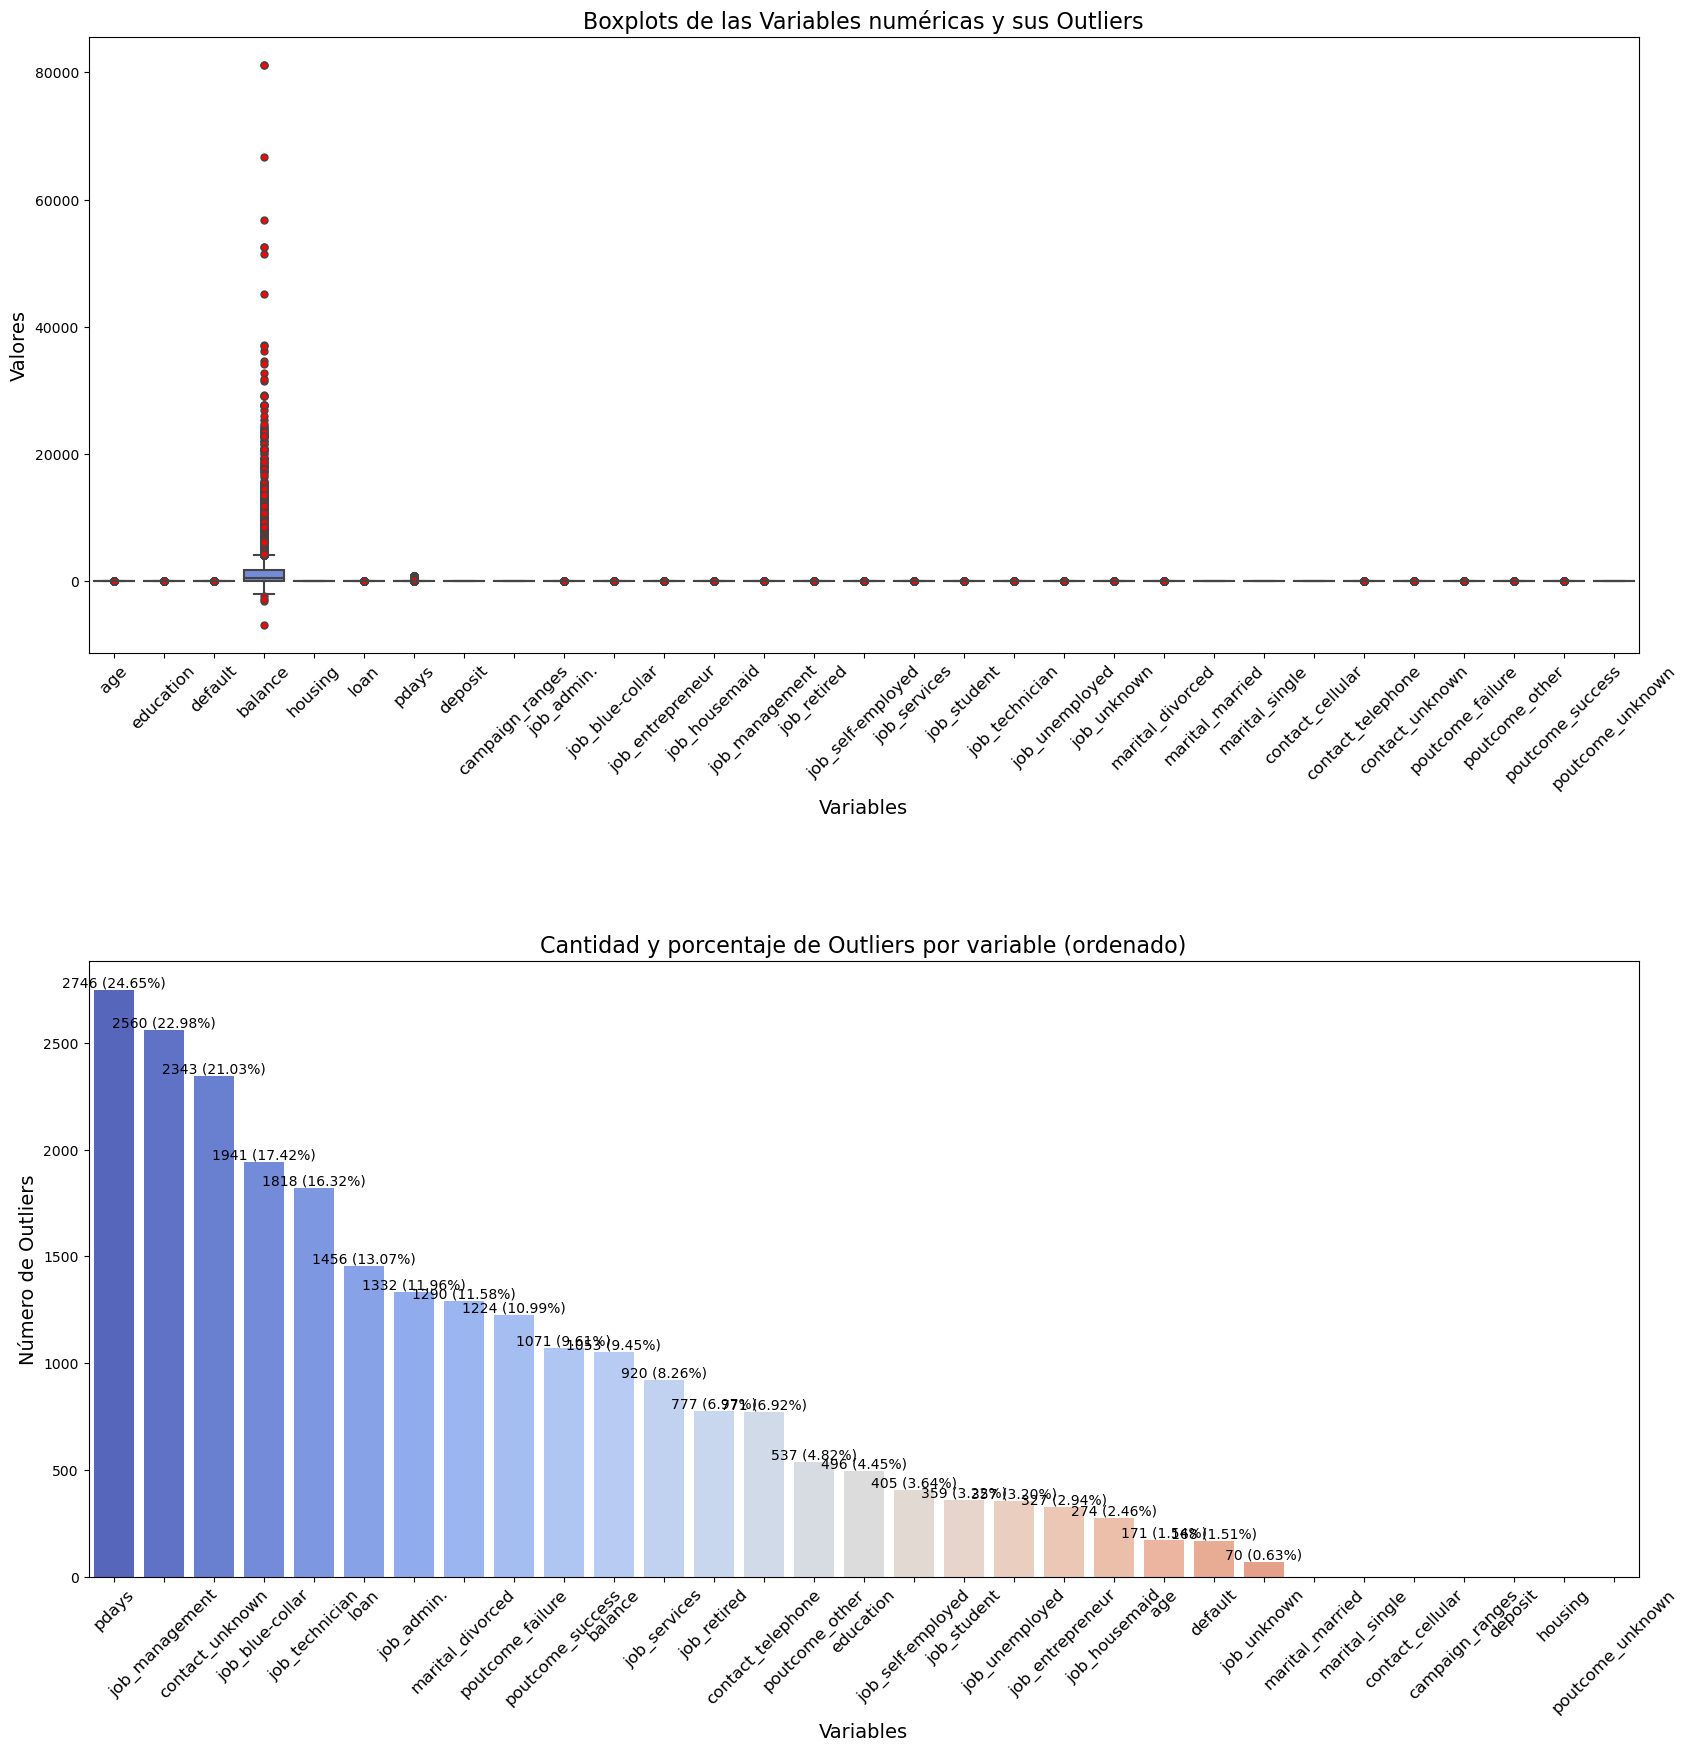

In [60]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# --- First Subplot: Boxplots ---
fig, axes = plt.subplots(2, 1, figsize=(20, 20), gridspec_kw={'hspace': 0.5})
numeric_data = data_encoded.select_dtypes(include=[np.number])
melted_data = numeric_data.reset_index().melt(id_vars=["index"], var_name="Variable", value_name="Value")

sns.boxplot(
    x="Variable",
    y="Value",
    data=melted_data,
    palette="coolwarm",
    flierprops={"marker": "o", "markerfacecolor": "red", "markersize": 5},
    orient="v",
    ax=axes[0]
)

# Adding aesthetics for the first subplot
axes[0].set_title("Boxplots de las Variables numéricas y sus Outliers", fontsize=16)
axes[0].set_xlabel("Variables", fontsize=14)
axes[0].set_ylabel("Valores", fontsize=14)
axes[0].tick_params(axis='x', rotation=45, labelsize=12)

# --- Second Subplot: Outlier Counts and Percentages ---
# Detect outliers using the IQR method
def detect_outliers_iqr(data):
    outliers = {}
    for col in data.select_dtypes(include=[np.number]):
        Q1 = np.percentile(data[col].dropna(), 25)
        Q3 = np.percentile(data[col].dropna(), 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_mask = (data[col] < lower_bound) | (data[col] > upper_bound)
        outliers[col] = outlier_mask.sum()
    return outliers

outliers_dict = detect_outliers_iqr(data_encoded)
outliers_series = pd.Series(outliers_dict)
total_observations = len(data_encoded)
outlier_percentages = (outliers_series / total_observations) * 100

# Sort outliers
sorted_outliers_series = outliers_series.sort_values(ascending=False)
sorted_outlier_percentages = outlier_percentages[sorted_outliers_series.index]

# Barplot for sorted outlier counts and percentages
sns.barplot(
    x=sorted_outliers_series.index,
    y=sorted_outliers_series.values,
    palette="coolwarm",
    ax=axes[1]
)

# Annotate bars with counts and percentages
for idx, value in enumerate(sorted_outliers_series):
    if value > 0:
        percentage = sorted_outlier_percentages[idx]
        axes[1].text(
            x=idx,
            y=value + 0.1,
            s=f"{value} ({percentage:.2f}%)",
            ha="center", 
            va="bottom",
            fontsize=10,
            color="black"
        )

# Adding aesthetics for the second subplot
axes[1].set_title("Cantidad y porcentaje de Outliers por variable (ordenado)", fontsize=16)
axes[1].set_ylabel("Número de Outliers", fontsize=14)
axes[1].set_xlabel("Variables", fontsize=14)
axes[1].tick_params(axis='x', rotation=45, labelsize=12)

# Layout adjustments and show plot
plt.tight_layout()
plt.show()


**Verificar y tratar los outliers solo en las variables relevantes.**

In [61]:
# Selección de las variables numéricas a analizar
numerical_vars = ['age', 'balance', 'pdays', 'campaign_ranges']

# Subconjunto de datos para variables numéricas
numerical_data = data_encoded[numerical_vars]

# Función para detectar outliers usando el método IQR
def detect_outliers_iqr(data):
    outliers = {}
    for col in data.columns:
        Q1 = data[col].quantile(0.25)  # Primer cuartil
        Q3 = data[col].quantile(0.75)  # Tercer cuartil
        IQR = Q3 - Q1  # Rango intercuartílico
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Detectar outliers
        outlier_mask = (data[col] < lower_bound) | (data[col] > upper_bound)
        outliers[col] = outlier_mask.sum()  # Contar outliers
    return outliers

# Detectar outliers y calcular porcentajes
outliers_dict = detect_outliers_iqr(numerical_data)
outliers_series = pd.Series(outliers_dict)
total_observations = len(numerical_data)
outlier_percentages = (outliers_series / total_observations) * 100

# Mostrar resultados
outliers_df = pd.DataFrame({
    "Variable": outliers_series.index,
    "Number of Outliers": outliers_series.values,
    "Percentage of Outliers": outlier_percentages.values
}).sort_values(by="Number of Outliers", ascending=False)

outliers_df


,Variable,Number of Outliers,Percentage of Outliers
2,pdays,2746,24.649910
1,balance,1053,9.452424
0,age,171,1.535009
3,campaign_ranges,0,0.000000


**Observaciones sobre outliers:**

- pdays tiene un alto número de outliers, lo cual es esperado, ya que muchos valores de pdays son -1, lo que podría interpretarse como un marcador de "sin contacto" y por lo tanto, genera un número muy alto de outliers si no se gestionan correctamente.

- balance tiene 1053 outliers, lo cual es comprensible dado que algunos valores de balance podrían estar muy por encima o por debajo de los valores típicos, especialmente en datos de clientes.

- age tiene 171 outliers, lo cual podría reflejar errores de entrada o clientes fuera del rango de edad típico, aunque es un número relativamente bajo comparado con los otros. Vimos en las distribuciones que n¡muchos clientes tenían entre los 30 y los 40+ años.

- campaign_ranges no muestra outliers, ya que ha sido categorizada en rangos (y es ordinal), y los valores están bien distribuidos dentro de esos rangos.



**Verificar distribuciones**

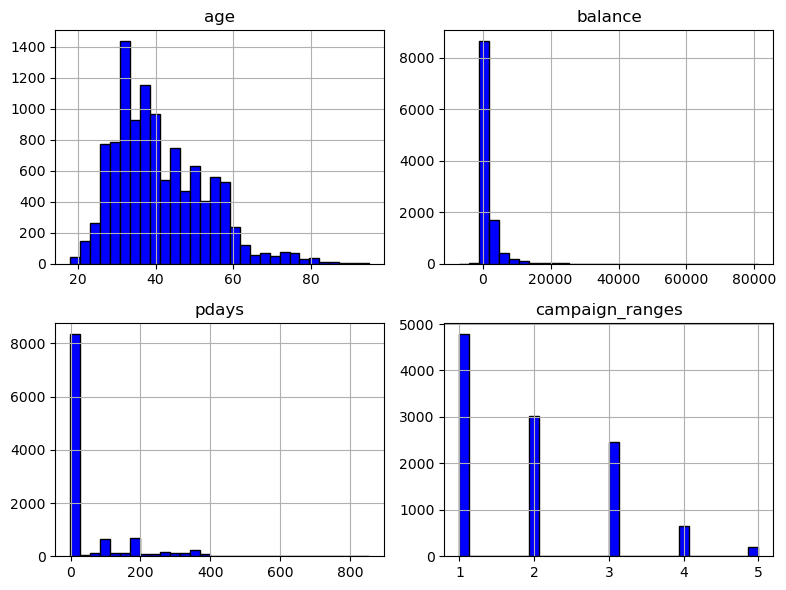

In [62]:
# Generar histogramas de todas las variables numéricas
data_encoded[['age', 'balance', 'pdays', 'campaign_ranges']].hist(bins=30, figsize=(8, 6), color='blue', edgecolor='black')

# Mostrar el gráfico
plt.tight_layout()  # Ajustar el espacio entre gráficos
plt.show()


Según los histogramas visibles en la imagen, esto es lo que se puede interpretar de las distribuciones de las variables numéricas en data_encoded:

**Observaciones sobre distribuciones:**

- age: La mayoría de los clientes están en el rango de 30 a 40 años.
Distribución con sesgo hacia la izquierda, con menos clientes en edades mayores de 60 años.

- balance: La mayoría de los valores se concentran cerca de 0, pero hay una cola extendida hacia valores altos (posiblemente hasta 80,000).
Hay valores extremos que generan una distribución muy asimétrica, sugiriendo que balance tiene outliers importantes.

- pdays: La mayor parte de los valores están en 0 o cerca de 0, indicando que muchos clientes no han sido contactados en campañas previas.
Hay valores dispersos más altos (hacia 800), pero en pequeña proporción.

- campaign_ranges: Esta variable tiene pocos valores distintos, como era de esperarse por su naturaleza categórica ordinal.
Los primeros rangos (1, 2 y 3) son los más frecuentes, lo que confirma que representan a la mayoría de los clientes.


#### **Conclusión sobre scalers, transformaciones de datos a efectuar según la presencia de outliers y sus distribuciones:**

- age: Distribución más próxima a una normal → **escalado con StandardScaler**.
- balance: Tiene muchos outliers → **escalado con RobustScaler**, que es menos sensible a ellos y reduce el impacto de valores extremos
- pdays: Amplio rango con muchos valores bajos y pocos altos → **normalización con MinMaxScaler**, que comprime los valores al rango [0, 1]. Variables con amplia dispersión y cola larga (e.g., pdays) se normalizan para mejorar la estabilidad de los modelos.
- campaign_ranges: Es categórica ordinal → **No se escala**

Código ajustado según las últimas observaciones sobre las distribuciones de las variables y su naturaleza (escalabilidad, outliers, y normalización):

In [63]:
# Importar librerías necesarias

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split

# Crear copias para no modificar directamente los datos originales
data_to_scale = data_encoded.copy()

# Identificar las variables para tratar
numeric_columns = ['age', 'balance', 'pdays']  # Campaign_ranges es categórica ordinal, no se escala

# Crear escaladores
scaler_standard = StandardScaler()  # Escalado estándar para distribuciones normales o casi normales
scaler_minmax = MinMaxScaler()      # Normalización MinMax para variables con amplio rango
scaler_robust = RobustScaler()      # Para variables con outliers significativos

# Decidir escaladores para cada variable
# 1. Variables con distribución continua no simétrica (balance): usar RobustScaler
data_to_scale['balance'] = scaler_robust.fit_transform(data_to_scale[['balance']])

# 2. Variables continuas con outliers menos severos (age): usar StandardScaler
data_to_scale['age'] = scaler_standard.fit_transform(data_to_scale[['age']])

# 3. Variables con colas largas o valores atípicos dominantes (pdays): usar MinMaxScaler
data_to_scale['pdays'] = scaler_minmax.fit_transform(data_to_scale[['pdays']])

# campaign_ranges no se escala al ser categórica ordinal, se mantiene como está

# Verificar las escalas aplicadas
print(data_to_scale.describe())

                age     education       default       balance       housing  \
count  1.114000e+04  11140.000000  11140.000000  11140.000000  11140.000000   
mean   2.347215e-16      2.106912      0.015081      0.617500      0.473339   
std    1.000045e+00      0.794522      0.121880      2.034970      0.499311   
min   -1.950396e+00      0.000000      0.000000     -4.663199      0.000000   
25%   -7.751154e-01      2.000000      0.000000     -0.269819      0.000000   
50%   -1.874752e-01      2.000000      0.000000      0.000000      0.000000   
75%    6.520108e-01      3.000000      0.000000      0.730181      1.000000   
max    4.513646e+00      3.000000      1.000000     50.845705      1.000000   

               loan         pdays       deposit  campaign_ranges  \
count  11140.000000  11140.000000  11140.000000     11140.000000   
mean       0.130700      0.061240      0.473968         1.965978   
std        0.337087      0.127236      0.499344         1.027065   
min        0.000

In [64]:
data_to_scale

,age,education,default,balance,housing,loan,pdays,deposit,campaign_ranges,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1.491497,2,0,1.130339,1,0,0.000000,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
1,1.239651,2,0,-0.318361,0,0,0.000000,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
2,-0.019578,2,0,0.453901,1,0,0.000000,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
3,1.155702,2,0,1.214184,1,0,0.000000,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1
4,1.071754,3,0,-0.230733,0,0,0.000000,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,-0.691167,1,0,-0.346099,1,0,0.000000,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1
11158,-0.187475,2,0,0.115366,0,0,0.000000,0,3,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1
11159,-0.775115,2,0,-0.328448,0,0,0.000000,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1
11160,0.148319,2,0,-0.346730,0,1,0.202339,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0


Dataset as shown in data_to_scale is properly scaled and ready for use with an SVM model.

Numerical Scaling:

    Continuous variables (age, balance, pdays) have been appropriately scaled using StandardScaler, RobustScaler, or MinMaxScaler, ensuring they are on a comparable scale.
    This is critical for SVM, which relies on distance-based metrics.

Binary and Dummified Variables:

    Binary variables (default, housing, etc.) inherently range between 0 and 1 and don’t require additional scaling.
    Dummified variables (job_admin., marital_divorced, etc.) also have a range of 0 to 1. These are suitable for SVM without further processing.
    
No Extreme Values:

    The statistics in data_to_scale.describe() confirm that all features fall within reasonable ranges, with no extreme values that could disproportionately affect SVM's decision boundary.

In [65]:
data_to_scale.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11140 entries, 0 to 11161
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                11140 non-null  float64
 1   education          11140 non-null  int32  
 2   default            11140 non-null  int32  
 3   balance            11140 non-null  float64
 4   housing            11140 non-null  int32  
 5   loan               11140 non-null  int32  
 6   pdays              11140 non-null  float64
 7   deposit            11140 non-null  int32  
 8   campaign_ranges    11140 non-null  int32  
 9   job_admin.         11140 non-null  int32  
 10  job_blue-collar    11140 non-null  int32  
 11  job_entrepreneur   11140 non-null  int32  
 12  job_housemaid      11140 non-null  int32  
 13  job_management     11140 non-null  int32  
 14  job_retired        11140 non-null  int32  
 15  job_self-employed  11140 non-null  int32  
 16  job_services       11140 no

### Reducción de dimensionalidad

**Componentes principales en PCA**: 
- Los componentes se construyen con coeficientes (pesos) determinados por el algoritmo de PCA.
- Cada componente es una nueva variable que captura una parte de la varianza (información) del conjunto de datos, ordenados por la cantidad de varianza que explican y representa una dirección en el espacio de características que maximiza la variabilidad.
- Los componentes principales son combinaciones lineales de las variables originales. 
- El primer componente captura la mayor parte de la variabilidad, el segundo captura la mayor parte restante, y así sucesivamente. El primer componente explica la mayor dispersión de los datos, y el segundo captura la variabilidad restante, siendo ortogonal al primero. Al seleccionar solo los primeros componentes, podemos reducir la dimensionalidad del conjunto de datos sin perder mucha información.



**Reducción de Dimensionalidad y Escalado**

La reducción de dimensionalidad mediante PCA no es estrictamente necesaria en este caso, ya que las variables, como las profesiones o la edad, tienen un significado claro y son importantes para el negocio. Aunque PCA puede ser útil cuando hay muchas variables correlacionadas, no es aplicable aquí, ya que las variables como 'balance', 'age' y 'pdays' no están fuertemente correlacionadas y su interpretación es clara. Por lo tanto, se prefiere mantener estas variables tal como están, especialmente después de haber sido escaladas.

**Escalado vs PCA:**

Escalado es esencial para asegurar que las variables con rangos diferentes no dominen el modelo. Esto es crucial para modelos que dependen de distancias o que utilizan métodos de optimización, como regresión logística o redes neuronales.
PCA es útil cuando hay muchas variables correlacionadas y se quiere reducir la dimensionalidad, pero no es necesario si las variables son interpretables y ya se han escalado adecuadamente.
¿PCA en variables de profesiones? Si se decide aplicar PCA a las variables dummy generadas por las profesiones, debe hacerse en todas las categorías por igual. Sin embargo, si algunas categorías tienen pocos datos, PCA podría resultar en pérdida de información relevante, lo que podría afectar la interpretabilidad.

El escalado es suficiente para las variables numéricas como 'balance', 'age' y 'pdays', sin necesidad de aplicar PCA. PCA solo sería necesario si hay muchas variables correlacionadas o muchas categorías, como en las profesiones, pero se debe tener cuidado con las categorías que contienen pocos datos.

Sin embargo, a continuación veremos el código que podríamos utilizar para aplicar PCA, en caso de que fuera necesario, después de haber escalado los datos y visualizar la varianza explicada y cómo aplicar la reducción dimensional, luego muestra cómo verificar la varianza explicada por cada componente.

**Código para aplicar PCA:**

    - Selección de Variables: El PCA solo se aplica a las variables numéricas. Aquí tomamos como ejemplo age, balance y pdays, que ya se han escalado previamente.
    - Ajuste de PCA: Usamos PCA() para ajustar el modelo a los datos escalados. Esto obtiene la varianza explicada por cada componente principal.
    - Varianza Explicada: Calculamos la proporción de varianza explicada por cada componente principal y lo visualizamos en un gráfico de barras. Esto es útil para saber cuánta información captura cada componente.
    - Reducción Dimensional: Seleccionamos los dos primeros componentes principales (n_components=2) para realizar la reducción dimensional y visualizamos los datos transformados.
    - Visualización: Creamos una visualización en 2D de los primeros dos componentes principales. La coloración por deposit (variable objetivo) puede ayudar a observar si se capturan patrones significativos.

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Paso 1: Seleccionar las variables a las que se les aplicará PCA
# En este ejemplo, solo se aplicará PCA a las variables numéricas que no sean categóricas ni ya escaladas (como 'campaign_ranges')
# Esto asume que ya se ha hecho el escalado, por lo que aplicaremos PCA a 'data_to_scale' sin las columnas dummy y ordinales

# Seleccionamos solo las columnas numéricas
columns_to_include = ['age', 'balance', 'pdays']  # Ajustar según las variables a las que se quiera aplicar PCA

# Paso 2: Aplicar PCA
pca = PCA()
data_for_pca = data_to_scale[columns_to_include]

# Ajustamos el modelo PCA a los datos escalados
pca.fit(data_for_pca)

# Paso 3: Ver la varianza explicada por cada componente
explained_variance_ratio = pca.explained_variance_ratio_

# Paso 4: Graficar la varianza explicada por cada componente
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, color='blue')
plt.xlabel('Componentes Principales')
plt.ylabel('Proporción de Varianza Explicada')
plt.title('Varianza Explicada por Cada Componente Principal')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.show()

# Paso 5: Aplicar PCA y transformar los datos
pca = PCA(n_components=2)  # Se seleccionan los dos primeros componentes principales
data_pca = pca.fit_transform(data_for_pca)

# Paso 6: Ver los datos transformados
print("Datos transformados (primeras 5 filas):")
print(data_pca[:5])

# Paso 7: Visualizar los primeros dos componentes principales
plt.figure(figsize=(10, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=data_to_scale['deposit'], cmap='coolwarm', alpha=0.7)
plt.title('Distribución de los Datos Tras PCA (Componentes 1 y 2)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Deposit')
plt.show()


## **División Train-Test**

Primero, vamos a separar los datos en un conjunto de entrenamiento (train) y un conjunto de prueba (test). Esto es esencial para poder evaluar correctamente el desempeño de tu modelo en datos no vistos. Generalmente, usamos un 80% para el entrenamiento y un 20% para la prueba, pero puedes ajustar este porcentaje según el caso.

- **X** contiene todas las variables predictoras (todas las columnas excepto la variable objetivo target).
- **y** es la variable que queremos predecir (la variable objetivo).
- **train_test_split** para dividir los datos, con el 80% para entrenamiento y el 20% para prueba (puedes cambiar test_size si prefieres otro porcentaje).
- **random_state=42** es un valor fijo que hace que los resultados sean reproducibles.
- **test_size=0.2**: El 20% de los datos se utiliza para las pruebas, el resto para entrenar el modelo.

Dividir los datos en train-test primero y luego calcular la importancia de características para los tres modelos (**Random Forest, Logistic Regression y SVM**). Tener los datos ya divididos asegura que los modelos se entrenen y evalúen correctamente, y que los resultados de importancia de características sean consistentes con el enfoque de evaluación.

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance
import pandas as pd
import numpy as np

# Asegurarnos de que la variable objetivo (target) esté separada
X = data_to_scale.drop(columns=['deposit'])  # Aquí 'deposit' es la variable a predecir
y = data_to_scale['deposit']

# Dividir los datos en train (80%) y test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar las dimensiones de los conjuntos de datos
print(f'Tamaño de X_train: {X_train.shape}')
print(f'Tamaño de X_test: {X_test.shape}')
print(f'Tamaño de y_train: {y_train.shape}')
print(f'Tamaño de y_test: {y_test.shape}')

Tamaño de X_train: (8912, 30)
Tamaño de X_test: (2228, 30)
Tamaño de y_train: (8912,)
Tamaño de y_test: (2228,)


## **Entrenamiento de modelos con Importancia de características (Feature importance)**

¿Cuándo realizarlo: antes o después de escalar columnas? Antes o después de dummificar? Para cualquier modelo, las importancias se calculan después de dummificar, porque las variables categóricas deben convertirse en numéricas. 

- Para **Random Forest** y otros **árboles de decisión**, no importa si los datos están escalados o no. La importancia de características se calcula directamente desde ***feature_importances_***.
- Para **modelos lineales**, como **LogisticRegression**, los datos deben estar escalados antes de calcular las importancias. La importancia de características se deriva de los coeficientes del modelo (***coef_***), tomados en valor absoluto.
- Para SVM, también podemos usar el conjunto *data_to_scale* para entrenar sin preprocesamiento adicional. Como SVM con un kernel lineal no devuelve coeficientes directos, se usa la ***permute importance*** para medir la relevancia de cada característica.

Dado que ya hemos dummificado y escalado los datos, esto beneficia a los tres modelos y podemos preceder a conocer la *Importancia de características*.


In [67]:
# Diccionario para almacenar importancias
feature_importance_results = {}

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

rf_importances = rf_model.feature_importances_
feature_importance_results['Random Forest'] = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_importances
}).sort_values(by='Importance', ascending=False)

# Logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)

lr_importances = np.abs(lr_model.coef_[0])  # Coeficientes absolutos
feature_importance_results['Logistic Regression'] = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': lr_importances
}).sort_values(by='Importance', ascending=False)

# SVM (Permutational Importance)
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Usar Permutational Importance para SVM (no tiene coeficientes directos como Logistic Regression)
svm_permutation = permutation_importance(svm_model, X_test, y_test, n_repeats=10, random_state=42)
svm_importances = svm_permutation['importances_mean']
feature_importance_results['SVM'] = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': svm_importances
}).sort_values(by='Importance', ascending=False)

# Mostrar los resultados
for model_name, importance_df in feature_importance_results.items():
    print(f"\nImportancia de características para {model_name}:")
    print(importance_df)


Importancia de características para Random Forest:
              Feature  Importance
3             balance    0.269730
0                 age    0.219331
7     campaign_ranges    0.073412
6               pdays    0.060280
1           education    0.048945
28   poutcome_success    0.041588
4             housing    0.033019
25    contact_unknown    0.027780
23   contact_cellular    0.023770
5                loan    0.021224
29   poutcome_unknown    0.015294
17     job_technician    0.014592
21    marital_married    0.013764
12     job_management    0.013293
9     job_blue-collar    0.013202
8          job_admin.    0.012849
22     marital_single    0.012172
15       job_services    0.010102
20   marital_divorced    0.009853
26   poutcome_failure    0.007714
13        job_retired    0.007634
14  job_self-employed    0.007294
18     job_unemployed    0.007107
24  contact_telephone    0.006883
10   job_entrepreneur    0.006687
11      job_housemaid    0.005715
16        job_student    0.005

In [87]:
# Diccionario para modelos y sus respectivas funciones de importancia
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'SVM': SVC(kernel='linear', random_state=42)
}

importance_dfs = {}  # Para almacenar los DataFrames de importancia

# Calcular las importancias para cada modelo
for model_name, model in models.items():
    print(f"Entrenando el modelo {model_name}...")
    model.fit(X_train, y_train)
    
    if model_name == 'Random Forest':
        # Importancias directas
        importances = model.feature_importances_
    elif model_name == 'Logistic Regression':
        # Coeficientes absolutos
        importances = np.abs(model.coef_[0])
    elif model_name == 'SVM':
        # Permutational Importance
        perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
        importances = perm_importance['importances_mean']
    
    # Crear el DataFrame ordenado
    importance_df = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)
    
    # Guardar en el diccionario
    importance_dfs[model_name] = importance_df

# Mostrar y guardar los resultados
for model_name, df in importance_dfs.items():
    print(f"\nImportancia de características para {model_name}:")
    print(df)  # Mostrar las 5 primeras características más importantes

Entrenando el modelo Random Forest...
Entrenando el modelo Logistic Regression...
Entrenando el modelo SVM...

Importancia de características para Random Forest:
           Feature  Importance
3          balance    0.269730
0              age    0.219331
7  campaign_ranges    0.073412
6            pdays    0.060280
1        education    0.048945

Importancia de características para Logistic Regression:
             Feature  Importance
28  poutcome_success    1.536199
29  poutcome_unknown    0.691906
25   contact_unknown    0.607732
16       job_student    0.579018
26  poutcome_failure    0.574452

Importancia de características para SVM:
             Feature  Importance
4            housing    0.021724
28  poutcome_success    0.015215
29  poutcome_unknown    0.012612
7    campaign_ranges    0.009874
3            balance    0.008034


Los resultados de las importancias de características en cada modelo son notoriamente diferentes, lo que es normal debido a las diferencias en cómo cada algoritmo aprende de los datos:

Random Forest: Evalúa las características basándose en su contribución a la reducción de la impureza (GINI o entropía) en los árboles. Las variables más importantes son aquellas que generan las mayores divisiones iniciales en los árboles.
Aquí destacan **balance, age, y campaign_ranges** como las más influyentes.

Logistic Regression: Considera los coeficientes de las variables, que indican su peso relativo en la predicción. Las variables categóricas que representan el resultado de campañas previas (**poutcome_success, poutcome_unknown**) tienen mayor peso, lo cual es consistente con la naturaleza probabilística del modelo.
Algunas variables como **job_student** o **contact_unknown** tienen alta importancia, aunque no aparecen relevantes en otros modelos.

SVM: No calcula importancia de características directamente. Los valores listados probablemente provienen de un **análisis basado en pesos de los vectores de soporte**, pero no siempre son tan interpretables como en otros modelos.
Aquí **housing**, **poutcome_success**, y **campaign_ranges** destacan, aunque los valores de importancia son más uniformes y con rangos pequeños.

---> **Random Forest** puede captar relaciones no lineales e interacciones entre variables, mientras que los otros modelos no lo hacen tan bien

### **Métricas de evaluación de modelos de Machine Learning**

In [68]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Function to evaluate metrics
def evaluate_metrics(y_true, y_pred, model_name):
    metrics = {
        "Modelo": model_name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1-Score": f1_score(y_true, y_pred),
        "AUC-ROC": roc_auc_score(y_true, y_pred),
    }
    cm = confusion_matrix(y_true, y_pred)
    return metrics, cm

# Predictions for each model
rf_preds = rf_model.predict(X_test)
lr_preds = lr_model.predict(X_test)
svm_preds = svm_model.predict(X_test)

# Evaluate and collect metrics
rf_metrics, rf_cm = evaluate_metrics(y_test, rf_preds, "Random Forest")
lr_metrics, lr_cm = evaluate_metrics(y_test, lr_preds, "Logistic Regression")
svm_metrics, svm_cm = evaluate_metrics(y_test, svm_preds, "SVM")

# Create DataFrame for metrics
metrics_df = pd.DataFrame([rf_metrics, lr_metrics, svm_metrics])

# Display metrics
print("Métricas de los modelos:")
print(metrics_df)

# Display confusion matrices
print("\nMatriz de confusión para Random Forest:")
print(rf_cm)
print("\nMatriz de confusión para Regresión Logística:")
print(lr_cm)
print("\nMatriz de confusión para SVM:")
print(svm_cm)


Métricas de los modelos:
                Modelo  Accuracy  Precision    Recall  F1-Score   AUC-ROC
0        Random Forest  0.668761   0.677720  0.604995  0.639296  0.666927
1  Logistic Regression  0.679982   0.688912  0.620722  0.653041  0.678277
2                  SVM  0.675045   0.703072  0.571693  0.630612  0.672071

Matriz de confusión para Random Forest:
[[836 311]
 [427 654]]

Matriz de confusión para Regresión Logística:
[[844 303]
 [410 671]]

Matriz de confusión para SVM:
[[886 261]
 [463 618]]


**Observaciones:**

- Logistic Regression es el más equilibrado. Es ideal si el objetivo es captar el mayor número de clientes interesados, gracias a su recall y F1-Score más altos.
- Random Forest es robusto y adecuado para un rendimiento general, pero puede necesitar ajustes en los hiperparámetros para mejorar su capacidad de captar clientes interesados.
- SVM es más preciso al evitar falsos positivos, pero su bajo recall lo hace menos efectivo para una campaña centrada en captar nuevos clientes.

En este caso de marketing bancario:

- Si evitar costos innecesarios es clave (minimizar falsos positivos), SVM es útil.
- Si el foco es maximizar clientes interesados, Logistic Regression es la mejor opción.

### Perform Cross Validation for Each Model

Cross-validation allows you to evaluate models more robustly by splitting the dataset into multiple train-test sets.

In [90]:
from sklearn.model_selection import cross_val_score

# Cross-validation for each model
models = {'Random Forest': rf_model, 'Logistic Regression': lr_model, 'SVM': svm_model}

cv_results = {}
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')  # Adjust scoring if needed
    cv_results[model_name] = {
        "Mean Accuracy": cv_scores.mean(),
        "Std Dev Accuracy": cv_scores.std(),
        "Fold Accuracies": cv_scores
    }

# Display results
for model_name, results in cv_results.items():
    print(f"\nResultados de Cross Validation para {model_name}:")
    print(f"Mean Accuracy: {results['Mean Accuracy']:.4f}")
    print(f"Std Dev Accuracy: {results['Std Dev Accuracy']:.4f}")
    print(f"Fold Accuracies: {results['Fold Accuracies']}")



Resultados de Cross Validation para Random Forest:
Mean Accuracy: 0.6701
Std Dev Accuracy: 0.0035
Fold Accuracies: [0.66965788 0.66629277 0.67564534 0.67227834 0.66666667]

Resultados de Cross Validation para Logistic Regression:
Mean Accuracy: 0.6794
Std Dev Accuracy: 0.0049
Fold Accuracies: [0.67358385 0.6752664  0.68125701 0.67957351 0.68742985]

Resultados de Cross Validation para SVM:
Mean Accuracy: 0.6816
Std Dev Accuracy: 0.0089
Fold Accuracies: [0.67021873 0.67246214 0.68630752 0.68518519 0.69360269]


Realizar Cross Validation utilizando scoring='accuracy', scoring='precision', y scoring='recall'. Esto permitirá evaluar el rendimiento de cada modelo bajo diferentes métricas de evaluación:

In [91]:
from sklearn.model_selection import cross_val_score

# Lista de modelos
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "SVM": SVC(kernel='linear', random_state=42)
}

# Resultados para cada métrica
cv_results = {
    "Model": [],
    "Metric": [],
    "Mean Score": [],
    "Standard Deviation": []
}

# Métricas a evaluar
metrics = ["accuracy", "precision", "recall"]

# Cross-validation para cada modelo y métrica
for model_name, model in models.items():
    for metric in metrics:
        scores = cross_val_score(model, X_train, y_train, cv=5, scoring=metric)
        cv_results["Model"].append(model_name)
        cv_results["Metric"].append(metric)
        cv_results["Mean Score"].append(scores.mean())
        cv_results["Standard Deviation"].append(scores.std())

# Convertir resultados a DataFrame para visualización
cv_results_df = pd.DataFrame(cv_results)

# Mostrar resultados ordenados
print("Resultados de Cross Validation por Métrica:")
print(cv_results_df.sort_values(by=["Metric", "Mean Score"], ascending=False))


Resultados de Cross Validation por Métrica:
                 Model     Metric  Mean Score  Standard Deviation
2        Random Forest     recall    0.598000            0.009737
5  Logistic Regression     recall    0.593475            0.018015
8                  SVM     recall    0.563936            0.024681
7                  SVM  precision    0.702189            0.015715
4  Logistic Regression  precision    0.684261            0.003419
1        Random Forest  precision    0.667398            0.006195
6                  SVM   accuracy    0.681555            0.008856
3  Logistic Regression   accuracy    0.679422            0.004876
0        Random Forest   accuracy    0.670108            0.003521


In [92]:
cv_results_df

,Model,Metric,Mean Score,Standard Deviation
0,Random Forest,accuracy,0.670108,0.003521
1,Random Forest,precision,0.667398,0.006195
2,Random Forest,recall,0.598000,0.009737
3,Logistic Regression,accuracy,0.679422,0.004876
4,Logistic Regression,precision,0.684261,0.003419
5,Logistic Regression,recall,0.593475,0.018015
6,SVM,accuracy,0.681555,0.008856
7,SVM,precision,0.702189,0.015715
8,SVM,recall,0.563936,0.024681


#### **Interpretación de los resultados:**

Random Forest:
    Accuracy (67.01%): Un rendimiento estable en general, pero ligeramente inferior al de otros modelos.
    Precision (66.74%): Apropiado para minimizar contactos innecesarios, pero no tan alto como SVM.
    Recall (59.80%): Indica que se pierden más casos positivos en comparación con los otros modelos.
    
Logistic Regression:
    Accuracy (67.94%): Ligeramente superior a Random Forest, pero no por un margen significativo.
    Precision (68.42%): Similar a Random Forest, pero muestra un leve incremento en la capacidad de evitar falsos positivos.
    Recall (59.35%): Similar a Random Forest, pero con menor desviación estándar.
    
SVM:
    Accuracy (68.15%): Es el modelo más preciso en términos generales.
    Precision (70.21%): Sobresale en evitar falsos positivos, siendo el mejor modelo para predecir clientes que realmente depositarán.
    Recall (56.39%): Sin embargo, tiene un recall más bajo, lo que significa que pierde más casos positivos en comparación con los otros modelos.

**Conclusión Parcial:**

- SVM tiene el mejor desempeño en precisión y exactitud, lo que lo hace ideal si el enfoque es evitar falsos positivos, minimizando costos innecesarios. Es el mejor modelo para predecir clientes que no depositarán porque tiene alta precisión, asegurando que los contactos sean más precisos. No es el mejor modelo para captar a todos los clientes interesados en el depósito porque su recall es bajo y pierde muchos casos positivos.

    Precision alta (70.21%): Indica que cuando el modelo predice un cliente como positivo (es decir, que depositará), tiene una mayor probabilidad de acertar en comparación con los otros modelos. Esto significa que es muy eficaz en evitar falsos positivos, lo cual es útil para minimizar costos de contactar a clientes no interesados.

    Recall bajo (56.39%): Por otro lado, el modelo pierde más casos positivos (falsos negativos) en comparación con Random Forest y Logistic Regression. Esto significa que es menos efectivo en capturar todos los clientes que realmente se suscribirían.

- Logistic Regression tiene un rendimiento balanceado, siendo útil para interpretar la contribución de cada variable.
- Random Forest tiene un rendimiento estable, pero con recall superior, podría mejorar con ajuste de hiperparámetros.

Finalmente, a parte de los cálculos que hagamos, podemos pensar que en un caso así, posiblemente ningun modelo realmente pueda **captar todos los clientes** que realmente se suscribirían, porque hay un **factor humano que depende del momento en el que se encuentra el cliente** en sus necesidades, su vida personal y profesional; además no se sabe si es conjunto de datos dice toda la verdad, dado que muchos pueden no haber querido contestar o que hayan respondido algo que no es del todo cierto (profesión, educación, estado maritaletc), voluntariamente o por errores del factor humano. 

**Obtener Resultados de Cross Validation por cada Pliegue (Fold):**

In [93]:
# Resultados por fold
fold_results = []

for model_name, model in models.items():
    for metric in metrics:
        scores = cross_val_score(model, X_train, y_train, cv=5, scoring=metric)
        for fold_idx, score in enumerate(scores, 1):  # Enumerar los folds
            fold_results.append({
                "Model": model_name,
                "Metric": metric,
                "Fold": fold_idx,
                "Score": score
            })

# Convertir a DataFrame
fold_results_df = pd.DataFrame(fold_results)

# Mostrar los resultados por fold
print("Resultados por Fold:")
print(fold_results_df.sort_values(by=["Model", "Metric", "Fold"]))


Resultados por Fold:
                  Model     Metric  Fold     Score
15  Logistic Regression   accuracy     1  0.673584
16  Logistic Regression   accuracy     2  0.675266
17  Logistic Regression   accuracy     3  0.681257
18  Logistic Regression   accuracy     4  0.679574
19  Logistic Regression   accuracy     5  0.687430
20  Logistic Regression  precision     1  0.682203
21  Logistic Regression  precision     2  0.679505
22  Logistic Regression  precision     3  0.686897
23  Logistic Regression  precision     4  0.689170
24  Logistic Regression  precision     5  0.683528
25  Logistic Regression     recall     1  0.575000
26  Logistic Regression     recall     2  0.588095
27  Logistic Regression     recall     3  0.593564
28  Logistic Regression     recall     4  0.583333
29  Logistic Regression     recall     5  0.627381
0         Random Forest   accuracy     1  0.669658
1         Random Forest   accuracy     2  0.666293
2         Random Forest   accuracy     3  0.675645
3         

**Extract Model Parameters**

In [94]:
# Get parameters for each model
for model_name, model in models.items():
    print(f"\nParámetros utilizados en {model_name}:")
    print(model.get_params())



Parámetros utilizados en Random Forest:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}

Parámetros utilizados en Logistic Regression:
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

Parámetros utilizados en SVM:
{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'ran

**Entrenar de nuevo pero con Best Parameters a través de RandomizedSearchCV**

Parámetros de ajuste:

- Para Random Forest, probamos con diferentes valores de n_estimators y max_depth. También incluimos class_weight='balanced' para manejar el desequilibrio de clases.
- Para Logistic Regression, ajustamos el parámetro C y la regularización penalty. También agregamos class_weight='balanced'.
- Para SVM, exploramos diferentes valores de C, gamma y kernel. También incluimos class_weight='balanced' para manejar el pequeño desequilibrio.

Reentrenamiento de los modelos: Después de encontrar los mejores parámetros con RandomizedSearchCV, se reentrenan los modelos con esos parámetros.

Evaluación del rendimiento: Se evalúan los modelos en el conjunto de prueba (X_test) para verificar su rendimiento con los parámetros óptimos.

In [95]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Definimos los modelos y los parámetros a buscar
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(random_state=42)
}

# Parámetros a ajustar para cada modelo
param_grid = {
    "Random Forest": {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'class_weight': ['balanced', None]
    },
    "Logistic Regression": {
        'C': [0.1, 1, 10],
        'penalty': ['l2'],
        'class_weight': ['balanced', None],
        'solver': ['lbfgs', 'liblinear']
    },
    "SVM": {
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto'],
        'kernel': ['linear', 'rbf'],
        'class_weight': ['balanced', None]
    }
}

# Realizamos la búsqueda de los mejores parámetros con RandomizedSearchCV
best_models = {}
for model_name, model in models.items():
    print(f"Buscando mejores parámetros para {model_name}...")
    random_search = RandomizedSearchCV(model, param_grid[model_name], n_iter=10, cv=5, scoring='accuracy', random_state=42)
    random_search.fit(X_train, y_train)
    best_models[model_name] = random_search.best_estimator_

# Entrenamiento de los modelos con los mejores parámetros
for model_name, model in best_models.items():
    print(f"Reentrenando el modelo {model_name} con los mejores parámetros...")
    model.fit(X_train, y_train)

# Evaluar los modelos con los mejores parámetros en X_test
for model_name, model in best_models.items():
    print(f"Evaluando {model_name} en X_test...")
    score = model.score(X_test, y_test)
    print(f"Score de {model_name}: {score:.4f}")


Buscando mejores parámetros para Random Forest...
Buscando mejores parámetros para Logistic Regression...
Buscando mejores parámetros para SVM...
Reentrenando el modelo Random Forest con los mejores parámetros...
Reentrenando el modelo Logistic Regression con los mejores parámetros...
Reentrenando el modelo SVM con los mejores parámetros...
Evaluando Random Forest en X_test...
Score de Random Forest: 0.7074
Evaluando Logistic Regression en X_test...
Score de Logistic Regression: 0.6804
Evaluando SVM en X_test...
Score de SVM: 0.6899


El **score** que estamos viendo es accuracy (precisión global) del modelo, ya que es la métrica predeterminada utilizada por model.score(X_test, y_test) en los clasificadores de sklearn.

**Random Forest** parece ser el modelo más prometedor para este problema de predicción de depósito bancario, ya que obtuvo la puntuación más alta con **0.7074**. Es adecuado para datos no lineales y puede capturar interacciones complejas entre las variables, lo que probablemente le dio ventaja en este caso.es adecuado para datos no lineales y puede capturar interacciones complejas entre las variables, lo que probablemente le dio ventaja en este caso.

Logistic Regression Es un modelo más simple y podría estar limitado al no capturar todas las interacciones o no manejar tan bien características no lineales

Los SVM suelen ser efectivos en conjuntos de datos con límites de decisión claros, pero pueden verse afectados si las clases no son separables linealmente y el conjunto de datos tiene ruido

In [97]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Evaluar los modelos con métricas detalladas
for model_name, model in best_models.items():
    print(f"\nEvaluando {model_name} con los mejores parámetros...")
    
    # Predicciones en el conjunto de prueba
    y_pred = model.predict(X_test)
    
    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Matriz de confusión
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Reporte de clasificación
    class_report = classification_report(y_test, y_pred, target_names=["No Depósito", "Depósito"])
    
    # Mostrar resultados
    print(f"\nMatriz de Confusión para {model_name}:")
    print(conf_matrix)
    print("\nReporte de Clasificación:")
    print(class_report)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("-" * 40)




Evaluando Random Forest con los mejores parámetros...

Matriz de Confusión para Random Forest:
[[917 230]
 [422 659]]

Reporte de Clasificación:
              precision    recall  f1-score   support

 No Depósito       0.68      0.80      0.74      1147
    Depósito       0.74      0.61      0.67      1081

    accuracy                           0.71      2228
   macro avg       0.71      0.70      0.70      2228
weighted avg       0.71      0.71      0.70      2228

Accuracy: 0.7074
Precision: 0.7413
Recall: 0.6096
F1 Score: 0.6690
----------------------------------------

Evaluando Logistic Regression con los mejores parámetros...

Matriz de Confusión para Logistic Regression:
[[843 304]
 [408 673]]

Reporte de Clasificación:
              precision    recall  f1-score   support

 No Depósito       0.67      0.73      0.70      1147
    Depósito       0.69      0.62      0.65      1081

    accuracy                           0.68      2228
   macro avg       0.68      0.68      0.68

El modelo con las mejores métricas en conjunto es **Random Forest con los mejores parámetros**

El recall (también conocido como sensibilidad o tasa de verdaderos positivos) nos indica la proporción de casos positivos correctamente identificados por el modelo, en relación con todos los casos positivos reales.

Según los objetivos del proyecto y las consecuencias asociadas con los falsos negativos o positivos en el contexto de la predicción de depósitos bancarios. Vamos a analizar ambos escenarios:

**Minimizar los falsos negativos (Recall alto):**

- Importante para identificar a todos los clientes que podrían estar interesados en realizar un depósito (verdaderos positivos), incluso a costa de incluir a algunos que no lo están (falsos positivos).

- Beneficio: Aumenta la cobertura en campañas de marketing, maximizando el número de clientes potenciales alcanzados.
- Coste: gastar recursos en clientes que no tienen interés en hacer depósitos (falsos positivos).

Los valores de recall en los resultados son inferiores a los de precision, lo que indica que los modelos tienen dificultades para identificar a todos los clientes interesados en realizar depósitos (falsos negativos altos). Esto puede deberse a desequilibrios en las clases, características del dataset, o la forma en que están configurados los modelos.

**Maximizar los verdaderos positivos (Precisión alta):**

- Importante para centrarte únicamente en clientes que casi con certeza harán un depósito, evitando contactar a personas que no están interesadas (minimizar falsos positivos).

- Beneficio: Ahorro de recursos y tiempo al enfocarte en los clientes más propensos.
- Coste: perder oportunidades valiosas al ignorar clientes interesados (falsos negativos).


In [ ]:
Importancia de características para Random Forest:
           Feature  Importance
3          balance    0.269730
0              age    0.219331
7  campaign_ranges    0.073412
6            pdays    0.060280
1        education    0.048945

Importancia de características para Logistic Regression:
             Feature  Importance
28  poutcome_success    1.536199
29  poutcome_unknown    0.691906
25   contact_unknown    0.607732
16       job_student    0.579018
26  poutcome_failure    0.574452

Importancia de características para SVM:
             Feature  Importance
4            housing    0.021724
28  poutcome_success    0.015215
29  poutcome_unknown    0.012612
7    campaign_ranges    0.009874
3            balance    0.008034

A raíz de los resultados obtenidos de los modelos, y conociendo la importancia de características para cada uno, podemos usar una o varias de las siguientes estratégias :
    
- Optimización específica para cada modelo: Crear subconjuntos de características personalizados según las importancias de cada modelo y entrenar con ellas.

- Métodos de selección de características independientes: Usar técnicas como Recursive Feature Elimination (RFE) o análisis de correlación para seleccionar un conjunto óptimo de características común a todos los modelos.

- Combinación de modelos: En lugar de confiar en un único modelo, usar un ensamble (votación o ponderación) que combine los puntos fuertes de cada modelo.

- Evaluar estabilidad: Analizar cómo cambia el rendimiento del modelo si eliminas características con baja importancia en cada caso.

## **Entrenar con subconjuntos**

De esto, vamos a crear un subconjunto 
- eliminando datos de profesiones (jobs), ya que crea estigmas y además es poco concluyente
- manteniendo datos lógicos que el banco puede preguntar y que además hemos visto en varios analisis que son importantes en uno o varios modelos, como **campaign_ranges, balance, age, education, housing, loan, poutcome_success, poutcome_unknown**

In [118]:
from sklearn.metrics import classification_report, confusion_matrix

# Variables seleccionadas
selected_features = ['campaign_ranges', 'balance', 'age', 'education', 'housing', 'loan', 
                     'poutcome_success','pdays']
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Modelos iniciales por defecto
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

default_models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'SVM': SVC(random_state=42, probability=True)
}

# Entrenar y evaluar modelos por defecto
default_metrics = {}
for model_name, model in default_models.items():
    print(f"Entrenando {model_name}...")
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    
    # Métricas y Matriz de Confusión
    print(f"\nMatriz de Confusión para {model_name}:\n{confusion_matrix(y_test, y_pred)}")
    print(f"Reporte de Clasificación para {model_name}:\n{classification_report(y_test, y_pred)}")
    default_metrics[model_name] = classification_report(y_test, y_pred, output_dict=True)



Entrenando Random Forest...

Matriz de Confusión para Random Forest:
[[799 348]
 [443 638]]
Reporte de Clasificación para Random Forest:
              precision    recall  f1-score   support

           0       0.64      0.70      0.67      1147
           1       0.65      0.59      0.62      1081

    accuracy                           0.64      2228
   macro avg       0.65      0.64      0.64      2228
weighted avg       0.65      0.64      0.64      2228

Entrenando Logistic Regression...

Matriz de Confusión para Logistic Regression:
[[885 262]
 [500 581]]
Reporte de Clasificación para Logistic Regression:
              precision    recall  f1-score   support

           0       0.64      0.77      0.70      1147
           1       0.69      0.54      0.60      1081

    accuracy                           0.66      2228
   macro avg       0.66      0.65      0.65      2228
weighted avg       0.66      0.66      0.65      2228

Entrenando SVM...

Matriz de Confusión para SVM:
[[948

Interpretación General

Reducir las variables no afectó drásticamente el rendimiento para la clase 'deposit' = 0, pero sí para la clase 'deposit' = 1, lo que indica que las variables seleccionadas tienen un buen poder predictivo y posiblemente capturan la mayor parte de la información relevante.
SVM parece ser el modelo que más se beneficia de la simplificación, lo que puede deberse a su sensibilidad a la dimensionalidad del espacio de características.

- un mejor recall de la clase 0 (de 79% a 83%) significa que el modelo SVM con las variables seleccionadas fue capaz de identificar correctamente una mayor proporción de los casos que realmente pertenecen a la clase 0 (personas que no depositan en este caso). 
- Si el modelo identifica correctamente más personas que no depositan, los comerciales pueden enfocarse exclusivamente en los clientes potenciales que tienen mayor probabilidad de depositar (clase 1).
- Mejora del recall de SVM: los clientes descartados (clase 0) quedan identificados como no prioritarios, permitiendo a los comerciales segmentar mejor a los clientes con alta probabilidad (clase 1).

In [119]:
from sklearn.model_selection import GridSearchCV

# Definir hiperparámetros para cada modelo y balance de clases (entre deposit 0 y 1)
param_grid = {
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'class_weight': ['balanced', None]
    },
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10],
        'penalty': ['l2'],
        'class_weight': ['balanced', None]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf', 'poly'],
        'class_weight': ['balanced', None]
    }
}

# Ajustar hiperparámetros y entrenar nuevamente
best_models = {}
for model_name, model in default_models.items():
    print(f"\nAjustando hiperparámetros para {model_name} con Grid Search...")
    grid_search = GridSearchCV(model, param_grid[model_name], cv=5, scoring='accuracy', verbose=1)
    grid_search.fit(X_train_selected, y_train)
    best_models[model_name] = grid_search.best_estimator_
    print(f"Mejores parámetros para {model_name}: {grid_search.best_params_}")



Ajustando hiperparámetros para Random Forest con Grid Search...
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Mejores parámetros para Random Forest: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}

Ajustando hiperparámetros para Logistic Regression con Grid Search...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Mejores parámetros para Logistic Regression: {'C': 10, 'class_weight': None, 'penalty': 'l2'}

Ajustando hiperparámetros para SVM con Grid Search...
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Mejores parámetros para SVM: {'C': 10, 'class_weight': None, 'kernel': 'rbf'}


**Reevaluar los Modelos con los Mejores Parámetros**

In [120]:
# Reevaluar modelos ajustados
for model_name, model in best_models.items():
    print(f"\nEvaluando {model_name} con los mejores parámetros...")
    y_pred = model.predict(X_test_selected)
    
    # Métricas y Matriz de Confusión
    print(f"Matriz de Confusión para {model_name}:\n{confusion_matrix(y_test, y_pred)}")
    print(f"Reporte de Clasificación para {model_name}:\n{classification_report(y_test, y_pred)}")



Evaluando Random Forest con los mejores parámetros...
Matriz de Confusión para Random Forest:
[[934 213]
 [456 625]]
Reporte de Clasificación para Random Forest:
              precision    recall  f1-score   support

           0       0.67      0.81      0.74      1147
           1       0.75      0.58      0.65      1081

    accuracy                           0.70      2228
   macro avg       0.71      0.70      0.69      2228
weighted avg       0.71      0.70      0.70      2228


Evaluando Logistic Regression con los mejores parámetros...
Matriz de Confusión para Logistic Regression:
[[886 261]
 [500 581]]
Reporte de Clasificación para Logistic Regression:
              precision    recall  f1-score   support

           0       0.64      0.77      0.70      1147
           1       0.69      0.54      0.60      1081

    accuracy                           0.66      2228
   macro avg       0.66      0.65      0.65      2228
weighted avg       0.66      0.66      0.65      2228


E

Esta vez los mejores parámetros con Grid Search han **mejorado mucho Random Forest** y SVM se ha quedado similar. 

El mejor modelo reducido ponderando recall para la clase 0 y la clase 1, como accuracy es Random Forest con los selected_features = ['campaign_ranges', 'balance', 'age', 'education', 'housing', 'loan', 'poutcome_success','pdays'] y mejores parámetros.


**Entrenamiento del modelo Random Forest definitivo**

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Variables seleccionadas
selected_features = ['campaign_ranges', 'balance', 'age', 'education', 'housing', 'loan', 
                     'poutcome_success', 'pdays']
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Modelo inicial Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Entrenar el modelo
print("Entrenando Random Forest...")
rf_model.fit(X_train_selected, y_train)

# Predicciones
y_pred_rf = rf_model.predict(X_test_selected)

# Métricas y Matriz de Confusión
print("\nMatriz de Confusión para Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nReporte de Clasificación para Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Guardar las métricas
rf_metrics = classification_report(y_test, y_pred_rf, output_dict=True)


Entrenando Random Forest...

Matriz de Confusión para Random Forest:
[[799 348]
 [443 638]]

Reporte de Clasificación para Random Forest:
              precision    recall  f1-score   support

           0       0.64      0.70      0.67      1147
           1       0.65      0.59      0.62      1081

    accuracy                           0.64      2228
   macro avg       0.65      0.64      0.64      2228
weighted avg       0.65      0.64      0.64      2228



Ajustar hiperparámetros con GridSearchCV

In [70]:
from sklearn.model_selection import GridSearchCV

# Definir hiperparámetros para Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced', None]
}

# Ajustar hiperparámetros para Random Forest con Grid Search
print("\nAjustando hiperparámetros para Random Forest con Grid Search...")
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy', verbose=1)
grid_search_rf.fit(X_train_selected, y_train)

# Mejor modelo
best_rf_model = grid_search_rf.best_estimator_
print(f"\nMejores parámetros para Random Forest: {grid_search_rf.best_params_}")



Ajustando hiperparámetros para Random Forest con Grid Search...
Fitting 5 folds for each of 72 candidates, totalling 360 fits

Mejores parámetros para Random Forest: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [71]:
# Reevaluar Random Forest con los mejores parámetros
print("\nEvaluando Random Forest con los mejores parámetros...")
y_pred_best_rf = best_rf_model.predict(X_test_selected)

# Métricas y Matriz de Confusión
print("\nMatriz de Confusión para Random Forest (Mejores Parámetros):")
print(confusion_matrix(y_test, y_pred_best_rf))
print("\nReporte de Clasificación para Random Forest (Mejores Parámetros):")
print(classification_report(y_test, y_pred_best_rf))

# Guardar las métricas finales
best_rf_metrics = classification_report(y_test, y_pred_best_rf, output_dict=True)



Evaluando Random Forest con los mejores parámetros...

Matriz de Confusión para Random Forest (Mejores Parámetros):
[[934 213]
 [456 625]]

Reporte de Clasificación para Random Forest (Mejores Parámetros):
              precision    recall  f1-score   support

           0       0.67      0.81      0.74      1147
           1       0.75      0.58      0.65      1081

    accuracy                           0.70      2228
   macro avg       0.71      0.70      0.69      2228
weighted avg       0.71      0.70      0.70      2228



**El  modelo Random Forest elegido con Mejores Parámetros tiene las métricas:**      

    precision     recall  f1-score   support

           0       0.67      0.81      0.74      1147
           1       0.75      0.58      0.65      1081

    accuracy                           0.70      

In [78]:
import pickle
from sklearn.ensemble import RandomForestClassifier

# Guardar el modelo Random Forest ajustado
with open('best_rf_model.pkl', 'wb') as model_file:
    pickle.dump(best_rf_model, model_file)

# Guardar escaladores de forma separada para su fácil carga posterior
scalers = {
    'robust': scaler_robust,
    'standard': scaler_standard,
    'minmax': scaler_minmax
}

for scaler_name, scaler in scalers.items():
    file_name = f"{scaler_name}_scaler.pkl"
    with open(file_name, 'wb') as scaler_file:
        pickle.dump(scaler, scaler_file)

print("El modelo Random Forest ajustado ha sido guardado como 'best_rf_model.pkl' y los escaladores guardados exitosamente.")


El modelo Random Forest ajustado ha sido guardado como 'best_rf_model.pkl' y los escaladores guardados exitosamente.


In [76]:
import os

# Obtener y mostrar el directorio actual
current_directory = os.getcwd()
print(f"El directorio actual es: {current_directory}")


El directorio actual es: C:\Users\Buba\Documents\CURSOS-PROGRAMACION\IT-Academy\Upskilling-ML-negoci\ML_BankingDataset


* Si entrenamos el modelo con datos escalados (data_to_scale), los valores de entrada del usuario en Streamlit deben ser escalados con los mismos escaladores que usaste durante el entrenamiento. El modelo espera valores en el rango y escala usados durante el entrenamiento.

* Si el usuario introduce datos reales (sin escalar), los escaladores guardados (con pickle) se usarán en tiempo real para transformar estos valores antes de enviarlos al modelo.
Usar los escaladores de manera explícita en Streamlit para preprocesar las entradas del usuario

* Cargar el modelo en Streamlit: utilizar el siguiente bloque para cargar el modelo:


    with open('best_rf_model.pkl', 'rb') as model_file:
        model = pickle.load(model_file)

In [77]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
print("NumPy version:", numpy.__version__)
print("Pandas version:", pd.__version__)


NumPy version: 1.22.4
Pandas version: 2.2.3


## **Pasos a seguir para poner tu modelo en Streamlit:**

**¿Qué ocurre si el usuario ingresa valores reales en Streamlit y el modelo fue entrenado con datos escalados?**

Entrenamiento:

Si entrenaste el modelo con datos escalados (data_to_scale), los valores de entrada del usuario en Streamlit deben ser escalados con los mismos escaladores que usaste durante el entrenamiento.
Por qué: El modelo espera valores en el rango y escala usados durante el entrenamiento.
Streamlit:

Si el usuario introduce datos reales (sin escalar), los escaladores guardados (con pickle) se usarán en tiempo real para transformar estos valores antes de enviarlos al modelo.
Solución: Asegúrate de usar los escaladores de manera explícita en Streamlit para preprocesar las entradas del usuario, como ya haces en el código, pero evitando cualquier doble escalado.

In [ ]:
Subir los Archivos a GitHub:
    
Crea un repositorio en GitHub.
Sube los archivos mencionados (incluyendo app.py y los archivos del modelo) a este repositorio.
Asegúrate de que los archivos estén organizados correctamente y que app.py esté en la raíz del repositorio.
Crear la Aplicación en Streamlit Cloud:
Accede a Streamlit Cloud.
Haz clic en "Create New App" y conecta tu cuenta de GitHub.
Selecciona el repositorio que contiene app.py.
Streamlit detectará automáticamente el archivo app.py y lo desplegará.
Una vez que la aplicación esté desplegada sin errores, Streamlit Cloud te proporcionará una URL pública para acceder 

### **Visualización comparativa de los datos transformados**

Vamos a crear una visualización comparativa para los histogramas de las variables numéricas de X_train, X_test, y_train, y_test y el dataset original data_raw_reduced y comparar las distribuciones de las variables numéricas de los datasets: data_raw_reduced, X_train, X_test y y_train (aunque y_train es la variable objetivo, igualmente la visualizaremos). También se generarán boxplots para visualizar la distribución y los outliers y apreciar los cambios tras las transformaciones. Se hace para vver si coincide razonablemente con los datos originales.

Analizamos más precisamente las variables continuas 'balance', 'age', 'pdays'

**Histograma Comparativo**

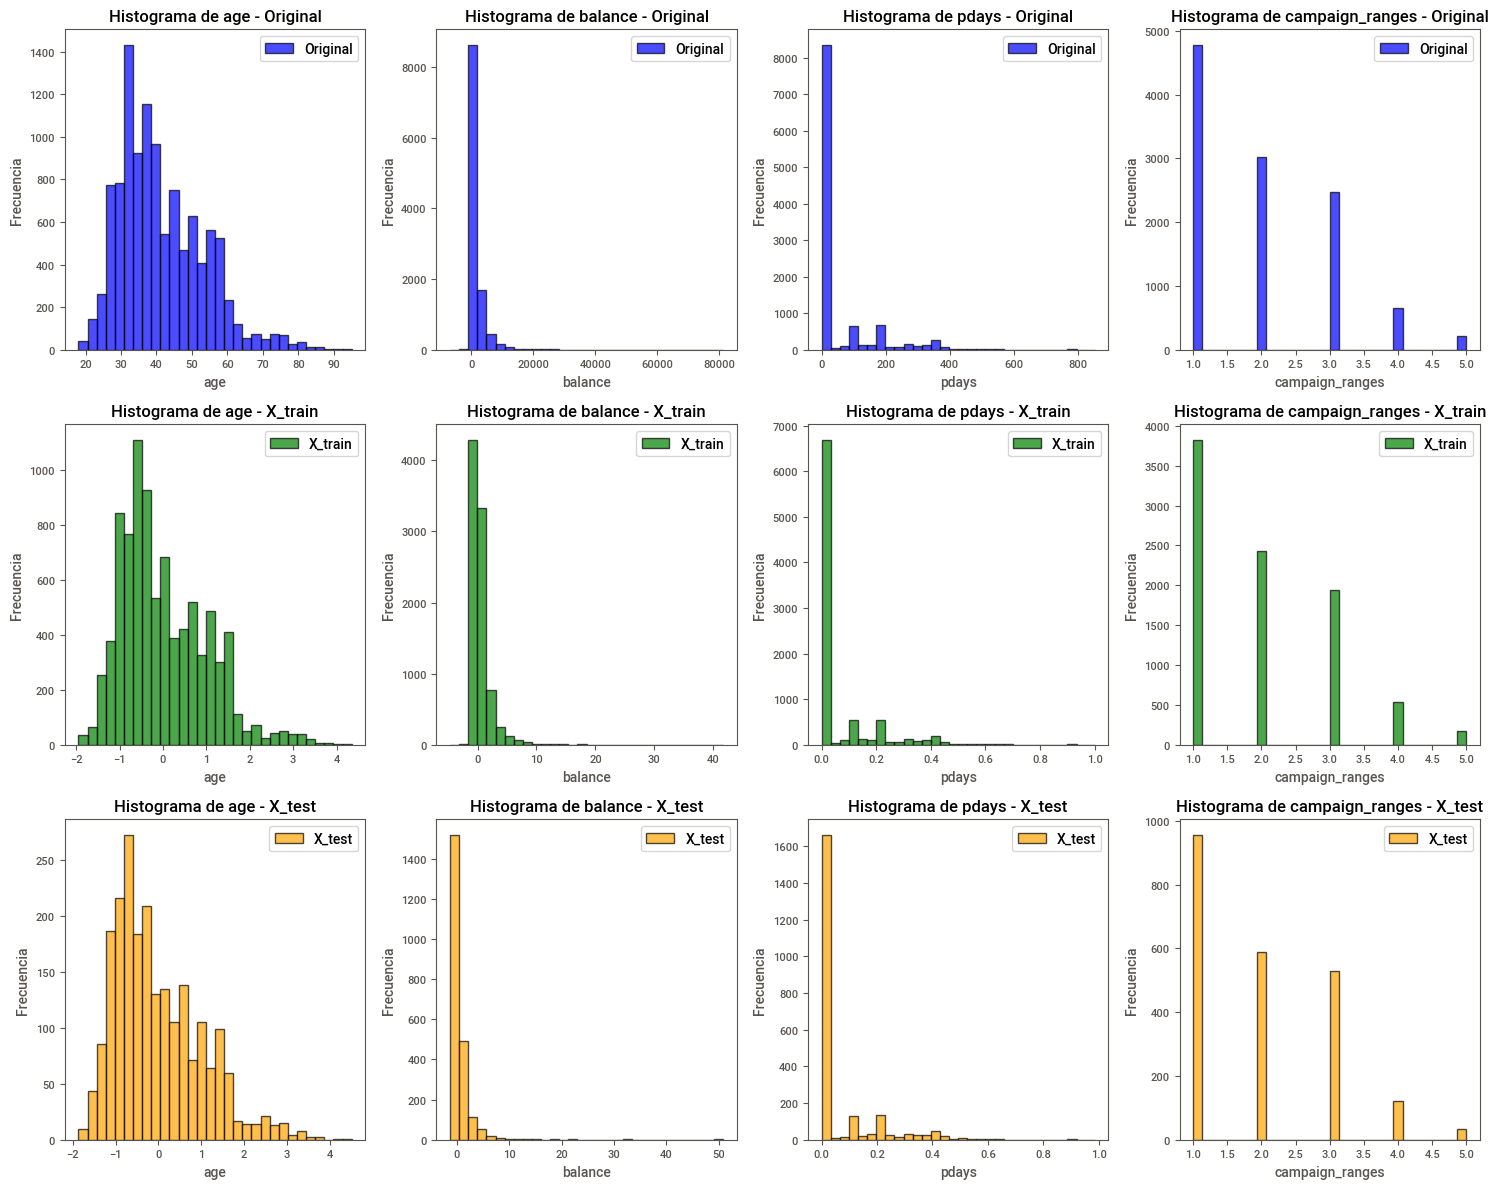

In [125]:
# Lista de variables numéricas a graficar
numeric_columns = ['age', 'balance', 'pdays', 'campaign_ranges']

# Crear la figura con subgráficas
fig, axes = plt.subplots(3, len(numeric_columns), figsize=(15, 12))

# Gráfico de los histogramas
for idx, col in enumerate(numeric_columns):
    # Datos originales
    axes[0, idx].hist(data_raw_reduced[col], bins=30, color='blue', edgecolor='black', alpha=0.7, label="Original")
    axes[0, idx].set_title(f'Histograma de {col} - Original')
    axes[0, idx].set_xlabel(col)
    axes[0, idx].set_ylabel('Frecuencia')
    axes[0, idx].legend()

    # Datos de X_train
    axes[1, idx].hist(X_train[col], bins=30, color='green', edgecolor='black', alpha=0.7, label="X_train")
    axes[1, idx].set_title(f'Histograma de {col} - X_train')
    axes[1, idx].set_xlabel(col)
    axes[1, idx].set_ylabel('Frecuencia')
    axes[1, idx].legend()

    # Datos de X_test
    axes[2, idx].hist(X_test[col], bins=30, color='orange', edgecolor='black', alpha=0.7, label="X_test")
    axes[2, idx].set_title(f'Histograma de {col} - X_test')
    axes[2, idx].set_xlabel(col)
    axes[2, idx].set_ylabel('Frecuencia')
    axes[2, idx].legend()

plt.tight_layout()
plt.show()


Las variables se han escalado, pero se mantienen fieles a los originales tanto en X_train como en X_test

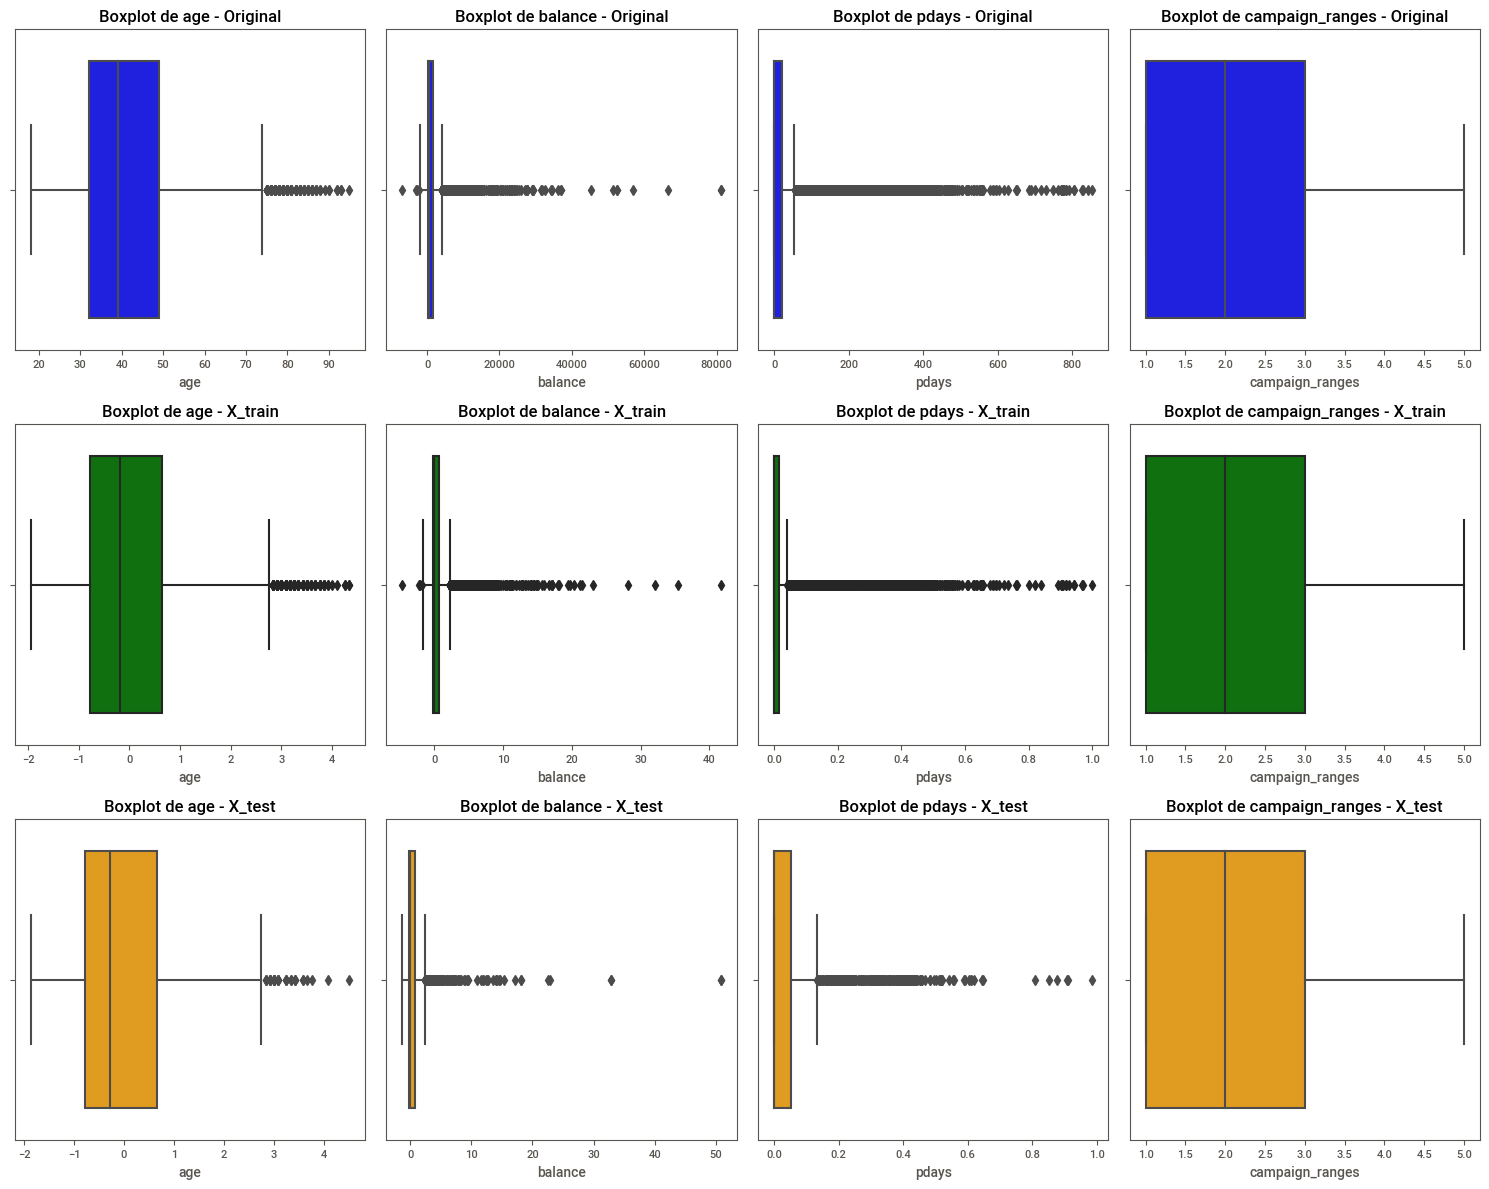

In [85]:
# Crear la figura con subgráficas para boxplots
fig, axes = plt.subplots(3, len(numeric_columns), figsize=(15, 12))

# Gráfico de los boxplots
for idx, col in enumerate(numeric_columns):
    # Datos originales
    sns.boxplot(data=data_raw_reduced, x=col, ax=axes[0, idx], color='blue')
    axes[0, idx].set_title(f'Boxplot de {col} - Original')

    # Datos de X_train
    sns.boxplot(data=X_train, x=col, ax=axes[1, idx], color='green')
    axes[1, idx].set_title(f'Boxplot de {col} - X_train')

    # Datos de X_test
    sns.boxplot(data=X_test, x=col, ax=axes[2, idx], color='orange')
    axes[2, idx].set_title(f'Boxplot de {col} - X_test')

plt.tight_layout()
plt.show()


Se han escalado, pero se mantienen fieles a los originales tanto en X_train como en X_test

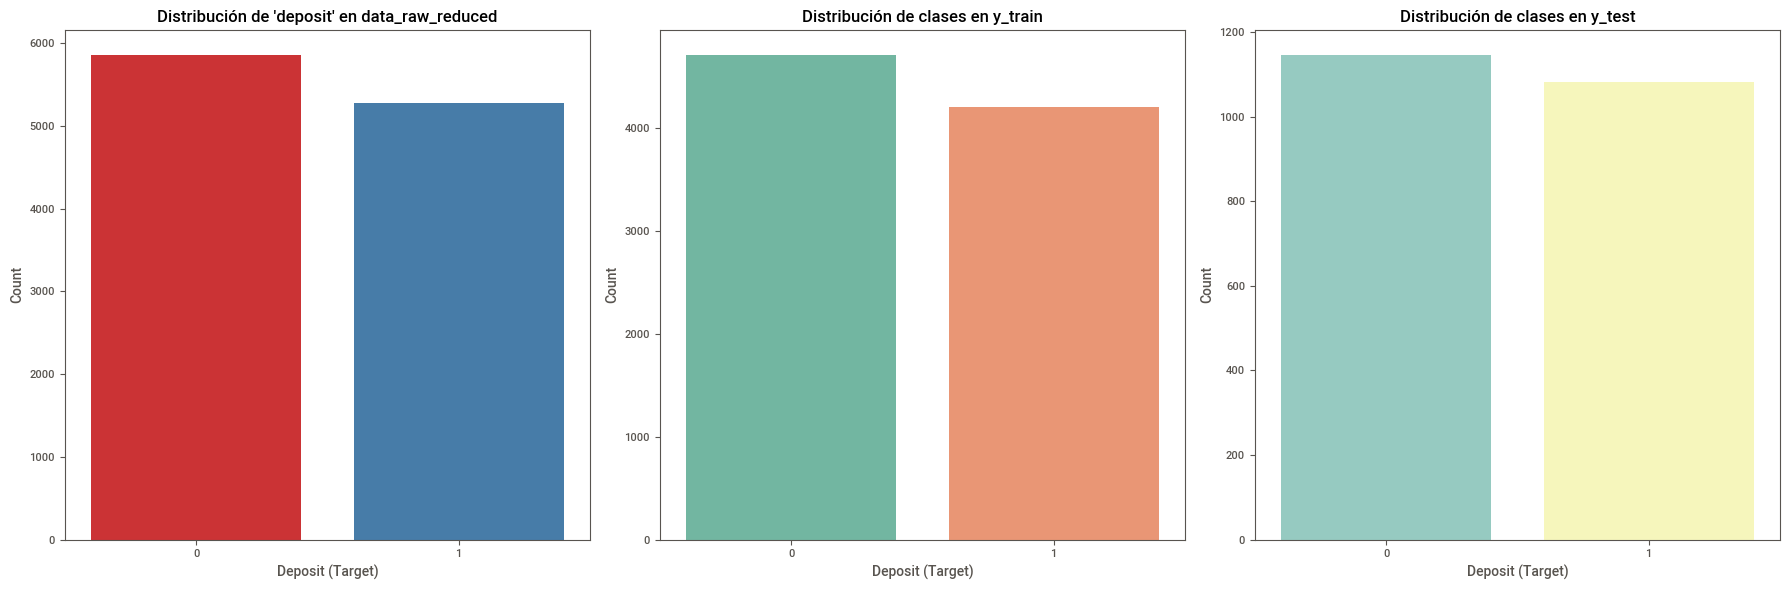

Proporciones en 'deposit' original:
deposit
0    0.526032
1    0.473968
Name: proportion, dtype: float64

Proporciones en 'y_train':
deposit
0    0.528838
1    0.471162
Name: proportion, dtype: float64

Proporciones en 'y_test':
deposit
0    0.514811
1    0.485189
Name: proportion, dtype: float64

Las proporciones de clases en 'deposit' original, 'y_train' y 'y_test' son bastante similares (con una diferencia de hasta 2%).


In [86]:
# Crear un gráfico con tres subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Distribución de clases en 'deposit' (original)
sns.countplot(x=data_raw_reduced['deposit'], palette="Set1", ax=axes[0])
axes[0].set_title("Distribución de 'deposit' en data_raw_reduced")
axes[0].set_xlabel("Deposit (Target)")
axes[0].set_ylabel("Count")

# Distribución de clases en 'y_train'
sns.countplot(x=y_train, palette="Set2", ax=axes[1])
axes[1].set_title("Distribución de clases en y_train")
axes[1].set_xlabel("Deposit (Target)")
axes[1].set_ylabel("Count")

# Distribución de clases en 'y_test'
sns.countplot(x=y_test, palette="Set3", ax=axes[2])
axes[2].set_title("Distribución de clases en y_test")
axes[2].set_xlabel("Deposit (Target)")
axes[2].set_ylabel("Count")

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Comparar las proporciones entre los tres conjuntos de datos
train_proportions = y_train.value_counts(normalize=True)
test_proportions = y_test.value_counts(normalize=True)
original_proportions = data_raw_reduced['deposit'].value_counts(normalize=True)

# Imprimir las proporciones para comparación
print(f"Proporciones en 'deposit' original:\n{original_proportions}")
print(f"\nProporciones en 'y_train':\n{train_proportions}")
print(f"\nProporciones en 'y_test':\n{test_proportions}")

# Verificación si las proporciones son similares
threshold = 0.02  # Permitimos una diferencia de hasta 2% entre las proporciones

# Calculamos la diferencia entre las proporciones
train_diff = (train_proportions - original_proportions).abs().max()
test_diff = (test_proportions - original_proportions).abs().max()

if train_diff <= threshold and test_diff <= threshold:
    print("\nLas proporciones de clases en 'deposit' original, 'y_train' y 'y_test' son bastante similares (con una diferencia de hasta 2%).")
else:
    print("\nLas proporciones de clases entre 'deposit' original, 'y_train' y 'y_test' tienen algunas diferencias, pero dentro de un rango aceptable.")


**Observaciones**:

Las **proporciones de clases en 'deposit' original, 'y_train' y 'y_test' son bastante similares** (con una diferencia de hasta 2%) En el contexto de **clasificación, siempre que las distribuciones no se desvíen** demasiado entre el conjunto de entrenamiento (y_train) y el de prueba (y_test), las diferencias menores suelen ser tolerables, ya que los algoritmos de ML son bastante robustos ante ligeros desajustes. **Un 2% es una diferencia pequeña y razonable** que no suele tener un impacto drástico en el modelo, ya que las distribuciones son en su mayoría equilibradas. En algunos problemas, incluso un 5% puede ser aceptable si las clases son naturalmente desbalanceadas.

## **Resumen del trabajo efectuado**

**Grandes etapas realizadas hasta ahora en el proyecto para optimizar el rendimiento de futuros modelos de aprendizaje automático (Sprints 5 y 6):**

    - Cargar el conjunto de datos .csv
    - EDA e identificación de patrones
    - Transformación de la variable 'deposit' (target binaria)
    - Identificación de distribuciones
    - Aclaraciones y mayor nivel de insights en variables con valores desconocidos o que generaban dudas (añadidos como filtros después del EDA en el Sprint 5)
    - Identificación y tratamiento de outliers en variables numéricas relevantes
    - Tratamiento de variables numéricas y categóricas: Dummificación (one-hot y Encoder), escalado, normalización, entre otros
    - Escalado o estandarización de las variables numéricas ('age', 'balance', 'pdays')
    - Valoración de aplicar métodos de reducción de dimensionalidad como PCA
    - División del dataset: dividir data_encoded en conjuntos de entrenamiento y prueba utilizando train_test_split para asegurar una evaluación robusta de los modelos

**Próximos Pasos (Sprints 7, 8 y 9):**

    - Selección y construcción de modelos
    - Entrenamiento de modelos de clasificación como Regresión Logística y Random Forest en el conjunto de entrenamiento
    - Evaluación del rendimiento de los modelos usando métricas como precisión (precision), exactitud (accuracy) y el área bajo la curva ROC (AUC-ROC)
    - Optimización de hiperparámetros mediante ajuste fino de los parámetros del modelo utilizando técnicas como búsqueda en cuadrícula (GridSearchCV) o búsqueda aleatoria (RandomizedSearchCV)
    - Evaluación del impacto de las transformaciones comparando el rendimiento de los modelos con y sin la eliminación de outliers y la escala de variables numéricas para validar las decisiones de preprocesamiento
    - Visualización y documentación de resultados con gráficos de importancia de características para identificar las variables más influyentes
    - Documentación del proceso completo y las decisiones tomadas para justificar las transformaciones realizadas y su impacto en el modelo
    - Despliegue del modelo: preparación del modelo final para producción, asegurando que el preprocesamiento y las transformaciones sean replicables en nuevos datos

# **SPRINT 7 : Selección del modelo y de las métricas de evaluación**

### ¿Las Clases Están Equilibradas?

El análisis realizado muestra que las proporciones de clases están **ligeramente desequilibradas**:
- **Clases en el dataset original:**  
  47.39% (`deposit=1`) frente al 52.61% (`deposit=0`).
- **Clases en los conjuntos train/test:**  
  Diferencias menores al 2%, pero con ligeros desequilibrios en las clases positivas.

Este desequilibrio es manejable, pero podría justificar el uso de técnicas como la ponderación de clases o métodos como **Random Forest**, que manejan bien estas situaciones.

El **objetivo principal es maximizar la efectividad de la campaña** bancaria **identificando clientes con alta probabilidad de suscribirse** al depósito. Las métricas seleccionadas evalúan el equilibrio entre contactar clientes interesados y minimizar los costos de contactos ineficientes.

### Modelos adecuados

#### Random Forest
- Robusto ante datos heterogéneos con variables categóricas y numéricas.
- Captura relaciones complejas y puede manejar desequilibrios en las clases.

#### Regresión Logística
- Adecuada para interpretaciones claras de la contribución de cada variable.
- Ofrece alta precisión en predicciones binarias.

#### Métricas de Evaluación para Otros Modelos
Si se considera incluir otro modelo como **SVM (Support Vector Machines)**:  
- Se pueden usar las mismas métricas (Precisión, Sensibilidad, F1-Score, AUC-ROC).

Es importante observar la **curva de aprendizaje** para ajustar los hiperparámetros y evitar el sobreajuste.


### Métricas de Evaluación Propuestas
Se han seleccionado las siguientes métricas para evaluar el rendimiento de los modelos:

1. **Exactitud (Accuracy):**  
   - Proporción de predicciones correctas sobre el total de predicciones.
   - Proporciona una visión general del rendimiento del modelo, especialmente si las clases están equilibradas.

2. **Precisión (Precision):**  
   - Proporción de predicciones positivas correctas respecto a todas las predicciones positivas.
   - Prioritaria para minimizar falsos positivos y reducir costos innecesarios.

3. **Sensibilidad (Recall):**  
   - Proporción de casos positivos reales identificados por el modelo.
   - Asegura capturar la mayoría de los clientes interesados, maximizando el alcance de la campaña.

4. **F1-Score:**  
   - Media armónica de precisión y sensibilidad.  
   - Útil en situaciones con clases ligeramente desequilibradas.

5. **Área bajo la curva ROC (AUC-ROC):**  
   - Mide la capacidad del modelo para distinguir entre clases positivas y negativas.
   - Una puntuación alta indica que el modelo prioriza correctamente a los clientes más prometedores.

6. **Confusion Matrix (Matriz de Confusión):**  
   - Permite evaluar el rendimiento del modelo desglosando los aciertos y errores en:
     - **Verdaderos Positivos (VP):** Predicciones positivas correctas.  
     - **Falsos Positivos (FP):** Predicciones positivas incorrectas.  
     - **Verdaderos Negativos (VN):** Predicciones negativas correctas.  
     - **Falsos Negativos (FN):** Predicciones negativas incorrectas.  
   - Ofrece información detallada para ajustar el modelo según el costo relativo de los errores.



#### La métrica más importante para el comercial del banco

En este contexto, el comercial del banco debe **decidir a quién llamar, priorizando clientes con mayor probabilidad de suscribirse al depósito**. Aquí, el objetivo es maximizar rendimiento comercial. Si el banco tiene recursos limitados, la precisión debería priorizarse. Si no hay limitación de recursos, recall sería más importante. En comparación con un caso de cáncer, donde, por ejemplo, recall (sensibilidad) es crucial porque un falso negativo puede costar vidas. Pero para este caso, precisión debería ser la métrica principal para evitar gastos innecesarios en llamadas infructuosas, mientras que recall puede ser secundaria si el banco desea maximizar su alcance.

En este caso:

**Precisión (Precision):**

Es la métrica clave si el banco desea evitar falsos positivos (clientes contactados que no están interesados).
Contactar clientes que no suscriben implica un costo de recursos (tiempo y dinero).
Ejemplo práctico: Un modelo con alta precisión asegura que, de las llamadas realizadas, la mayoría sean a clientes con alta probabilidad de suscribirse.

**Sensibilidad (Recall):**

Es importante si el objetivo del banco es captar la mayor cantidad de clientes interesados posibles, incluso si se contactan algunos no interesados.
Ejemplo práctico: Si el objetivo es maximizar el alcance, incluso a costa de algunas llamadas innecesarias, la sensibilidad es crucial.

**F1-Score:**

Es un buen balance si se busca un compromiso entre precisión y sensibilidad.
Ejemplo práctico: Útil si el banco tiene que equilibrar entre minimizar costos y maximizar captación de clientes.

**AUC-ROC:**

Es valiosa para entender si el modelo está ordenando correctamente a los clientes según su probabilidad de suscribirse.
Ejemplo práctico: Un buen AUC indica que los clientes más propensos están siendo priorizados, aunque no sea perfecta la clasificación final.

## **Entrenamiento inicial de modelos sin ajuste de hiperparámetros**

A continuación, se define un enfoque simple para entrenar los modelos Random Forest y Regresión Logística, usando los parámetros por defecto con la excepción de random_state. También se incluirá una evaluación básica de las métricas y la matriz de confusión.

In [124]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import pandas as pd

In [ ]:
# Definir los modelos con random_state
rf_model = RandomForestClassifier(random_state=42)
lr_model = LogisticRegression(random_state=42, max_iter=1000)

¿Por qué ***max_iter=1000***no lo aplicamos a Random Forest?

En Regresión Logística, el modelo ajusta los coeficientes usando un algoritmo iterativo (como el método de gradiente descendente). Por defecto, el número máximo de iteraciones es 100 (max_iter=100), lo cual puede ser insuficiente para que el modelo converja en algunos casos

El modelo Random Forest no es iterativo; no realiza optimización de gradiente ni ajustes iterativos. En su lugar, genera múltiples árboles de decisión en paralelo, por lo que no tiene un parámetro equivalente a max_iter.

In [390]:
# Entrenar modelos
rf_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
rf_preds = rf_model.predict(X_test)
lr_preds = lr_model.predict(X_test)

# Evaluar métricas para cada modelo
def evaluate_metrics(y_true, y_pred, model_name):
    metrics = {
        "Modelo": model_name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1-Score": f1_score(y_true, y_pred),
        "AUC-ROC": roc_auc_score(y_true, y_pred),
    }
    cm = confusion_matrix(y_true, y_pred)
    return metrics, cm

# Evaluar métricas y obtener matrices de confusión
rf_metrics, rf_cm = evaluate_metrics(y_test, rf_preds, "Random Forest")
lr_metrics, lr_cm = evaluate_metrics(y_test, lr_preds, "Regresión Logística")

# Mostrar las métricas en formato tabla
metrics_df = pd.DataFrame([rf_metrics, lr_metrics])
print("Métricas de los modelos:")
print(metrics_df)

# Mostrar las matrices de confusión
print("\nMatriz de confusión para Random Forest:")
print(rf_cm)
print("\nMatriz de confusión para Regresión Logística:")
print(lr_cm)

Métricas de los modelos:
                Modelo  Accuracy  Precision    Recall  F1-Score   AUC-ROC
0        Random Forest  0.672352   0.679632  0.614246  0.645287  0.670680
1  Regresión Logística  0.681777   0.690184  0.624422  0.655658  0.680127

Matriz de confusión para Random Forest:
[[834 313]
 [417 664]]

Matriz de confusión para Regresión Logística:
[[844 303]
 [406 675]]


Matriz de confusión:

Resumen de porcentajes por clase:
Por ejemplo, el resultado del código mostrará algo así:

Clase	Precisión (%) Random Forest	Precisión (%) Logistic Regression
No se suscriben	72.70%	73.58%
Se suscriben	61.42%	62.44%

Conclusión:
Ambos modelos tienen un desempeño ligeramente mejor prediciendo a los clientes que NO se suscriben al depósito (clase No se suscriben) en comparación con los que sí lo hacen (clase Se suscriben).
La Regresión Logística tiene una leve ventaja en la predicción de ambas clases.Resumen de porcentajes por clase:

Para Random Forest:

    Verdaderos Negativos (834): Clientes correctamente predichos como No Depósito.
    Falsos Positivos (313): Clientes predichos como Depósito, pero realmente no lo hicieron.
    Falsos Negativos (417): Clientes que tenían Depósito, pero el modelo falló en detectarlos.
    Verdaderos Positivos (664): Clientes correctamente predichos como Depósito.
    
Para Regresión Logística:

    Verdaderos Negativos (844): Mejor en +10 predicciones correctas de No Depósito que Random Forest.
    Falsos Positivos (303): Comete -10 menos errores prediciendo falsos Depósitos.
    Falsos Negativos (406): Captura +11 más Depósitos reales (mejor Recall que RF).
    Verdaderos Positivos (675): Detecta +11 más Depósitos correctamente.

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Obtener la matriz de confusión para ambos modelos
cm_rf = confusion_matrix(y_test, rf_model.predict(X_test))
cm_lr = confusion_matrix(y_test, lr_model.predict(X_test))

# Calcular los porcentajes de acierto en cada clase
cm_rf_percent = cm_rf / cm_rf.sum(axis=1)[:, np.newaxis] * 100
cm_lr_percent = cm_lr / cm_lr.sum(axis=1)[:, np.newaxis] * 100

# Crear los gráficos
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Matriz de confusión para Random Forest
sns.heatmap(cm_rf_percent, annot=True, fmt=".2f", cmap="Blues", xticklabels=["Predicted No", "Predicted Yes"], yticklabels=["True No", "True Yes"], ax=axes[0])
axes[0].set_title("Matriz de Confusión: Random Forest")

# Matriz de confusión para Regresión Logística
sns.heatmap(cm_lr_percent, annot=True, fmt=".2f", cmap="Blues", xticklabels=["Predicted No", "Predicted Yes"], yticklabels=["True No", "True Yes"], ax=axes[1])
axes[1].set_title("Matriz de Confusión: Regresión Logística")

# Mostrar el gráfico
plt.tight_layout()
plt.show()


NameError: name 'y_test' is not defined

In [1]:
import pandas as pd
from sklearn.metrics import confusion_matrix

# Obtener las matrices de confusión
cm_rf = confusion_matrix(y_test, rf_model.predict(X_test))
cm_lr = confusion_matrix(y_test, lr_model.predict(X_test))

# Mostrar las matrices de confusión clásicas
print("Matriz de confusión para Random Forest:")
print(cm_rf)
print("\nMatriz de confusión para Regresión Logística:")
print(cm_lr)

# Calcular los porcentajes de cada celda
cm_rf_percent = cm_rf / cm_rf.sum() * 100
cm_lr_percent = cm_lr / cm_lr.sum() * 100

# Calcular la precisión por clase
accuracy_rf_per_class = cm_rf.diagonal() / cm_rf.sum(axis=1) * 100
accuracy_lr_per_class = cm_lr.diagonal() / cm_lr.sum(axis=1) * 100

# Crear tablas con los porcentajes
summary_rf = pd.DataFrame({
    "Clase": ["No se suscriben", "Se suscriben"],
    "Precisión (%) Random Forest": accuracy_rf_per_class,
    "Precisión (%) Logistic Regression": accuracy_lr_per_class
})

# Mostrar las tablas
print("\nResumen de porcentajes por clase:")
print(summary_rf)


C:\Users\Buba\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Buba\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


NameError: name 'y_test' is not defined

**Interpretación de los resultados de las métricas**:

Accuracy (Exactitud):

    Random Forest (67.2%): De cada 100 predicciones, 67 son correctas. Este modelo tiene una proporción razonable de aciertos, pero casi 1 de cada 3 predicciones es incorrecta.
    Regresión Logística (68.2%): Ligeramente mejor, con 68 aciertos por cada 100 predicciones. Es un pequeño incremento, pero significativo, ya que la exactitud mide el rendimiento general.
Interpretación:
Ambos modelos son medianamente precisos, pero su margen de mejora es significativo. No obstante, la exactitud sola no es suficiente para evaluar el modelo, especialmente si las clases están desequilibradas.

Precision (Precisión):

    Random Forest (67.9%): De todas las predicciones positivas realizadas (deposit=1), casi el 68% son correctas. El resto son falsos positivos (clientes que no depositaron, pero el modelo predijo que sí).
    Regresión Logística (69.0%): Ligeramente superior, con menos falsos positivos. Esto significa que este modelo es más confiable al predecir deposit=1.

Interpretación:
La precisión es clave en este caso, ya que contactar a clientes que no están interesados genera costos innecesarios. Ambos modelos tienen un rendimiento decente, pero la regresión logística minimiza mejor los falsos positivos.

Recall (Sensibilidad):

    Random Forest (61.4%): Solo detecta correctamente el 61.4% de los clientes que realmente realizaron el depósito. Esto implica que se pierden muchos casos positivos (falsos negativos).
    Regresión Logística (62.4%): Captura un porcentaje ligeramente mayor de clientes interesados en comparación con Random Forest, lo que reduce los falsos negativos.
Interpretación:
El Recall es crucial para maximizar el alcance de la campaña bancaria. Ambos modelos tienen un desempeño aceptable, pero no óptimo, en esta métrica. La regresión logística tiene una ligera ventaja.

F1-Score (Equilibrio entre Precision y Recall):
Random Forest (64.5%): Combina precisión y sensibilidad en un valor equilibrado. Este modelo tiene un buen balance, pero está por debajo del rendimiento de la regresión logística.
Regresión Logística (65.6%): Mejor balance entre evitar falsos positivos y capturar la mayor cantidad de casos positivos. Tiene una ventaja frente a Random Forest.
Interpretación:
El F1-Score es importante en contextos donde las clases están desequilibradas o ambos errores (falsos positivos y falsos negativos) tienen un costo significativo. En este caso, ambos modelos son comparables, pero la regresión logística tiene un rendimiento más robusto.

AUC-ROC (Capacidad Discriminativa):
Random Forest (67.1%): Indica que el modelo es razonablemente bueno para distinguir entre clases positivas (deposit=1) y negativas (deposit=0). Sin embargo, no está cerca del ideal (100%).
Regresión Logística (68.0%): Tiene una mejor capacidad discriminativa, lo que significa que prioriza correctamente a los clientes más propensos a suscribirse.
Interpretación:
Una AUC-ROC alta asegura que el modelo puede ordenar a los clientes de manera efectiva según su probabilidad de suscribirse al depósito. Ambos modelos son mejores que una predicción aleatoria (50%), pero la regresión logística se acerca más al rendimiento deseado.

Conclusión final para ambos modelos:
Random Forest es robusto y adecuado para datos heterogéneos. Su desempeño es competitivo, pero necesita ajustes en los hiperparámetros para mejorar su capacidad discriminativa y sensibilidad.
Regresión Logística ofrece una ligera ventaja en precisión y balance general. Es preferible si la interpretabilidad y la facilidad de implementación son importantes.



**Visualizar los parámetros utilizados en los modelos**

Este enfoque permite establecer una línea base para el rendimiento de los modelos y sirve como referencia para futuras optimizaciones.

In [392]:
# Parámetros de Random Forest
print("\nParámetros utilizados en Random Forest:")
print(rf_model.get_params())

# Parámetros de Regresión Logística
print("\nParámetros utilizados en Regresión Logística:")
print(lr_model.get_params())



Parámetros utilizados en Random Forest:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}

Parámetros utilizados en Regresión Logística:
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


#### **Conclusión parcial :**

Random Forest vs. Regresión Logística (qué detectan mejor):
Random Forest detecta mejor los clientes que no se suscriben (deposit = 0).

Tiene una precisión ligeramente superior (67.9% vs. 69.0%) en esta clase.
Sin embargo, tiene menor sensibilidad (recall) en detectar clientes que sí se suscriben (deposit = 1) en comparación con Regresión Logística (61.4% vs. 62.4%).
Regresión Logística es más efectiva en identificar clientes que sí se suscriben (deposit = 1), ya que tiene una sensibilidad (recall) ligeramente superior.

Esto significa que captura más casos positivos correctamente en proporción a los positivos reales.
¿Cuál es mejor?
La respuesta depende de los objetivos del negocio:

Si el foco es captar más clientes interesados (deposit = 1), Regresión Logística sería mejor en su configuración actual, ya que tiene un recall más alto para esta clase.
Si es crucial minimizar costos asociados a contactos innecesarios con clientes no interesados (deposit = 0), Random Forest ofrece una precisión ligeramente superior en esta clase y sería una mejor elección.
Ambos modelos son comparables, pero Random Forest podría ajustarse mejor a la realidad del problema con optimización adicional (hiperparámetros, técnicas de balanceo, etc.), dada su flexibilidad y capacidad de capturar relaciones no lineales.

Parámetros utilizados:
Los parámetros actuales de los modelos reflejan configuraciones predeterminadas. Algunas observaciones:

Random Forest:

Número de estimadores (n_estimators=100) podría incrementarse para mejorar la estabilidad y la precisión del modelo.
Se podría ajustar max_depth o aplicar class_weight='balanced' para mejorar la sensibilidad hacia la clase minoritaria (deposit = 1).
Regresión Logística:

max_iter=1000 asegura convergencia, pero no es estrictamente necesario si el modelo ya converge con menos iteraciones.
Considerar cambiar penalty='l1' (o elasticnet con l1_ratio) para explorar si algunas características pueden ser eliminadas o seleccionadas automáticamente.

Con optimización, Random Forest tiene mayor potencial para ser el mejor modelo en este caso debido a su flexibilidad y robustez frente a datos heterogéneos.

#### Cross Validation:

La media de accuracy muestra el rendimiento general del modelo en diferentes particiones de los datos.

La desviación estándar indica qué tan consistentes son las puntuaciones entre los folds. Una desviación estándar baja es deseable porque indica que el modelo es más robusto y menos sensible a la partición de los datos.

Beneficios de usar cross-validation:

Evaluación robusta: Reduce el riesgo de sobreajustar un modelo a una sola partición de datos.
Comparación de modelos: Puedes comparar diferentes algoritmos basándote en su rendimiento promedio y estabilidad.
Selección de hiperparámetros: Es común usar cross-validation junto con técnicas como GridSearchCV para optimizar parámetros.

¿Importa el momento?
- Antes de dividir en train-test: Evalúas el modelo en todo el dataset. Es útil para explorar la capacidad general del modelo, pero no tendrás un conjunto independiente de prueba.
- Después de dividir en train-test: Usas únicamente X_train e y_train, dejando X_test e y_test para la evaluación final del modelo. Esto es lo más recomendado para garantizar un análisis honesto del rendimiento.

Se va a hacer después de train-test y vamos a ver los resultados por fold

In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate

# Crear los modelos
rf_model_cv = RandomForestClassifier(random_state=42)
lr_model_cv = LogisticRegression(random_state=42, max_iter=1000)

# Validación cruzada con 5 folds (mostrar resultados por fold)
rf_cv_scores = cross_val_score(rf_model_cv, X_train, y_train, cv=5, scoring='accuracy')
lr_cv_scores = cross_val_score(lr_model_cv, X_train, y_train, cv=5, scoring='accuracy')

# Mostrar resultados por fold
print("Random Forest - Resultados por fold (accuracy):")
for i, score in enumerate(rf_cv_scores, 1):
    print(f"Fold {i}: {score:.4f}")

print(f"\nMedia: {rf_cv_scores.mean():.4f}, Desviación estándar: {rf_cv_scores.std():.4f}")

print("\nRegresión Logística - Resultados por fold (accuracy):")
for i, score in enumerate(lr_cv_scores, 1):
    print(f"Fold {i}: {score:.4f}")

print(f"\nMedia: {lr_cv_scores.mean():.4f}, Desviación estándar: {lr_cv_scores.std():.4f}")


Detalles adicionales con cross_validate

In [ ]:
# Validación cruzada con más detalles
rf_cv_results = cross_validate(rf_model_cv, X_train, y_train, cv=5, scoring=['accuracy', 'precision', 'recall'], return_train_score=True)
lr_cv_results = cross_validate(lr_model_cv, X_train, y_train, cv=5, scoring=['accuracy', 'precision', 'recall'], return_train_score=True)

# Mostrar resultados de Random Forest
print("Random Forest - Resultados detallados:")
for metric, scores in rf_cv_results.items():
    print(f"{metric}: {scores}")

# Mostrar resultados de Regresión Logística
print("\nRegresión Logística - Resultados detallados:")
for metric, scores in lr_cv_results.items():
    print(f"{metric}: {scores}")


Interpretación:

Por fold: Puedes observar cómo se comporta el modelo en cada partición de datos.
Media y desviación estándar: Resumen el rendimiento general y la consistencia del modelo.
Detalles adicionales: Si usas métricas como precisión o recall, puedes identificar si el modelo está balanceado entre clases o si necesita ajustes adicionales.